In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
import my_mod as util
from models import CnnForecaster
from tools import dotdict

In [2]:
import torch
torch.cuda.is_available()

True

# Small Scale Test for GPU support

In [3]:
torch.cuda.set_device(2) 

In [29]:
args = dotdict()
args.epochs=40
args.lr=0.001
args.batch_size = 4
args.d_model = 2048

In [30]:
truth = atd2022.io.read_csv()

In [31]:
test = truth[["AA", "AC"]]

In [32]:
lispCNN = CnnForecaster(args)

In [33]:
lispCNN.fit(data=test)

0
epochs 1/40
train_loss 65.90036010742188
epochs 2/40
train_loss 62.43232345581055
epochs 3/40
train_loss 55.9425048828125
epochs 4/40
train_loss 52.730995178222656
epochs 5/40
train_loss 53.12398910522461
epochs 6/40
train_loss 50.668182373046875
epochs 7/40
train_loss 49.827857971191406
epochs 8/40
train_loss 47.613525390625
epochs 9/40
train_loss 48.447410583496094
epochs 10/40
train_loss 46.728668212890625
epochs 11/40
train_loss 48.4893684387207
epochs 12/40
train_loss 45.65201950073242
epochs 13/40
train_loss 45.070579528808594
epochs 14/40
train_loss 43.59865188598633
epochs 15/40
train_loss 45.353431701660156
epochs 16/40
train_loss 43.429569244384766
epochs 17/40
train_loss 41.22129440307617
epochs 18/40
train_loss 45.040626525878906
epochs 19/40
train_loss 40.31342315673828
epochs 20/40
train_loss 41.924095153808594
epochs 21/40
train_loss 39.536293029785156
epochs 22/40
train_loss 41.854888916015625
epochs 23/40
train_loss 39.0735969543457
epochs 24/40
train_loss 41.1960754

In [34]:
res=lispCNN.predict(test.tail(4).index)

In [35]:
res

AA                                                     \
                        1    2    3     4    5    6    7    8    9    10   11   
2018-01-15/2018-01-21  7.0  6.0  7.0  31.0  6.0 -0.0  1.0  1.0  1.0  1.0  0.0   
2018-01-22/2018-01-28  7.0  2.0  6.0  16.0  6.0 -0.0  1.0  1.0  0.0  0.0  2.0   
2018-01-29/2018-02-04  6.0  4.0  7.0  25.0  4.0  0.0  1.0  1.0  1.0  0.0  2.0   
2018-02-05/2018-02-11  5.0  4.0  6.0  26.0  3.0  1.0  1.0  1.0  1.0  0.0  2.0   

                                                                      AC  \
                        12   13   14   15   16   17   18   19   20    1    
2018-01-15/2018-01-21  1.0  0.0  0.0  0.0  0.0  2.0  1.0  2.0  0.0  25.0   
2018-01-22/2018-01-28  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0  13.0   
2018-01-29/2018-02-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  11.0   
2018-02-05/2018-02-11  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   8.0   

                                                                             \
                         2     3     4     5    6    7    8    9    10   11   
2018-01-15/2018-01-21  10.0  18.0  72.0  11.0  3.0  5.0  7.0  3.0  3.0  7.0   
2018-01-22/2018-01-28   8.0  14.0  46.0   8.0  1.0  1.0  3.0  1.0  2.0  4.0   
2018-01-29/2018-02-04   7.0  10.0  53.0   8.0 -0.0  1.0  2.0  1.0  1.0  3.0   
2018-02-05/2018-02-11   4.0   7.0  27.0   4.0 -0.0  1.0  1.0  0.0  0.0  2.0   

                                                                    
                        12   13   14   15   16   17   18   19   20  
2018-01-15/2018-01-21  7.0  1.0  0.0  0.0  0.0  4.0  1.0  2.0  0.0  
2018-01-22/2018-01-28  1.0  0.0  0.0  0.0  0.0  1.0  2.0  2.0  0.0  
2018-01-29/2018-02-04  1.0  0.0  0.0  0.0  0.0 -0.0  2.0  2.0  0.0  
2018-02-05/2018-02-11  0.0  0.0  0.0  0.0  0.0 -0.0  2.0  1.0  0.0

# Full Scale Test

In [51]:
args = dotdict()
args.epochs=60
args.lr=0.0015
args.batch_size = 38
args.d_model = 1024

In [52]:
lispCNN = CnnForecaster(args)

In [53]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispCNN,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<models.CnnForecaster object at 0x7f321936c190>:   0%|          | 0/5 [00:00<?, ?it/s]

0
epochs 1/60
train_loss 84.37400817871094
epochs 2/60
train_loss 75.71473693847656
epochs 3/60
train_loss 62.74652099609375
epochs 4/60
train_loss 57.980613708496094
epochs 5/60
train_loss 54.411659240722656
epochs 6/60
train_loss 53.68633270263672
epochs 7/60
train_loss 52.33220672607422
epochs 8/60
train_loss 49.440792083740234
epochs 9/60
train_loss 47.47611999511719
epochs 10/60
train_loss 46.13725280761719
epochs 11/60
train_loss 44.65839385986328
epochs 12/60
train_loss 43.365455627441406
epochs 13/60
train_loss 42.283634185791016
epochs 14/60
train_loss 41.21253967285156
epochs 15/60
train_loss 40.3940544128418
epochs 16/60
train_loss 39.668174743652344
epochs 17/60
train_loss 38.93734359741211
epochs 18/60
train_loss 38.28773498535156
epochs 19/60
train_loss 37.65147399902344
epochs 20/60
train_loss 37.1065673828125
epochs 21/60
train_loss 36.57371139526367
epochs 22/60
train_loss 36.01749038696289
epochs 23/60
train_loss 35.45792770385742
epochs 24/60
train_loss 34.9360542297

train_loss 69185.140625
epochs 22/60
train_loss 68945.5234375
epochs 23/60
train_loss 68732.859375
epochs 24/60
train_loss 68511.6484375
epochs 25/60
train_loss 68299.75
epochs 26/60
train_loss 68118.125
epochs 27/60
train_loss 67910.28125
epochs 28/60
train_loss 67680.015625
epochs 29/60
train_loss 67469.5
epochs 30/60
train_loss 67274.453125
epochs 31/60
train_loss 67076.109375
epochs 32/60
train_loss 66876.203125
epochs 33/60
train_loss 66680.25
epochs 34/60
train_loss 66485.515625
epochs 35/60
train_loss 66289.078125
epochs 36/60
train_loss 66094.4375
epochs 37/60
train_loss 65897.5390625
epochs 38/60
train_loss 65698.1171875
epochs 39/60
train_loss 65502.96875
epochs 40/60
train_loss 65311.984375
epochs 41/60
train_loss 65121.94921875
epochs 42/60
train_loss 64929.453125
epochs 43/60
train_loss 64734.9140625
epochs 44/60
train_loss 64540.34375
epochs 45/60
train_loss 64348.23046875
epochs 46/60
train_loss 64153.19921875
epochs 47/60
train_loss 63958.57421875
epochs 48/60
train_los

train_loss 650.8355712890625
epochs 49/60
train_loss 645.666748046875
epochs 50/60
train_loss 640.2808227539062
epochs 51/60
train_loss 635.677490234375
epochs 52/60
train_loss 630.3171997070312
epochs 53/60
train_loss 625.424560546875
epochs 54/60
train_loss 619.8350830078125
epochs 55/60
train_loss 615.31689453125
epochs 56/60
train_loss 609.5673828125
epochs 57/60
train_loss 605.244384765625
epochs 58/60
train_loss 599.6357421875
epochs 59/60
train_loss 594.791748046875
epochs 60/60
train_loss 590.2158203125
7
epochs 1/60
train_loss 66933.1171875
epochs 2/60
train_loss 24443.5
epochs 3/60
train_loss 13643.978515625
epochs 4/60
train_loss 17204.12890625
epochs 5/60
train_loss 14776.357421875
epochs 6/60
train_loss 11967.3271484375
epochs 7/60
train_loss 11861.146484375
epochs 8/60
train_loss 11936.076171875
epochs 9/60
train_loss 11334.978515625
epochs 10/60
train_loss 10769.380859375
epochs 11/60
train_loss 10643.4609375
epochs 12/60
train_loss 10553.939453125
epochs 13/60
train_los

train_loss 13.949564933776855
epochs 10/60
train_loss 13.667747497558594
epochs 11/60
train_loss 13.431266784667969
epochs 12/60
train_loss 13.21225357055664
epochs 13/60
train_loss 13.010172843933105
epochs 14/60
train_loss 12.817813873291016
epochs 15/60
train_loss 12.645304679870605
epochs 16/60
train_loss 12.464397430419922
epochs 17/60
train_loss 12.264777183532715
epochs 18/60
train_loss 12.098672866821289
epochs 19/60
train_loss 11.930463790893555
epochs 20/60
train_loss 11.742705345153809
epochs 21/60
train_loss 11.565810203552246
epochs 22/60
train_loss 11.380343437194824
epochs 23/60
train_loss 11.188848495483398
epochs 24/60
train_loss 11.00462532043457
epochs 25/60
train_loss 10.809081077575684
epochs 26/60
train_loss 10.608604431152344
epochs 27/60
train_loss 10.411818504333496
epochs 28/60
train_loss 10.210195541381836
epochs 29/60
train_loss 10.00535774230957
epochs 30/60
train_loss 9.80541706085205
epochs 31/60
train_loss 9.593262672424316
epochs 32/60
train_loss 9.3986

train_loss 12636.220703125
epochs 39/60
train_loss 12425.712890625
epochs 40/60
train_loss 12297.2529296875
epochs 41/60
train_loss 12371.40625
epochs 42/60
train_loss 13266.03125
epochs 43/60
train_loss 15579.5
epochs 44/60
train_loss 15382.26171875
epochs 45/60
train_loss 12809.16796875
epochs 46/60
train_loss 11931.4560546875
epochs 47/60
train_loss 12790.9873046875
epochs 48/60
train_loss 11895.1123046875
epochs 49/60
train_loss 11336.1904296875
epochs 50/60
train_loss 11662.828125
epochs 51/60
train_loss 11311.798828125
epochs 52/60
train_loss 10901.349609375
epochs 53/60
train_loss 11016.603515625
epochs 54/60
train_loss 10943.96875
epochs 55/60
train_loss 10624.14453125
epochs 56/60
train_loss 10570.689453125
epochs 57/60
train_loss 10567.05859375
epochs 58/60
train_loss 10405.375
epochs 59/60
train_loss 10306.904296875
epochs 60/60
train_loss 10208.849609375
14
epochs 1/60
train_loss 23.841629028320312
epochs 2/60
train_loss 18.488359451293945
epochs 3/60
train_loss 13.67706871

train_loss 1857.1756591796875
epochs 58/60
train_loss 1844.7255859375
epochs 59/60
train_loss 1832.80419921875
epochs 60/60
train_loss 1820.4853515625
17
epochs 1/60
train_loss 1396.33056640625
epochs 2/60
train_loss 621.6693115234375
epochs 3/60
train_loss 367.4910583496094
epochs 4/60
train_loss 298.60528564453125
epochs 5/60
train_loss 326.6197814941406
epochs 6/60
train_loss 325.8819274902344
epochs 7/60
train_loss 285.35760498046875
epochs 8/60
train_loss 255.7481689453125
epochs 9/60
train_loss 255.8984832763672
epochs 10/60
train_loss 261.7198181152344
epochs 11/60
train_loss 258.6109924316406
epochs 12/60
train_loss 247.5755615234375
epochs 13/60
train_loss 240.46920776367188
epochs 14/60
train_loss 239.66238403320312
epochs 15/60
train_loss 240.16952514648438
epochs 16/60
train_loss 237.40869140625
epochs 17/60
train_loss 233.73728942871094
epochs 18/60
train_loss 232.08163452148438
epochs 19/60
train_loss 231.3548583984375
epochs 20/60
train_loss 229.81365966796875
epochs 21/

train_loss 26089.859375
epochs 16/60
train_loss 25943.984375
epochs 17/60
train_loss 25779.18359375
epochs 18/60
train_loss 25653.578125
epochs 19/60
train_loss 25527.51171875
epochs 20/60
train_loss 25400.77734375
epochs 21/60
train_loss 25281.701171875
epochs 22/60
train_loss 25163.6015625
epochs 23/60
train_loss 25039.33984375
epochs 24/60
train_loss 24911.32421875
epochs 25/60
train_loss 24785.419921875
epochs 26/60
train_loss 24641.078125
epochs 27/60
train_loss 24481.109375
epochs 28/60
train_loss 24340.55859375
epochs 29/60
train_loss 24178.546875
epochs 30/60
train_loss 24010.560546875
epochs 31/60
train_loss 23828.05859375
epochs 32/60
train_loss 23642.5625
epochs 33/60
train_loss 23465.755859375
epochs 34/60
train_loss 23270.099609375
epochs 35/60
train_loss 23079.26171875
epochs 36/60
train_loss 22830.32421875
epochs 37/60
train_loss 22604.76171875
epochs 38/60
train_loss 22395.302734375
epochs 39/60
train_loss 22156.5
epochs 40/60
train_loss 21935.490234375
epochs 41/60
tra

train_loss 276.69403076171875
epochs 42/60
train_loss 275.7503662109375
epochs 43/60
train_loss 274.7799377441406
epochs 44/60
train_loss 273.8809814453125
epochs 45/60
train_loss 272.9344482421875
epochs 46/60
train_loss 271.9700622558594
epochs 47/60
train_loss 270.9998779296875
epochs 48/60
train_loss 270.0474548339844
epochs 49/60
train_loss 269.10809326171875
epochs 50/60
train_loss 268.1571960449219
epochs 51/60
train_loss 267.21307373046875
epochs 52/60
train_loss 266.2686767578125
epochs 53/60
train_loss 265.322021484375
epochs 54/60
train_loss 264.3367614746094
epochs 55/60
train_loss 263.4039306640625
epochs 56/60
train_loss 262.3990478515625
epochs 57/60
train_loss 261.42919921875
epochs 58/60
train_loss 260.4073791503906
epochs 59/60
train_loss 259.4825439453125
epochs 60/60
train_loss 258.3909912109375
24
epochs 1/60
train_loss 1841.2264404296875
epochs 2/60
train_loss 1508.2235107421875
epochs 3/60
train_loss 1379.5999755859375
epochs 4/60
train_loss 1254.5428466796875
ep

train_loss 1012.9826049804688
epochs 6/60
train_loss 948.6435546875
epochs 7/60
train_loss 928.5424194335938
epochs 8/60
train_loss 900.3375244140625
epochs 9/60
train_loss 867.8052978515625
epochs 10/60
train_loss 838.9071655273438
epochs 11/60
train_loss 818.6104736328125
epochs 12/60
train_loss 796.3866577148438
epochs 13/60
train_loss 774.2587890625
epochs 14/60
train_loss 752.119873046875
epochs 15/60
train_loss 731.6085815429688
epochs 16/60
train_loss 711.1380615234375
epochs 17/60
train_loss 689.6302490234375
epochs 18/60
train_loss 668.1593017578125
epochs 19/60
train_loss 648.698974609375
epochs 20/60
train_loss 628.8330078125
epochs 21/60
train_loss 608.192626953125
epochs 22/60
train_loss 590.1574096679688
epochs 23/60
train_loss 570.5455322265625
epochs 24/60
train_loss 553.2359619140625
epochs 25/60
train_loss 535.0123901367188
epochs 26/60
train_loss 518.7490234375
epochs 27/60
train_loss 502.1446228027344
epochs 28/60
train_loss 488.154296875
epochs 29/60
train_loss 472

train_loss 0.01182042621076107
epochs 27/60
train_loss 0.011767896823585033
epochs 28/60
train_loss 0.011720612645149231
epochs 29/60
train_loss 0.011678202077746391
epochs 30/60
train_loss 0.01164031308144331
epochs 31/60
train_loss 0.01160658709704876
epochs 32/60
train_loss 0.011576680466532707
epochs 33/60
train_loss 0.011550253257155418
epochs 34/60
train_loss 0.011526993475854397
epochs 35/60
train_loss 0.011506590060889721
epochs 36/60
train_loss 0.011488763615489006
epochs 37/60
train_loss 0.011473236605525017
epochs 38/60
train_loss 0.011459771543741226
epochs 39/60
train_loss 0.011448130011558533
epochs 40/60
train_loss 0.011438103392720222
epochs 41/60
train_loss 0.01142949890345335
epochs 42/60
train_loss 0.01142214611172676
epochs 43/60
train_loss 0.011415880173444748
epochs 44/60
train_loss 0.011410558596253395
epochs 45/60
train_loss 0.011406060308218002
epochs 46/60
train_loss 0.01140227448195219
epochs 47/60
train_loss 0.011399095878005028
epochs 48/60
train_loss 0.011

train_loss 1942.308349609375
epochs 47/60
train_loss 1933.39501953125
epochs 48/60
train_loss 1924.603759765625
epochs 49/60
train_loss 1915.9736328125
epochs 50/60
train_loss 1907.23583984375
epochs 51/60
train_loss 1899.024169921875
epochs 52/60
train_loss 1890.3914794921875
epochs 53/60
train_loss 1881.3797607421875
epochs 54/60
train_loss 1873.418701171875
epochs 55/60
train_loss 1865.2333984375
epochs 56/60
train_loss 1857.412109375
epochs 57/60
train_loss 1847.439697265625
epochs 58/60
train_loss 1840.3851318359375
epochs 59/60
train_loss 1833.366455078125
epochs 60/60
train_loss 1824.95654296875
34
epochs 1/60
train_loss 0.15073952078819275
epochs 2/60
train_loss 0.03476681560277939
epochs 3/60
train_loss 0.02594045363366604
epochs 4/60
train_loss 0.016982605680823326
epochs 5/60
train_loss 0.016034085303544998
epochs 6/60
train_loss 0.015971001237630844
epochs 7/60
train_loss 0.015971489250659943
epochs 8/60
train_loss 0.01597520336508751
epochs 9/60
train_loss 0.01597848162055

train_loss 609387.875
epochs 3/60
train_loss 186818.421875
epochs 4/60
train_loss 316147.84375
epochs 5/60
train_loss 277547.625
epochs 6/60
train_loss 157262.890625
epochs 7/60
train_loss 138793.796875
epochs 8/60
train_loss 161374.28125
epochs 9/60
train_loss 151911.96875
epochs 10/60
train_loss 127519.8359375
epochs 11/60
train_loss 116129.265625
epochs 12/60
train_loss 119369.328125
epochs 13/60
train_loss 120002.34375
epochs 14/60
train_loss 114546.7421875
epochs 15/60
train_loss 110659.875
epochs 16/60
train_loss 111331.625
epochs 17/60
train_loss 111486.2734375
epochs 18/60
train_loss 109480.3046875
epochs 19/60
train_loss 108161.578125
epochs 20/60
train_loss 108296.4609375
epochs 21/60
train_loss 108179.7109375
epochs 22/60
train_loss 107628.8359375
epochs 23/60
train_loss 107419.4609375
epochs 24/60
train_loss 107336.6875
epochs 25/60
train_loss 107064.1484375
epochs 26/60
train_loss 106763.359375
epochs 27/60
train_loss 106586.53125
epochs 28/60
train_loss 106432.5
epochs 29

train_loss 17162.5703125
epochs 32/60
train_loss 17066.482421875
epochs 33/60
train_loss 16967.318359375
epochs 34/60
train_loss 16865.62109375
epochs 35/60
train_loss 16768.71875
epochs 36/60
train_loss 16668.791015625
epochs 37/60
train_loss 16567.72265625
epochs 38/60
train_loss 16471.13671875
epochs 39/60
train_loss 16372.12109375
epochs 40/60
train_loss 16273.943359375
epochs 41/60
train_loss 16176.9169921875
epochs 42/60
train_loss 16078.0546875
epochs 43/60
train_loss 15980.416015625
epochs 44/60
train_loss 15881.025390625
epochs 45/60
train_loss 15786.95703125
epochs 46/60
train_loss 15690.697265625
epochs 47/60
train_loss 15590.015625
epochs 48/60
train_loss 15497.482421875
epochs 49/60
train_loss 15402.5380859375
epochs 50/60
train_loss 15306.9638671875
epochs 51/60
train_loss 15213.0576171875
epochs 52/60
train_loss 15116.689453125
epochs 53/60
train_loss 15026.021484375
epochs 54/60
train_loss 14932.4140625
epochs 55/60
train_loss 14876.3583984375
epochs 56/60
train_loss 14

train_loss 174870.984375
epochs 57/60
train_loss 174528.859375
epochs 58/60
train_loss 174191.0625
epochs 59/60
train_loss 173846.40625
epochs 60/60
train_loss 173518.125
44
epochs 1/60
train_loss 9331.5
epochs 2/60
train_loss 3294.59033203125
epochs 3/60
train_loss 2229.330322265625
epochs 4/60
train_loss 2339.26611328125
epochs 5/60
train_loss 2061.07666015625
epochs 6/60
train_loss 1869.6741943359375
epochs 7/60
train_loss 1849.2884521484375
epochs 8/60
train_loss 1831.2738037109375
epochs 9/60
train_loss 1720.942138671875
epochs 10/60
train_loss 1654.1751708984375
epochs 11/60
train_loss 1656.6917724609375
epochs 12/60
train_loss 1659.324951171875
epochs 13/60
train_loss 1625.525634765625
epochs 14/60
train_loss 1600.090576171875
epochs 15/60
train_loss 1586.5819091796875
epochs 16/60
train_loss 1570.935302734375
epochs 17/60
train_loss 1552.0765380859375
epochs 18/60
train_loss 1539.54248046875
epochs 19/60
train_loss 1528.7333984375
epochs 20/60
train_loss 1516.095947265625
epoch

train_loss 11.165794372558594
epochs 15/60
train_loss 10.86310863494873
epochs 16/60
train_loss 10.562137603759766
epochs 17/60
train_loss 10.261758804321289
epochs 18/60
train_loss 9.964529991149902
epochs 19/60
train_loss 9.661609649658203
epochs 20/60
train_loss 9.341445922851562
epochs 21/60
train_loss 9.025941848754883
epochs 22/60
train_loss 8.706177711486816
epochs 23/60
train_loss 8.386323928833008
epochs 24/60
train_loss 8.064125061035156
epochs 25/60
train_loss 7.734535217285156
epochs 26/60
train_loss 7.43195104598999
epochs 27/60
train_loss 7.129669189453125
epochs 28/60
train_loss 6.860759258270264
epochs 29/60
train_loss 6.661555290222168
epochs 30/60
train_loss 6.311145782470703
epochs 31/60
train_loss 6.157334327697754
epochs 32/60
train_loss 6.055519104003906
epochs 33/60
train_loss 5.777085304260254
epochs 34/60
train_loss 5.483428001403809
epochs 35/60
train_loss 5.321525573730469
epochs 36/60
train_loss 4.946231365203857
epochs 37/60
train_loss 4.645503997802734
epo

train_loss 0.0004377305740490556
epochs 31/60
train_loss 0.0004370009701233357
epochs 32/60
train_loss 0.0004366340581327677
epochs 33/60
train_loss 0.0004364188062027097
epochs 34/60
train_loss 0.00043617311166599393
epochs 35/60
train_loss 0.00043590605491772294
epochs 36/60
train_loss 0.00043570768320932984
epochs 37/60
train_loss 0.0004355995624791831
epochs 38/60
train_loss 0.0004355281707830727
epochs 39/60
train_loss 0.0004354471748229116
epochs 40/60
train_loss 0.00043535951408557594
epochs 41/60
train_loss 0.000435288849985227
epochs 42/60
train_loss 0.0004352423711679876
epochs 43/60
train_loss 0.00043520794133655727
epochs 44/60
train_loss 0.0004351754323579371
epochs 45/60
train_loss 0.0004351455136202276
epochs 46/60
train_loss 0.00043512211414054036
epochs 47/60
train_loss 0.00043510476825758815
epochs 48/60
train_loss 0.0004350896633695811
epochs 49/60
train_loss 0.0004350751405581832
epochs 50/60
train_loss 0.0004350624221842736
epochs 51/60
train_loss 0.000435052439570

train_loss 61456.60546875
epochs 52/60
train_loss 60886.04296875
epochs 53/60
train_loss 60495.53125
epochs 54/60
train_loss 60224.0546875
epochs 55/60
train_loss 59593.1171875
epochs 56/60
train_loss 59373.328125
epochs 57/60
train_loss 58779.25
epochs 58/60
train_loss 58518.63671875
epochs 59/60
train_loss 58073.7734375
epochs 60/60
train_loss 57776.0546875
54
epochs 1/60
train_loss 23.773717880249023
epochs 2/60
train_loss 19.054004669189453
epochs 3/60
train_loss 16.609933853149414
epochs 4/60
train_loss 16.211698532104492
epochs 5/60
train_loss 15.794177055358887
epochs 6/60
train_loss 15.154436111450195
epochs 7/60
train_loss 14.656442642211914
epochs 8/60
train_loss 14.243301391601562
epochs 9/60
train_loss 13.818166732788086
epochs 10/60
train_loss 13.399813652038574
epochs 11/60
train_loss 12.999191284179688
epochs 12/60
train_loss 12.60117244720459
epochs 13/60
train_loss 12.212501525878906
epochs 14/60
train_loss 11.803739547729492
epochs 15/60
train_loss 11.415962219238281


train_loss 4561.1845703125
epochs 12/60
train_loss 4465.09130859375
epochs 13/60
train_loss 4359.0078125
epochs 14/60
train_loss 4265.2626953125
epochs 15/60
train_loss 4207.4130859375
epochs 16/60
train_loss 4155.1318359375
epochs 17/60
train_loss 4085.68359375
epochs 18/60
train_loss 4021.95947265625
epochs 19/60
train_loss 3970.903076171875
epochs 20/60
train_loss 3921.328857421875
epochs 21/60
train_loss 3871.3681640625
epochs 22/60
train_loss 3825.1005859375
epochs 23/60
train_loss 3776.33056640625
epochs 24/60
train_loss 3731.15380859375
epochs 25/60
train_loss 3691.29345703125
epochs 26/60
train_loss 3647.530029296875
epochs 27/60
train_loss 3605.591796875
epochs 28/60
train_loss 3567.18017578125
epochs 29/60
train_loss 3528.60791015625
epochs 30/60
train_loss 3490.944091796875
epochs 31/60
train_loss 3456.044677734375
epochs 32/60
train_loss 3424.31005859375
epochs 33/60
train_loss 3390.27294921875
epochs 34/60
train_loss 3360.027099609375
epochs 35/60
train_loss 3330.550292968

train_loss 0.01995476707816124
epochs 31/60
train_loss 0.019951827824115753
epochs 32/60
train_loss 0.019948258996009827
epochs 33/60
train_loss 0.019945725798606873
epochs 34/60
train_loss 0.01994388923048973
epochs 35/60
train_loss 0.019941948354244232
epochs 36/60
train_loss 0.019940275698900223
epochs 37/60
train_loss 0.019938994199037552
epochs 38/60
train_loss 0.019937703385949135
epochs 39/60
train_loss 0.019936440512537956
epochs 40/60
train_loss 0.019935421645641327
epochs 41/60
train_loss 0.01993454247713089
epochs 42/60
train_loss 0.01993371918797493
epochs 43/60
train_loss 0.019932981580495834
epochs 44/60
train_loss 0.019932284951210022
epochs 45/60
train_loss 0.019931582733988762
epochs 46/60
train_loss 0.01993090659379959
epochs 47/60
train_loss 0.019930284470319748
epochs 48/60
train_loss 0.019929680973291397
epochs 49/60
train_loss 0.01992909237742424
epochs 50/60
train_loss 0.01992850750684738
epochs 51/60
train_loss 0.019927918910980225
epochs 52/60
train_loss 0.0199

train_loss 61615.23046875
epochs 56/60
train_loss 60914.375
epochs 57/60
train_loss 60206.82421875
epochs 58/60
train_loss 59510.78125
epochs 59/60
train_loss 58806.57421875
epochs 60/60
train_loss 58107.5546875
64
epochs 1/60
train_loss 285402.5625
epochs 2/60
train_loss 65495.921875
epochs 3/60
train_loss 35069.6015625
epochs 4/60
train_loss 43604.984375
epochs 5/60
train_loss 34765.328125
epochs 6/60
train_loss 24444.25390625
epochs 7/60
train_loss 24174.83203125
epochs 8/60
train_loss 25415.333984375
epochs 9/60
train_loss 23635.20703125
epochs 10/60
train_loss 21655.67578125
epochs 11/60
train_loss 21173.86328125
epochs 12/60
train_loss 21085.40234375
epochs 13/60
train_loss 20805.287109375
epochs 14/60
train_loss 20507.234375
epochs 15/60
train_loss 20171.30078125
epochs 16/60
train_loss 19877.392578125
epochs 17/60
train_loss 19729.65625
epochs 18/60
train_loss 19613.322265625
epochs 19/60
train_loss 19483.453125
epochs 20/60
train_loss 19348.7890625
epochs 21/60
train_loss 1918

train_loss 392.85540771484375
epochs 19/60
train_loss 387.6617126464844
epochs 20/60
train_loss 381.948486328125
epochs 21/60
train_loss 376.87200927734375
epochs 22/60
train_loss 371.7437438964844
epochs 23/60
train_loss 366.44793701171875
epochs 24/60
train_loss 361.18719482421875
epochs 25/60
train_loss 356.1646728515625
epochs 26/60
train_loss 351.03802490234375
epochs 27/60
train_loss 345.728271484375
epochs 28/60
train_loss 340.48895263671875
epochs 29/60
train_loss 335.02789306640625
epochs 30/60
train_loss 329.53887939453125
epochs 31/60
train_loss 324.1403503417969
epochs 32/60
train_loss 318.63958740234375
epochs 33/60
train_loss 313.0684509277344
epochs 34/60
train_loss 307.63958740234375
epochs 35/60
train_loss 302.071533203125
epochs 36/60
train_loss 296.6958312988281
epochs 37/60
train_loss 291.3600769042969
epochs 38/60
train_loss 286.3206481933594
epochs 39/60
train_loss 281.3657531738281
epochs 40/60
train_loss 277.6998291015625
epochs 41/60
train_loss 273.335266113281

train_loss 5.014513249079755e-08
epochs 36/60
train_loss 6.831563581499722e-08
epochs 37/60
train_loss 4.744477166696015e-08
epochs 38/60
train_loss 1.7836400800774754e-08
epochs 39/60
train_loss 1.514724523588029e-08
epochs 40/60
train_loss 2.0353397189865063e-08
epochs 41/60
train_loss 1.3330909709452499e-08
epochs 42/60
train_loss 5.022540605637005e-09
epochs 43/60
train_loss 5.115500023578079e-09
epochs 44/60
train_loss 6.223302317920343e-09
epochs 45/60
train_loss 3.4830769379823323e-09
epochs 46/60
train_loss 1.3404957144302898e-09
epochs 47/60
train_loss 1.7009069708251445e-09
epochs 48/60
train_loss 1.7078839453787964e-09
epochs 49/60
train_loss 7.130513957065432e-10
epochs 50/60
train_loss 3.3547928324217935e-10
epochs 51/60
train_loss 5.47743406187351e-10
epochs 52/60
train_loss 4.185087554287037e-10
epochs 53/60
train_loss 1.3651735297770529e-10
epochs 54/60
train_loss 1.3665006626251142e-10
epochs 55/60
train_loss 1.842927893624946e-10
epochs 56/60
train_loss 9.230898684320

train_loss 570.7252197265625
epochs 52/60
train_loss 566.4171142578125
epochs 53/60
train_loss 561.7709350585938
epochs 54/60
train_loss 557.5582885742188
epochs 55/60
train_loss 552.7095336914062
epochs 56/60
train_loss 548.7528686523438
epochs 57/60
train_loss 544.1875
epochs 58/60
train_loss 540.5574951171875
epochs 59/60
train_loss 536.3892822265625
epochs 60/60
train_loss 534.93505859375
74
epochs 1/60
train_loss 9440.8046875
epochs 2/60
train_loss 3032.770263671875
epochs 3/60
train_loss 2046.2108154296875
epochs 4/60
train_loss 2142.86083984375
epochs 5/60
train_loss 1835.0106201171875
epochs 6/60
train_loss 1649.8577880859375
epochs 7/60
train_loss 1633.590087890625
epochs 8/60
train_loss 1560.4481201171875
epochs 9/60
train_loss 1460.3651123046875
epochs 10/60
train_loss 1427.916015625
epochs 11/60
train_loss 1417.2996826171875
epochs 12/60
train_loss 1382.205322265625
epochs 13/60
train_loss 1352.6639404296875
epochs 14/60
train_loss 1334.21728515625
epochs 15/60
train_loss 1

train_loss 11.889442443847656
epochs 7/60
train_loss 11.378581047058105
epochs 8/60
train_loss 10.905572891235352
epochs 9/60
train_loss 10.448457717895508
epochs 10/60
train_loss 9.975104331970215
epochs 11/60
train_loss 9.513786315917969
epochs 12/60
train_loss 9.071288108825684
epochs 13/60
train_loss 8.632837295532227
epochs 14/60
train_loss 8.222557067871094
epochs 15/60
train_loss 7.82142448425293
epochs 16/60
train_loss 7.4439921379089355
epochs 17/60
train_loss 7.089632034301758
epochs 18/60
train_loss 6.7532267570495605
epochs 19/60
train_loss 6.444937705993652
epochs 20/60
train_loss 6.170965194702148
epochs 21/60
train_loss 5.917579650878906
epochs 22/60
train_loss 5.714737892150879
epochs 23/60
train_loss 5.500573635101318
epochs 24/60
train_loss 5.34427547454834
epochs 25/60
train_loss 5.167653560638428
epochs 26/60
train_loss 5.017740249633789
epochs 27/60
train_loss 4.966285228729248
epochs 28/60
train_loss 4.830409049987793
epochs 29/60
train_loss 4.734677791595459
epoc

train_loss 477166.5
epochs 22/60
train_loss 473117.75
epochs 23/60
train_loss 469282.21875
epochs 24/60
train_loss 465922.9375
epochs 25/60
train_loss 462700.5625
epochs 26/60
train_loss 459638.9375
epochs 27/60
train_loss 456666.0
epochs 28/60
train_loss 453907.75
epochs 29/60
train_loss 451262.25
epochs 30/60
train_loss 448672.84375
epochs 31/60
train_loss 446285.4375
epochs 32/60
train_loss 443904.0
epochs 33/60
train_loss 441589.71875
epochs 34/60
train_loss 439184.125
epochs 35/60
train_loss 436997.4375
epochs 36/60
train_loss 434851.5
epochs 37/60
train_loss 432531.59375
epochs 38/60
train_loss 430320.4375
epochs 39/60
train_loss 428199.75
epochs 40/60
train_loss 426023.0
epochs 41/60
train_loss 423720.1875
epochs 42/60
train_loss 421676.5625
epochs 43/60
train_loss 419404.0
epochs 44/60
train_loss 417500.75
epochs 45/60
train_loss 415479.6875
epochs 46/60
train_loss 413560.59375
epochs 47/60
train_loss 411062.25
epochs 48/60
train_loss 409276.96875
epochs 49/60
train_loss 406749

train_loss 520.1699829101562
epochs 47/60
train_loss 517.5128173828125
epochs 48/60
train_loss 514.817138671875
epochs 49/60
train_loss 512.1408081054688
epochs 50/60
train_loss 509.49078369140625
epochs 51/60
train_loss 506.7897644042969
epochs 52/60
train_loss 504.0970458984375
epochs 53/60
train_loss 501.3709716796875
epochs 54/60
train_loss 498.6837158203125
epochs 55/60
train_loss 495.9606628417969
epochs 56/60
train_loss 493.21417236328125
epochs 57/60
train_loss 490.478515625
epochs 58/60
train_loss 487.744873046875
epochs 59/60
train_loss 484.99957275390625
epochs 60/60
train_loss 482.24346923828125
84
epochs 1/60
train_loss 82479.7421875
epochs 2/60
train_loss 16437.8984375
epochs 3/60
train_loss 9635.125
epochs 4/60
train_loss 12631.9951171875
epochs 5/60
train_loss 8311.9765625
epochs 6/60
train_loss 5605.59765625
epochs 7/60
train_loss 5826.79296875
epochs 8/60
train_loss 6216.9375
epochs 9/60
train_loss 5865.1494140625
epochs 10/60
train_loss 5214.40185546875
epochs 11/60


train_loss 26.709896087646484
epochs 8/60
train_loss 26.155349731445312
epochs 9/60
train_loss 25.341171264648438
epochs 10/60
train_loss 24.675167083740234
epochs 11/60
train_loss 24.18378257751465
epochs 12/60
train_loss 23.651464462280273
epochs 13/60
train_loss 23.207378387451172
epochs 14/60
train_loss 22.754470825195312
epochs 15/60
train_loss 22.34724998474121
epochs 16/60
train_loss 21.9937744140625
epochs 17/60
train_loss 21.63021469116211
epochs 18/60
train_loss 21.2093505859375
epochs 19/60
train_loss 20.806608200073242
epochs 20/60
train_loss 20.441574096679688
epochs 21/60
train_loss 20.015304565429688
epochs 22/60
train_loss 19.619308471679688
epochs 23/60
train_loss 19.241718292236328
epochs 24/60
train_loss 18.826984405517578
epochs 25/60
train_loss 18.451026916503906
epochs 26/60
train_loss 18.01372528076172
epochs 27/60
train_loss 17.665302276611328
epochs 28/60
train_loss 17.25637435913086
epochs 29/60
train_loss 17.018314361572266
epochs 30/60
train_loss 16.87871360

train_loss 5.170262011233717e-05
epochs 29/60
train_loss 4.7565885324729607e-05
epochs 30/60
train_loss 4.3714462663047016e-05
epochs 31/60
train_loss 4.012107820017263e-05
epochs 32/60
train_loss 3.676257256302051e-05
epochs 33/60
train_loss 3.362215284141712e-05
epochs 34/60
train_loss 3.068955265916884e-05
epochs 35/60
train_loss 2.795922409859486e-05
epochs 36/60
train_loss 2.5427303626202047e-05
epochs 37/60
train_loss 2.3088905436452478e-05
epochs 38/60
train_loss 2.093653893098235e-05
epochs 39/60
train_loss 1.8960039597004652e-05
epochs 40/60
train_loss 1.714753125270363e-05
epochs 41/60
train_loss 1.5486790289287455e-05
epochs 42/60
train_loss 1.396631523675751e-05
epochs 43/60
train_loss 1.2575843356898986e-05
epochs 44/60
train_loss 1.1306316082482226e-05
epochs 45/60
train_loss 1.014951976685552e-05
epochs 46/60
train_loss 9.097710062633269e-06
epochs 47/60
train_loss 8.143355444190092e-06
epochs 48/60
train_loss 7.27907854525256e-06
epochs 49/60
train_loss 6.49772664473857

train_loss 29899.740234375
epochs 45/60
train_loss 29980.19921875
epochs 46/60
train_loss 30594.33984375
epochs 47/60
train_loss 33633.484375
epochs 48/60
train_loss 36846.7890625
epochs 49/60
train_loss 40365.4609375
epochs 50/60
train_loss 32597.08984375
epochs 51/60
train_loss 27237.302734375
epochs 52/60
train_loss 28137.49609375
epochs 53/60
train_loss 28884.865234375
epochs 54/60
train_loss 27375.921875
epochs 55/60
train_loss 25533.42578125
epochs 56/60
train_loss 25440.578125
epochs 57/60
train_loss 25846.04296875
epochs 58/60
train_loss 25201.43359375
epochs 59/60
train_loss 24569.23046875
epochs 60/60
train_loss 23896.65625
94
epochs 1/60
train_loss 6095.857421875
epochs 2/60
train_loss 3542.27978515625
epochs 3/60
train_loss 2844.951904296875
epochs 4/60
train_loss 2367.53076171875
epochs 5/60
train_loss 2222.89208984375
epochs 6/60
train_loss 2092.17333984375
epochs 7/60
train_loss 1952.607421875
epochs 8/60
train_loss 1887.9691162109375
epochs 9/60
train_loss 1827.12829589

train_loss 3966.4541015625
epochs 6/60
train_loss 3706.83740234375
epochs 7/60
train_loss 3555.9091796875
epochs 8/60
train_loss 3302.93505859375
epochs 9/60
train_loss 3006.17578125
epochs 10/60
train_loss 2824.00439453125
epochs 11/60
train_loss 2759.119873046875
epochs 12/60
train_loss 2709.8583984375
epochs 13/60
train_loss 2626.79833984375
epochs 14/60
train_loss 2529.189453125
epochs 15/60
train_loss 2444.1865234375
epochs 16/60
train_loss 2370.52783203125
epochs 17/60
train_loss 2297.67333984375
epochs 18/60
train_loss 2227.50146484375
epochs 19/60
train_loss 2160.5244140625
epochs 20/60
train_loss 2094.412109375
epochs 21/60
train_loss 2032.301513671875
epochs 22/60
train_loss 1976.743408203125
epochs 23/60
train_loss 1923.42919921875
epochs 24/60
train_loss 1873.01220703125
epochs 25/60
train_loss 1825.21142578125
epochs 26/60
train_loss 1781.7420654296875
epochs 27/60
train_loss 1742.9974365234375
epochs 28/60
train_loss 1708.44287109375
epochs 29/60
train_loss 1676.675292968

train_loss 0.00044310264638625085
epochs 26/60
train_loss 0.0004412535345181823
epochs 27/60
train_loss 0.0004383157647680491
epochs 28/60
train_loss 0.00043856626143679023
epochs 29/60
train_loss 0.0004373999254312366
epochs 30/60
train_loss 0.00043606918188743293
epochs 31/60
train_loss 0.0004365075146779418
epochs 32/60
train_loss 0.00043641490628942847
epochs 33/60
train_loss 0.0004359746817499399
epochs 34/60
train_loss 0.00043590919813141227
epochs 35/60
train_loss 0.00043554045259952545
epochs 36/60
train_loss 0.00043530843686312437
epochs 37/60
train_loss 0.00043540482874959707
epochs 38/60
train_loss 0.0004353552940301597
epochs 39/60
train_loss 0.0004352593969088048
epochs 40/60
train_loss 0.00043515878496691585
epochs 41/60
train_loss 0.0004350299423094839
epochs 42/60
train_loss 0.00043501670006662607
epochs 43/60
train_loss 0.0004350443778093904
epochs 44/60
train_loss 0.00043502688640728593
epochs 45/60
train_loss 0.0004349868977442384
epochs 46/60
train_loss 0.0004349334

train_loss 5385.482421875
epochs 42/60
train_loss 5364.8232421875
epochs 43/60
train_loss 5344.59619140625
epochs 44/60
train_loss 5325.7373046875
epochs 45/60
train_loss 5306.1220703125
epochs 46/60
train_loss 5286.7197265625
epochs 47/60
train_loss 5268.74853515625
epochs 48/60
train_loss 5249.40673828125
epochs 49/60
train_loss 5231.49853515625
epochs 50/60
train_loss 5213.90673828125
epochs 51/60
train_loss 5195.6748046875
epochs 52/60
train_loss 5177.6123046875
epochs 53/60
train_loss 5159.97412109375
epochs 54/60
train_loss 5142.46875
epochs 55/60
train_loss 5124.2021484375
epochs 56/60
train_loss 5107.6083984375
epochs 57/60
train_loss 5088.52490234375
epochs 58/60
train_loss 5071.8642578125
epochs 59/60
train_loss 5052.9658203125
epochs 60/60
train_loss 5037.318359375
104
epochs 1/60
train_loss 51360.96875
epochs 2/60
train_loss 37666.9921875
epochs 3/60
train_loss 25860.03515625
epochs 4/60
train_loss 23392.0703125
epochs 5/60
train_loss 21449.12890625
epochs 6/60
train_loss 1

train_loss 3.499112129211426
epochs 10/60
train_loss 3.428880453109741
epochs 11/60
train_loss 3.3800320625305176
epochs 12/60
train_loss 3.3494224548339844
epochs 13/60
train_loss 3.306643486022949
epochs 14/60
train_loss 3.253175735473633
epochs 15/60
train_loss 3.219959259033203
epochs 16/60
train_loss 3.1833369731903076
epochs 17/60
train_loss 3.1390066146850586
epochs 18/60
train_loss 3.1049399375915527
epochs 19/60
train_loss 3.0704269409179688
epochs 20/60
train_loss 3.030444860458374
epochs 21/60
train_loss 2.999833583831787
epochs 22/60
train_loss 2.9627320766448975
epochs 23/60
train_loss 2.9291720390319824
epochs 24/60
train_loss 2.897188186645508
epochs 25/60
train_loss 2.859302043914795
epochs 26/60
train_loss 2.828251838684082
epochs 27/60
train_loss 2.7922496795654297
epochs 28/60
train_loss 2.757858991622925
epochs 29/60
train_loss 2.725600004196167
epochs 30/60
train_loss 2.6860175132751465
epochs 31/60
train_loss 2.658886671066284
epochs 32/60
train_loss 2.61597371101

train_loss 0.008862120099365711
epochs 33/60
train_loss 0.008859546855092049
epochs 34/60
train_loss 0.008857602253556252
epochs 35/60
train_loss 0.008855012245476246
epochs 36/60
train_loss 0.00885295495390892
epochs 37/60
train_loss 0.008852580562233925
epochs 38/60
train_loss 0.008852686733007431
epochs 39/60
train_loss 0.008852312341332436
epochs 40/60
train_loss 0.008851678110659122
epochs 41/60
train_loss 0.00885093491524458
epochs 42/60
train_loss 0.00885024294257164
epochs 43/60
train_loss 0.008849989622831345
epochs 44/60
train_loss 0.00885012000799179
epochs 45/60
train_loss 0.008850224316120148
epochs 46/60
train_loss 0.008850110694766045
epochs 47/60
train_loss 0.008849821984767914
epochs 48/60
train_loss 0.008849479258060455
epochs 49/60
train_loss 0.008849242702126503
epochs 50/60
train_loss 0.008849158883094788
epochs 51/60
train_loss 0.008849114179611206
epochs 52/60
train_loss 0.008849007077515125
epochs 53/60
train_loss 0.008848821744322777
epochs 54/60
train_loss 0.0

train_loss 399.3700866699219
epochs 9/60
train_loss 394.2779235839844
epochs 10/60
train_loss 388.7080993652344
epochs 11/60
train_loss 385.30859375
epochs 12/60
train_loss 381.79302978515625
epochs 13/60
train_loss 378.0584716796875
epochs 14/60
train_loss 374.4870300292969
epochs 15/60
train_loss 371.28851318359375
epochs 16/60
train_loss 368.19537353515625
epochs 17/60
train_loss 365.2601318359375
epochs 18/60
train_loss 361.656982421875
epochs 19/60
train_loss 358.4737243652344
epochs 20/60
train_loss 355.46014404296875
epochs 21/60
train_loss 352.15692138671875
epochs 22/60
train_loss 348.9734802246094
epochs 23/60
train_loss 345.677001953125
epochs 24/60
train_loss 342.16131591796875
epochs 25/60
train_loss 338.7362976074219
epochs 26/60
train_loss 335.3994140625
epochs 27/60
train_loss 331.9390563964844
epochs 28/60
train_loss 328.4147644042969
epochs 29/60
train_loss 324.5812683105469
epochs 30/60
train_loss 321.0628662109375
epochs 31/60
train_loss 317.2840270996094
epochs 32/

train_loss 506.40789794921875
epochs 39/60
train_loss 504.6141052246094
epochs 40/60
train_loss 502.7961120605469
epochs 41/60
train_loss 500.9788818359375
epochs 42/60
train_loss 499.18896484375
epochs 43/60
train_loss 497.3172302246094
epochs 44/60
train_loss 495.47369384765625
epochs 45/60
train_loss 493.588623046875
epochs 46/60
train_loss 491.73382568359375
epochs 47/60
train_loss 489.80853271484375
epochs 48/60
train_loss 487.96929931640625
epochs 49/60
train_loss 485.982666015625
epochs 50/60
train_loss 484.0751953125
epochs 51/60
train_loss 482.0043640136719
epochs 52/60
train_loss 480.10784912109375
epochs 53/60
train_loss 477.9627380371094
epochs 54/60
train_loss 476.0660095214844
epochs 55/60
train_loss 473.9056091308594
epochs 56/60
train_loss 472.04925537109375
epochs 57/60
train_loss 469.83203125
epochs 58/60
train_loss 468.118896484375
epochs 59/60
train_loss 466.0340576171875
epochs 60/60
train_loss 464.813232421875
118
epochs 1/60
train_loss 16859.763671875
epochs 2/60

train_loss 11613.97265625
epochs 57/60
train_loss 11563.4287109375
epochs 58/60
train_loss 11491.8779296875
epochs 59/60
train_loss 11447.1904296875
epochs 60/60
train_loss 11372.880859375
121
epochs 1/60
train_loss 0.20710328221321106
epochs 2/60
train_loss 0.0983537882566452
epochs 3/60
train_loss 0.04779183864593506
epochs 4/60
train_loss 0.04372841864824295
epochs 5/60
train_loss 0.043749283999204636
epochs 6/60
train_loss 0.0437212809920311
epochs 7/60
train_loss 0.04363685101270676
epochs 8/60
train_loss 0.04351987689733505
epochs 9/60
train_loss 0.043408267199993134
epochs 10/60
train_loss 0.0433250293135643
epochs 11/60
train_loss 0.04325444996356964
epochs 12/60
train_loss 0.043172236531972885
epochs 13/60
train_loss 0.04307686537504196
epochs 14/60
train_loss 0.042977653443813324
epochs 15/60
train_loss 0.04288215562701225
epochs 16/60
train_loss 0.042794566601514816
epochs 17/60
train_loss 0.04271215200424194
epochs 18/60
train_loss 0.04262861609458923
epochs 19/60
train_los

train_loss 8963.9794921875
epochs 19/60
train_loss 8906.9248046875
epochs 20/60
train_loss 8845.2158203125
epochs 21/60
train_loss 8775.1484375
epochs 22/60
train_loss 8709.849609375
epochs 23/60
train_loss 8659.7451171875
epochs 24/60
train_loss 8608.216796875
epochs 25/60
train_loss 8553.896484375
epochs 26/60
train_loss 8497.578125
epochs 27/60
train_loss 8442.9169921875
epochs 28/60
train_loss 8391.29296875
epochs 29/60
train_loss 8340.4794921875
epochs 30/60
train_loss 8290.96875
epochs 31/60
train_loss 8241.6767578125
epochs 32/60
train_loss 8193.2421875
epochs 33/60
train_loss 8143.3681640625
epochs 34/60
train_loss 8092.68701171875
epochs 35/60
train_loss 8045.3525390625
epochs 36/60
train_loss 7998.4677734375
epochs 37/60
train_loss 7948.794921875
epochs 38/60
train_loss 7899.40625
epochs 39/60
train_loss 7852.501953125
epochs 40/60
train_loss 7803.56396484375
epochs 41/60
train_loss 7755.71484375
epochs 42/60
train_loss 7707.14453125
epochs 43/60
train_loss 7655.15966796875
e

train_loss 21922.734375
epochs 36/60
train_loss 21783.533203125
epochs 37/60
train_loss 21646.91015625
epochs 38/60
train_loss 21509.40625
epochs 39/60
train_loss 21368.83984375
epochs 40/60
train_loss 21228.26171875
epochs 41/60
train_loss 21091.96875
epochs 42/60
train_loss 20957.8828125
epochs 43/60
train_loss 20824.18359375
epochs 44/60
train_loss 20690.19140625
epochs 45/60
train_loss 20556.03125
epochs 46/60
train_loss 20424.046875
epochs 47/60
train_loss 20295.16796875
epochs 48/60
train_loss 20166.90625
epochs 49/60
train_loss 20038.84375
epochs 50/60
train_loss 19913.630859375
epochs 51/60
train_loss 19790.34375
epochs 52/60
train_loss 19668.5859375
epochs 53/60
train_loss 19547.7265625
epochs 54/60
train_loss 19430.26953125
epochs 55/60
train_loss 19311.181640625
epochs 56/60
train_loss 19198.4375
epochs 57/60
train_loss 19082.78515625
epochs 58/60
train_loss 18966.533203125
epochs 59/60
train_loss 18853.75390625
epochs 60/60
train_loss 18743.859375
128
epochs 1/60
train_loss

train_loss 152.52029418945312
epochs 56/60
train_loss 151.15582275390625
epochs 57/60
train_loss 149.72225952148438
epochs 58/60
train_loss 148.3226318359375
epochs 59/60
train_loss 146.8964385986328
epochs 60/60
train_loss 145.5555419921875
131
epochs 1/60
train_loss 9914.30078125
epochs 2/60
train_loss 4148.1279296875
epochs 3/60
train_loss 2826.026123046875
epochs 4/60
train_loss 2720.34619140625
epochs 5/60
train_loss 2591.345458984375
epochs 6/60
train_loss 2444.427490234375
epochs 7/60
train_loss 2340.754638671875
epochs 8/60
train_loss 2269.26025390625
epochs 9/60
train_loss 2231.987060546875
epochs 10/60
train_loss 2185.4404296875
epochs 11/60
train_loss 2138.962646484375
epochs 12/60
train_loss 2106.45166015625
epochs 13/60
train_loss 2079.09521484375
epochs 14/60
train_loss 2053.46875
epochs 15/60
train_loss 2027.528076171875
epochs 16/60
train_loss 2000.552490234375
epochs 17/60
train_loss 1974.5721435546875
epochs 18/60
train_loss 1949.707763671875
epochs 19/60
train_loss 1

train_loss 827.6636962890625
epochs 17/60
train_loss 815.4051513671875
epochs 18/60
train_loss 803.0712280273438
epochs 19/60
train_loss 793.3837890625
epochs 20/60
train_loss 784.4730224609375
epochs 21/60
train_loss 774.7924194335938
epochs 22/60
train_loss 764.754638671875
epochs 23/60
train_loss 755.140380859375
epochs 24/60
train_loss 746.0361328125
epochs 25/60
train_loss 736.8309936523438
epochs 26/60
train_loss 727.610107421875
epochs 27/60
train_loss 718.9036865234375
epochs 28/60
train_loss 710.3966674804688
epochs 29/60
train_loss 701.914306640625
epochs 30/60
train_loss 693.5234375
epochs 31/60
train_loss 685.2252197265625
epochs 32/60
train_loss 677.514404296875
epochs 33/60
train_loss 670.0186767578125
epochs 34/60
train_loss 662.830322265625
epochs 35/60
train_loss 655.7391357421875
epochs 36/60
train_loss 648.861328125
epochs 37/60
train_loss 642.4200439453125
epochs 38/60
train_loss 636.115234375
epochs 39/60
train_loss 629.799560546875
epochs 40/60
train_loss 624.2315

train_loss 185.72445678710938
epochs 39/60
train_loss 184.2646942138672
epochs 40/60
train_loss 182.81234741210938
epochs 41/60
train_loss 181.39361572265625
epochs 42/60
train_loss 180.04299926757812
epochs 43/60
train_loss 178.674072265625
epochs 44/60
train_loss 177.38455200195312
epochs 45/60
train_loss 176.1101531982422
epochs 46/60
train_loss 174.86900329589844
epochs 47/60
train_loss 173.66574096679688
epochs 48/60
train_loss 172.43197631835938
epochs 49/60
train_loss 171.26934814453125
epochs 50/60
train_loss 170.08950805664062
epochs 51/60
train_loss 168.9764862060547
epochs 52/60
train_loss 167.8561248779297
epochs 53/60
train_loss 166.66259765625
epochs 54/60
train_loss 165.566650390625
epochs 55/60
train_loss 164.45742797851562
epochs 56/60
train_loss 163.32333374023438
epochs 57/60
train_loss 162.20005798339844
epochs 58/60
train_loss 161.10147094726562
epochs 59/60
train_loss 160.09190368652344
epochs 60/60
train_loss 158.9940643310547
138
epochs 1/60
train_loss 0.1499402

train_loss 329.6309814453125
epochs 53/60
train_loss 321.88323974609375
epochs 54/60
train_loss 315.0621032714844
epochs 55/60
train_loss 310.1850280761719
epochs 56/60
train_loss 308.2442321777344
epochs 57/60
train_loss 305.379150390625
epochs 58/60
train_loss 307.9541015625
epochs 59/60
train_loss 296.27557373046875
epochs 60/60
train_loss 287.95550537109375
141
epochs 1/60
train_loss 3663.4755859375
epochs 2/60
train_loss 2272.894287109375
epochs 3/60
train_loss 1747.5322265625
epochs 4/60
train_loss 1501.896240234375
epochs 5/60
train_loss 1468.4339599609375
epochs 6/60
train_loss 1487.5302734375
epochs 7/60
train_loss 1428.1566162109375
epochs 8/60
train_loss 1358.195556640625
epochs 9/60
train_loss 1328.765380859375
epochs 10/60
train_loss 1318.697509765625
epochs 11/60
train_loss 1303.6258544921875
epochs 12/60
train_loss 1283.0404052734375
epochs 13/60
train_loss 1262.373779296875
epochs 14/60
train_loss 1249.3486328125
epochs 15/60
train_loss 1241.186279296875
epochs 16/60
tr

epochs 14/60
train_loss 4.721316337585449
epochs 15/60
train_loss 4.644028663635254
epochs 16/60
train_loss 4.5594658851623535
epochs 17/60
train_loss 4.46446418762207
epochs 18/60
train_loss 4.37532377243042
epochs 19/60
train_loss 4.297861099243164
epochs 20/60
train_loss 4.216943740844727
epochs 21/60
train_loss 4.127451419830322
epochs 22/60
train_loss 4.039660930633545
epochs 23/60
train_loss 3.959040403366089
epochs 24/60
train_loss 3.8828086853027344
epochs 25/60
train_loss 3.795844554901123
epochs 26/60
train_loss 3.7163796424865723
epochs 27/60
train_loss 3.6343207359313965
epochs 28/60
train_loss 3.549786329269409
epochs 29/60
train_loss 3.476346015930176
epochs 30/60
train_loss 3.3937480449676514
epochs 31/60
train_loss 3.3114399909973145
epochs 32/60
train_loss 3.2382073402404785
epochs 33/60
train_loss 3.161694288253784
epochs 34/60
train_loss 3.086817741394043
epochs 35/60
train_loss 3.0151844024658203
epochs 36/60
train_loss 2.9405324459075928
epochs 37/60
train_loss 2.8

train_loss 0.8686515092849731
epochs 32/60
train_loss 0.8553856611251831
epochs 33/60
train_loss 0.8435440063476562
epochs 34/60
train_loss 0.8302926421165466
epochs 35/60
train_loss 0.8171162605285645
epochs 36/60
train_loss 0.8036853671073914
epochs 37/60
train_loss 0.7909185886383057
epochs 38/60
train_loss 0.776792049407959
epochs 39/60
train_loss 0.763953447341919
epochs 40/60
train_loss 0.7511583566665649
epochs 41/60
train_loss 0.7361277937889099
epochs 42/60
train_loss 0.7239620089530945
epochs 43/60
train_loss 0.71031254529953
epochs 44/60
train_loss 0.69581139087677
epochs 45/60
train_loss 0.684415340423584
epochs 46/60
train_loss 0.6716135740280151
epochs 47/60
train_loss 0.6580216884613037
epochs 48/60
train_loss 0.6482654809951782
epochs 49/60
train_loss 0.636935830116272
epochs 50/60
train_loss 0.6231393814086914
epochs 51/60
train_loss 0.6139995455741882
epochs 52/60
train_loss 0.6036273241043091
epochs 53/60
train_loss 0.5909328460693359
epochs 54/60
train_loss 0.584327

train_loss 320.48388671875
epochs 50/60
train_loss 318.5985412597656
epochs 51/60
train_loss 316.7236328125
epochs 52/60
train_loss 314.9189453125
epochs 53/60
train_loss 313.12799072265625
epochs 54/60
train_loss 311.30474853515625
epochs 55/60
train_loss 309.51568603515625
epochs 56/60
train_loss 307.7714538574219
epochs 57/60
train_loss 306.02032470703125
epochs 58/60
train_loss 304.2940368652344
epochs 59/60
train_loss 302.5964660644531
epochs 60/60
train_loss 300.9223937988281
151
epochs 1/60
train_loss 91.89930725097656
epochs 2/60
train_loss 60.056060791015625
epochs 3/60
train_loss 43.988731384277344
epochs 4/60
train_loss 39.46589660644531
epochs 5/60
train_loss 39.92930603027344
epochs 6/60
train_loss 38.140228271484375
epochs 7/60
train_loss 35.706024169921875
epochs 8/60
train_loss 34.44747543334961
epochs 9/60
train_loss 33.93989181518555
epochs 10/60
train_loss 33.08712387084961
epochs 11/60
train_loss 32.11296081542969
epochs 12/60
train_loss 31.237316131591797
epochs 13

train_loss 108.8480224609375
epochs 11/60
train_loss 105.5821762084961
epochs 12/60
train_loss 102.79924011230469
epochs 13/60
train_loss 100.79095458984375
epochs 14/60
train_loss 99.14424896240234
epochs 15/60
train_loss 97.3406982421875
epochs 16/60
train_loss 95.38301849365234
epochs 17/60
train_loss 93.47563171386719
epochs 18/60
train_loss 91.66002655029297
epochs 19/60
train_loss 89.8277816772461
epochs 20/60
train_loss 88.09881591796875
epochs 21/60
train_loss 86.37710571289062
epochs 22/60
train_loss 84.74404907226562
epochs 23/60
train_loss 83.19622802734375
epochs 24/60
train_loss 81.65219116210938
epochs 25/60
train_loss 80.15654754638672
epochs 26/60
train_loss 78.67061614990234
epochs 27/60
train_loss 77.2845458984375
epochs 28/60
train_loss 75.9141845703125
epochs 29/60
train_loss 74.53569793701172
epochs 30/60
train_loss 73.18606567382812
epochs 31/60
train_loss 71.88410949707031
epochs 32/60
train_loss 70.59921264648438
epochs 33/60
train_loss 69.34832000732422
epochs 

train_loss 0.025071606040000916
epochs 26/60
train_loss 0.024146443232893944
epochs 27/60
train_loss 0.02320912480354309
epochs 28/60
train_loss 0.02227281592786312
epochs 29/60
train_loss 0.021344870328903198
epochs 30/60
train_loss 0.020431723445653915
epochs 31/60
train_loss 0.01955285668373108
epochs 32/60
train_loss 0.018701832741498947
epochs 33/60
train_loss 0.017873011529445648
epochs 34/60
train_loss 0.017086531966924667
epochs 35/60
train_loss 0.016343478113412857
epochs 36/60
train_loss 0.015649016946554184
epochs 37/60
train_loss 0.014985591173171997
epochs 38/60
train_loss 0.014363376423716545
epochs 39/60
train_loss 0.013764379546046257
epochs 40/60
train_loss 0.013187820091843605
epochs 41/60
train_loss 0.012608497403562069
epochs 42/60
train_loss 0.01203668862581253
epochs 43/60
train_loss 0.011478601023554802
epochs 44/60
train_loss 0.010936963371932507
epochs 45/60
train_loss 0.010397128760814667
epochs 46/60
train_loss 0.00986940786242485
epochs 47/60
train_loss 0.00

train_loss 949.914306640625
epochs 41/60
train_loss 941.8893432617188
epochs 42/60
train_loss 933.7874755859375
epochs 43/60
train_loss 926.1434936523438
epochs 44/60
train_loss 917.4949951171875
epochs 45/60
train_loss 910.6590576171875
epochs 46/60
train_loss 903.246337890625
epochs 47/60
train_loss 895.791015625
epochs 48/60
train_loss 888.727294921875
epochs 49/60
train_loss 881.3522338867188
epochs 50/60
train_loss 874.830322265625
epochs 51/60
train_loss 867.5165405273438
epochs 52/60
train_loss 861.5521240234375
epochs 53/60
train_loss 854.1881103515625
epochs 54/60
train_loss 848.0560302734375
epochs 55/60
train_loss 841.9852294921875
epochs 56/60
train_loss 835.5223388671875
epochs 57/60
train_loss 829.4051513671875
epochs 58/60
train_loss 823.6510009765625
epochs 59/60
train_loss 818.1000366210938
epochs 60/60
train_loss 811.1129760742188
161
epochs 1/60
train_loss 2284.368896484375
epochs 2/60
train_loss 1663.9573974609375
epochs 3/60
train_loss 1290.56396484375
epochs 4/60


train_loss 735.9793701171875
epochs 10/60
train_loss 725.9638061523438
epochs 11/60
train_loss 715.268798828125
epochs 12/60
train_loss 702.1742553710938
epochs 13/60
train_loss 693.1416015625
epochs 14/60
train_loss 687.5580444335938
epochs 15/60
train_loss 682.8881225585938
epochs 16/60
train_loss 674.8245849609375
epochs 17/60
train_loss 667.1251220703125
epochs 18/60
train_loss 660.29345703125
epochs 19/60
train_loss 654.3222045898438
epochs 20/60
train_loss 647.728759765625
epochs 21/60
train_loss 640.6696166992188
epochs 22/60
train_loss 634.3426513671875
epochs 23/60
train_loss 628.0639038085938
epochs 24/60
train_loss 621.2529296875
epochs 25/60
train_loss 614.4014892578125
epochs 26/60
train_loss 607.628662109375
epochs 27/60
train_loss 600.649169921875
epochs 28/60
train_loss 593.7420654296875
epochs 29/60
train_loss 586.8450317382812
epochs 30/60
train_loss 579.84521484375
epochs 31/60
train_loss 573.0181884765625
epochs 32/60
train_loss 566.2112426757812
epochs 33/60
train_

train_loss 1.0858356952667236
epochs 27/60
train_loss 1.064188003540039
epochs 28/60
train_loss 1.0377449989318848
epochs 29/60
train_loss 1.017714023590088
epochs 30/60
train_loss 0.9905500411987305
epochs 31/60
train_loss 0.9768755435943604
epochs 32/60
train_loss 0.9531270265579224
epochs 33/60
train_loss 0.9458603262901306
epochs 34/60
train_loss 0.9176856279373169
epochs 35/60
train_loss 0.9054964780807495
epochs 36/60
train_loss 0.865136981010437
epochs 37/60
train_loss 0.8446380496025085
epochs 38/60
train_loss 0.8118705749511719
epochs 39/60
train_loss 0.7932194471359253
epochs 40/60
train_loss 0.7695701122283936
epochs 41/60
train_loss 0.7479615211486816
epochs 42/60
train_loss 0.7257745265960693
epochs 43/60
train_loss 0.7045528292655945
epochs 44/60
train_loss 0.6834385395050049
epochs 45/60
train_loss 0.66513991355896
epochs 46/60
train_loss 0.6458139419555664
epochs 47/60
train_loss 0.6426279544830322
epochs 48/60
train_loss 0.6456191539764404
epochs 49/60
train_loss 0.718

train_loss 81334.375
epochs 49/60
train_loss 81015.7265625
epochs 50/60
train_loss 80703.671875
epochs 51/60
train_loss 80398.328125
epochs 52/60
train_loss 80096.953125
epochs 53/60
train_loss 79797.109375
epochs 54/60
train_loss 79500.5234375
epochs 55/60
train_loss 79209.234375
epochs 56/60
train_loss 78927.484375
epochs 57/60
train_loss 78646.7734375
epochs 58/60
train_loss 78366.2109375
epochs 59/60
train_loss 78093.5
epochs 60/60
train_loss 77824.3671875
171
epochs 1/60
train_loss 72346.484375
epochs 2/60
train_loss 29760.458984375
epochs 3/60
train_loss 20880.490234375
epochs 4/60
train_loss 20935.505859375
epochs 5/60
train_loss 19024.025390625
epochs 6/60
train_loss 17912.9375
epochs 7/60
train_loss 17294.95703125
epochs 8/60
train_loss 16595.359375
epochs 9/60
train_loss 16113.7919921875
epochs 10/60
train_loss 15859.060546875
epochs 11/60
train_loss 15687.525390625
epochs 12/60
train_loss 15304.111328125
epochs 13/60
train_loss 15050.779296875
epochs 14/60
train_loss 14899.5

train_loss 140.56211853027344
epochs 18/60
train_loss 137.72598266601562
epochs 19/60
train_loss 134.46963500976562
epochs 20/60
train_loss 131.60931396484375
epochs 21/60
train_loss 128.8983154296875
epochs 22/60
train_loss 125.81917572021484
epochs 23/60
train_loss 123.08634948730469
epochs 24/60
train_loss 120.27459716796875
epochs 25/60
train_loss 117.44915771484375
epochs 26/60
train_loss 115.0015869140625
epochs 27/60
train_loss 112.36119079589844
epochs 28/60
train_loss 110.80827331542969
epochs 29/60
train_loss 109.08543395996094
epochs 30/60
train_loss 110.438720703125
epochs 31/60
train_loss 108.88499450683594
epochs 32/60
train_loss 109.57522583007812
epochs 33/60
train_loss 101.51458740234375
epochs 34/60
train_loss 99.08029174804688
epochs 35/60
train_loss 97.6186752319336
epochs 36/60
train_loss 96.73193359375
epochs 37/60
train_loss 98.00700378417969
epochs 38/60
train_loss 95.10772705078125
epochs 39/60
train_loss 95.13636779785156
epochs 40/60
train_loss 89.95661926269

train_loss 227.44284057617188
epochs 33/60
train_loss 225.706787109375
epochs 34/60
train_loss 223.8925018310547
epochs 35/60
train_loss 222.07061767578125
epochs 36/60
train_loss 220.2288055419922
epochs 37/60
train_loss 218.379638671875
epochs 38/60
train_loss 216.56942749023438
epochs 39/60
train_loss 214.7344970703125
epochs 40/60
train_loss 212.87741088867188
epochs 41/60
train_loss 211.0477294921875
epochs 42/60
train_loss 209.15280151367188
epochs 43/60
train_loss 207.322021484375
epochs 44/60
train_loss 205.4315643310547
epochs 45/60
train_loss 203.53001403808594
epochs 46/60
train_loss 201.58566284179688
epochs 47/60
train_loss 199.66073608398438
epochs 48/60
train_loss 197.725341796875
epochs 49/60
train_loss 195.80926513671875
epochs 50/60
train_loss 193.82968139648438
epochs 51/60
train_loss 191.83702087402344
epochs 52/60
train_loss 189.8861541748047
epochs 53/60
train_loss 187.94920349121094
epochs 54/60
train_loss 185.8343505859375
epochs 55/60
train_loss 184.00608825683

train_loss 371.0396423339844
epochs 58/60
train_loss 338.99560546875
epochs 59/60
train_loss 290.305908203125
epochs 60/60
train_loss 296.3592224121094
181
epochs 1/60
train_loss 2.4299910068511963
epochs 2/60
train_loss 2.3733787536621094
epochs 3/60
train_loss 2.0620675086975098
epochs 4/60
train_loss 1.9781520366668701
epochs 5/60
train_loss 1.9678462743759155
epochs 6/60
train_loss 1.879379153251648
epochs 7/60
train_loss 1.8444292545318604
epochs 8/60
train_loss 1.7938117980957031
epochs 9/60
train_loss 1.7523421049118042
epochs 10/60
train_loss 1.7267990112304688
epochs 11/60
train_loss 1.6911115646362305
epochs 12/60
train_loss 1.6481473445892334
epochs 13/60
train_loss 1.606040358543396
epochs 14/60
train_loss 1.567807912826538
epochs 15/60
train_loss 1.5284804105758667
epochs 16/60
train_loss 1.4893126487731934
epochs 17/60
train_loss 1.4519171714782715
epochs 18/60
train_loss 1.4128234386444092
epochs 19/60
train_loss 1.3748072385787964
epochs 20/60
train_loss 1.3406523466110

train_loss 8.690131187438965
epochs 14/60
train_loss 8.495877265930176
epochs 15/60
train_loss 8.28851318359375
epochs 16/60
train_loss 8.108100891113281
epochs 17/60
train_loss 7.9144697189331055
epochs 18/60
train_loss 7.721435546875
epochs 19/60
train_loss 7.534678936004639
epochs 20/60
train_loss 7.3395891189575195
epochs 21/60
train_loss 7.150548934936523
epochs 22/60
train_loss 6.962615489959717
epochs 23/60
train_loss 6.775908470153809
epochs 24/60
train_loss 6.612559795379639
epochs 25/60
train_loss 6.424935340881348
epochs 26/60
train_loss 6.348777770996094
epochs 27/60
train_loss 6.206752777099609
epochs 28/60
train_loss 6.329990386962891
epochs 29/60
train_loss 6.493437767028809
epochs 30/60
train_loss 6.801130294799805
epochs 31/60
train_loss 6.6881256103515625
epochs 32/60
train_loss 5.708225250244141
epochs 33/60
train_loss 5.854828834533691
epochs 34/60
train_loss 5.830544948577881
epochs 35/60
train_loss 5.31411075592041
epochs 36/60
train_loss 5.303337097167969
epochs 

train_loss 2676.3818359375
epochs 44/60
train_loss 2658.605712890625
epochs 45/60
train_loss 2624.18505859375
epochs 46/60
train_loss 2616.918701171875
epochs 47/60
train_loss 2572.84814453125
epochs 48/60
train_loss 2588.530029296875
epochs 49/60
train_loss 2530.078125
epochs 50/60
train_loss 2595.62890625
epochs 51/60
train_loss 2535.10595703125
epochs 52/60
train_loss 2610.63134765625
epochs 53/60
train_loss 2516.435791015625
epochs 54/60
train_loss 2497.017822265625
epochs 55/60
train_loss 2415.7822265625
epochs 56/60
train_loss 2362.0966796875
epochs 57/60
train_loss 2387.93603515625
epochs 58/60
train_loss 2335.7646484375
epochs 59/60
train_loss 2351.003662109375
epochs 60/60
train_loss 2300.799560546875
188
epochs 1/60
train_loss 6887.02294921875
epochs 2/60
train_loss 2284.819091796875
epochs 3/60
train_loss 1198.93115234375
epochs 4/60
train_loss 1372.1357421875
epochs 5/60
train_loss 1300.207275390625
epochs 6/60
train_loss 1068.351318359375
epochs 7/60
train_loss 911.8607788

epochs 1/60
train_loss 132.8204803466797
epochs 2/60
train_loss 104.61446380615234
epochs 3/60
train_loss 95.82894897460938
epochs 4/60
train_loss 91.43809509277344
epochs 5/60
train_loss 89.0121078491211
epochs 6/60
train_loss 84.42622375488281
epochs 7/60
train_loss 81.38124084472656
epochs 8/60
train_loss 79.31893920898438
epochs 9/60
train_loss 77.01461029052734
epochs 10/60
train_loss 75.1554183959961
epochs 11/60
train_loss 73.3720703125
epochs 12/60
train_loss 71.57876586914062
epochs 13/60
train_loss 69.97895812988281
epochs 14/60
train_loss 68.28388977050781
epochs 15/60
train_loss 66.81575012207031
epochs 16/60
train_loss 65.43174743652344
epochs 17/60
train_loss 63.984649658203125
epochs 18/60
train_loss 62.5345458984375
epochs 19/60
train_loss 61.18017578125
epochs 20/60
train_loss 59.69449996948242
epochs 21/60
train_loss 58.271095275878906
epochs 22/60
train_loss 56.88007736206055
epochs 23/60
train_loss 55.48590087890625
epochs 24/60
train_loss 54.091407775878906
epochs 

train_loss 2001.55224609375
epochs 23/60
train_loss 1961.807861328125
epochs 24/60
train_loss 1926.952392578125
epochs 25/60
train_loss 1889.712158203125
epochs 26/60
train_loss 1850.155029296875
epochs 27/60
train_loss 1813.1741943359375
epochs 28/60
train_loss 1779.6273193359375
epochs 29/60
train_loss 1742.621337890625
epochs 30/60
train_loss 1707.0950927734375
epochs 31/60
train_loss 1676.884521484375
epochs 32/60
train_loss 1640.30224609375
epochs 33/60
train_loss 1608.3447265625
epochs 34/60
train_loss 1578.806640625
epochs 35/60
train_loss 1547.967529296875
epochs 36/60
train_loss 1515.602294921875
epochs 37/60
train_loss 1488.2615966796875
epochs 38/60
train_loss 1460.0047607421875
epochs 39/60
train_loss 1431.785888671875
epochs 40/60
train_loss 1402.291748046875
epochs 41/60
train_loss 1380.3734130859375
epochs 42/60
train_loss 1347.5198974609375
epochs 43/60
train_loss 1333.61474609375
epochs 44/60
train_loss 1298.187255859375
epochs 45/60
train_loss 1296.828369140625
epochs

train_loss 1413.10498046875
epochs 38/60
train_loss 1402.202392578125
epochs 39/60
train_loss 1390.790771484375
epochs 40/60
train_loss 1380.0657958984375
epochs 41/60
train_loss 1369.46142578125
epochs 42/60
train_loss 1358.9219970703125
epochs 43/60
train_loss 1348.75341796875
epochs 44/60
train_loss 1339.1722412109375
epochs 45/60
train_loss 1329.0322265625
epochs 46/60
train_loss 1319.40771484375
epochs 47/60
train_loss 1310.4134521484375
epochs 48/60
train_loss 1300.34375
epochs 49/60
train_loss 1291.28369140625
epochs 50/60
train_loss 1282.1201171875
epochs 51/60
train_loss 1273.296630859375
epochs 52/60
train_loss 1264.7125244140625
epochs 53/60
train_loss 1256.42919921875
epochs 54/60
train_loss 1248.4080810546875
epochs 55/60
train_loss 1240.201171875
epochs 56/60
train_loss 1232.6102294921875
epochs 57/60
train_loss 1224.44091796875
epochs 58/60
train_loss 1216.978271484375
epochs 59/60
train_loss 1208.894287109375
epochs 60/60
train_loss 1202.1923828125
198
epochs 1/60
train

train_loss 1680.7294921875
epochs 11/60
train_loss 1606.7972412109375
epochs 12/60
train_loss 1574.559326171875
epochs 13/60
train_loss 1576.7928466796875
epochs 14/60
train_loss 1555.171142578125
epochs 15/60
train_loss 1529.2406005859375
epochs 16/60
train_loss 1509.7943115234375
epochs 17/60
train_loss 1502.4744873046875
epochs 18/60
train_loss 1488.714111328125
epochs 19/60
train_loss 1473.5302734375
epochs 20/60
train_loss 1463.2279052734375
epochs 21/60
train_loss 1455.0633544921875
epochs 22/60
train_loss 1445.0013427734375
epochs 23/60
train_loss 1435.053466796875
epochs 24/60
train_loss 1426.5477294921875
epochs 25/60
train_loss 1417.88525390625
epochs 26/60
train_loss 1408.8515625
epochs 27/60
train_loss 1400.315185546875
epochs 28/60
train_loss 1392.039794921875
epochs 29/60
train_loss 1383.638427734375
epochs 30/60
train_loss 1375.270751953125
epochs 31/60
train_loss 1367.1282958984375
epochs 32/60
train_loss 1358.95263671875
epochs 33/60
train_loss 1350.542724609375
epochs

train_loss 5.812524795532227
epochs 33/60
train_loss 5.20707368850708
epochs 34/60
train_loss 5.128023624420166
epochs 35/60
train_loss 5.032620429992676
epochs 36/60
train_loss 4.997655868530273
epochs 37/60
train_loss 5.120024681091309
epochs 38/60
train_loss 5.001733303070068
epochs 39/60
train_loss 5.160072326660156
epochs 40/60
train_loss 4.892385482788086
epochs 41/60
train_loss 4.882402420043945
epochs 42/60
train_loss 4.536126136779785
epochs 43/60
train_loss 4.476691722869873
epochs 44/60
train_loss 4.264589309692383
epochs 45/60
train_loss 4.218679428100586
epochs 46/60
train_loss 4.104208946228027
epochs 47/60
train_loss 4.053317546844482
epochs 48/60
train_loss 3.961120367050171
epochs 49/60
train_loss 3.9500808715820312
epochs 50/60
train_loss 3.9400482177734375
epochs 51/60
train_loss 4.256679534912109
epochs 52/60
train_loss 4.845373153686523
epochs 53/60
train_loss 6.387913703918457
epochs 54/60
train_loss 6.010110378265381
epochs 55/60
train_loss 4.689356803894043
epoc

train_loss 386.035888671875
epochs 56/60
train_loss 386.13800048828125
epochs 57/60
train_loss 385.70416259765625
epochs 58/60
train_loss 388.8985290527344
epochs 59/60
train_loss 391.07568359375
epochs 60/60
train_loss 391.518798828125
208
epochs 1/60
train_loss 1.2773574590682983
epochs 2/60
train_loss 1.2456824779510498
epochs 3/60
train_loss 1.0639045238494873
epochs 4/60
train_loss 1.0468335151672363
epochs 5/60
train_loss 1.0063109397888184
epochs 6/60
train_loss 0.9854050874710083
epochs 7/60
train_loss 0.9680018424987793
epochs 8/60
train_loss 0.9447189569473267
epochs 9/60
train_loss 0.9241397380828857
epochs 10/60
train_loss 0.9084216356277466
epochs 11/60
train_loss 0.8916511535644531
epochs 12/60
train_loss 0.8750544786453247
epochs 13/60
train_loss 0.8566669225692749
epochs 14/60
train_loss 0.8390331268310547
epochs 15/60
train_loss 0.8227165937423706
epochs 16/60
train_loss 0.8062070608139038
epochs 17/60
train_loss 0.7885558009147644
epochs 18/60
train_loss 0.77118527889

train_loss 7.619091033935547
epochs 11/60
train_loss 7.497444152832031
epochs 12/60
train_loss 7.351899147033691
epochs 13/60
train_loss 7.230897903442383
epochs 14/60
train_loss 7.115095138549805
epochs 15/60
train_loss 6.980578422546387
epochs 16/60
train_loss 6.8354644775390625
epochs 17/60
train_loss 6.708456039428711
epochs 18/60
train_loss 6.560450553894043
epochs 19/60
train_loss 6.4080119132995605
epochs 20/60
train_loss 6.255514144897461
epochs 21/60
train_loss 6.0929365158081055
epochs 22/60
train_loss 5.929887294769287
epochs 23/60
train_loss 5.761943340301514
epochs 24/60
train_loss 5.600509166717529
epochs 25/60
train_loss 5.457765579223633
epochs 26/60
train_loss 5.336411476135254
epochs 27/60
train_loss 5.151200294494629
epochs 28/60
train_loss 5.004148960113525
epochs 29/60
train_loss 4.85269832611084
epochs 30/60
train_loss 4.674361228942871
epochs 31/60
train_loss 4.583457946777344
epochs 32/60
train_loss 4.499630928039551
epochs 33/60
train_loss 4.2739362716674805
ep

train_loss 8842.650390625
epochs 38/60
train_loss 8805.59765625
epochs 39/60
train_loss 8770.619140625
epochs 40/60
train_loss 8736.01171875
epochs 41/60
train_loss 8700.150390625
epochs 42/60
train_loss 8664.4091796875
epochs 43/60
train_loss 8628.6796875
epochs 44/60
train_loss 8593.4375
epochs 45/60
train_loss 8557.71875
epochs 46/60
train_loss 8521.462890625
epochs 47/60
train_loss 8485.189453125
epochs 48/60
train_loss 8449.587890625
epochs 49/60
train_loss 8414.142578125
epochs 50/60
train_loss 8378.7880859375
epochs 51/60
train_loss 8343.390625
epochs 52/60
train_loss 8308.142578125
epochs 53/60
train_loss 8272.7724609375
epochs 54/60
train_loss 8237.82421875
epochs 55/60
train_loss 8202.93359375
epochs 56/60
train_loss 8167.6435546875
epochs 57/60
train_loss 8132.3828125
epochs 58/60
train_loss 8097.4326171875
epochs 59/60
train_loss 8062.77294921875
epochs 60/60
train_loss 8029.1484375
215
epochs 1/60
train_loss 66.25093841552734
epochs 2/60
train_loss 35.69403076171875
epochs

epochs 57/60
train_loss 3.564798355102539
epochs 58/60
train_loss 3.4293808937072754
epochs 59/60
train_loss 3.2960667610168457
epochs 60/60
train_loss 3.181283712387085
218
epochs 1/60
train_loss 36956.4296875
epochs 2/60
train_loss 11978.935546875
epochs 3/60
train_loss 6836.6669921875
epochs 4/60
train_loss 7273.1279296875
epochs 5/60
train_loss 7012.2666015625
epochs 6/60
train_loss 5622.1953125
epochs 7/60
train_loss 5105.49609375
epochs 8/60
train_loss 5103.30224609375
epochs 9/60
train_loss 4954.8388671875
epochs 10/60
train_loss 4622.77294921875
epochs 11/60
train_loss 4450.271484375
epochs 12/60
train_loss 4414.7724609375
epochs 13/60
train_loss 4372.29345703125
epochs 14/60
train_loss 4272.7392578125
epochs 15/60
train_loss 4207.37646484375
epochs 16/60
train_loss 4161.66357421875
epochs 17/60
train_loss 4106.64013671875
epochs 18/60
train_loss 4052.076904296875
epochs 19/60
train_loss 4010.28466796875
epochs 20/60
train_loss 3971.10205078125
epochs 21/60
train_loss 3937.5488

train_loss 643.1063232421875
epochs 29/60
train_loss 639.637939453125
epochs 30/60
train_loss 636.52490234375
epochs 31/60
train_loss 633.404541015625
epochs 32/60
train_loss 630.2877197265625
epochs 33/60
train_loss 627.2604370117188
epochs 34/60
train_loss 624.166748046875
epochs 35/60
train_loss 620.9832763671875
epochs 36/60
train_loss 617.9051513671875
epochs 37/60
train_loss 614.9378662109375
epochs 38/60
train_loss 611.9615478515625
epochs 39/60
train_loss 608.9644775390625
epochs 40/60
train_loss 606.0404052734375
epochs 41/60
train_loss 603.1256103515625
epochs 42/60
train_loss 600.1674194335938
epochs 43/60
train_loss 597.2181396484375
epochs 44/60
train_loss 594.3217163085938
epochs 45/60
train_loss 591.4152221679688
epochs 46/60
train_loss 588.4620971679688
epochs 47/60
train_loss 585.54345703125
epochs 48/60
train_loss 582.608154296875
epochs 49/60
train_loss 579.6940307617188
epochs 50/60
train_loss 576.7650756835938
epochs 51/60
train_loss 573.8258056640625
epochs 52/60


epochs 45/60
train_loss 1567.4345703125
epochs 46/60
train_loss 1554.30029296875
epochs 47/60
train_loss 1541.7679443359375
epochs 48/60
train_loss 1529.2366943359375
epochs 49/60
train_loss 1516.4423828125
epochs 50/60
train_loss 1504.3857421875
epochs 51/60
train_loss 1492.462646484375
epochs 52/60
train_loss 1480.3577880859375
epochs 53/60
train_loss 1468.4375
epochs 54/60
train_loss 1456.921630859375
epochs 55/60
train_loss 1445.174072265625
epochs 56/60
train_loss 1434.175537109375
epochs 57/60
train_loss 1422.3623046875
epochs 58/60
train_loss 1412.5091552734375
epochs 59/60
train_loss 1401.405517578125
epochs 60/60
train_loss 1393.25390625
225
epochs 1/60
train_loss 1.169729232788086
epochs 2/60
train_loss 1.0477937459945679
epochs 3/60
train_loss 0.9255392551422119
epochs 4/60
train_loss 0.8871783018112183
epochs 5/60
train_loss 0.861621081829071
epochs 6/60
train_loss 0.8270124793052673
epochs 7/60
train_loss 0.7984694242477417
epochs 8/60
train_loss 0.7792810201644897
epochs 

epochs 59/60
train_loss 29.033859252929688
epochs 60/60
train_loss 28.880666732788086
228
epochs 1/60
train_loss 255.19082641601562
epochs 2/60
train_loss 199.92041015625
epochs 3/60
train_loss 172.68472290039062
epochs 4/60
train_loss 170.84300231933594
epochs 5/60
train_loss 167.23971557617188
epochs 6/60
train_loss 163.20054626464844
epochs 7/60
train_loss 157.35858154296875
epochs 8/60
train_loss 155.31307983398438
epochs 9/60
train_loss 153.1179656982422
epochs 10/60
train_loss 150.52200317382812
epochs 11/60
train_loss 148.29620361328125
epochs 12/60
train_loss 146.16441345214844
epochs 13/60
train_loss 144.42620849609375
epochs 14/60
train_loss 142.36390686035156
epochs 15/60
train_loss 140.31427001953125
epochs 16/60
train_loss 138.2408905029297
epochs 17/60
train_loss 136.22727966308594
epochs 18/60
train_loss 134.12594604492188
epochs 19/60
train_loss 132.09405517578125
epochs 20/60
train_loss 130.03050231933594
epochs 21/60
train_loss 128.03033447265625
epochs 22/60
train_lo

epochs 19/60
train_loss 150.70404052734375
epochs 20/60
train_loss 145.85391235351562
epochs 21/60
train_loss 141.1811981201172
epochs 22/60
train_loss 136.7258758544922
epochs 23/60
train_loss 132.1579132080078
epochs 24/60
train_loss 127.78816223144531
epochs 25/60
train_loss 123.77764892578125
epochs 26/60
train_loss 119.89794921875
epochs 27/60
train_loss 115.99935150146484
epochs 28/60
train_loss 112.45109558105469
epochs 29/60
train_loss 109.01194763183594
epochs 30/60
train_loss 105.65916442871094
epochs 31/60
train_loss 102.56005096435547
epochs 32/60
train_loss 99.49302673339844
epochs 33/60
train_loss 96.42631530761719
epochs 34/60
train_loss 93.66292572021484
epochs 35/60
train_loss 90.72835540771484
epochs 36/60
train_loss 88.1025390625
epochs 37/60
train_loss 85.42066955566406
epochs 38/60
train_loss 82.81936645507812
epochs 39/60
train_loss 80.29996490478516
epochs 40/60
train_loss 77.89694213867188
epochs 41/60
train_loss 75.52543640136719
epochs 42/60
train_loss 73.0859

epochs 45/60
train_loss 10415.3359375
epochs 46/60
train_loss 10351.3203125
epochs 47/60
train_loss 10285.533203125
epochs 48/60
train_loss 10221.876953125
epochs 49/60
train_loss 10153.896484375
epochs 50/60
train_loss 10088.32421875
epochs 51/60
train_loss 10019.5
epochs 52/60
train_loss 9951.50390625
epochs 53/60
train_loss 9884.0859375
epochs 54/60
train_loss 9814.734375
epochs 55/60
train_loss 9744.505859375
epochs 56/60
train_loss 9674.732421875
epochs 57/60
train_loss 9604.65625
epochs 58/60
train_loss 9531.6513671875
epochs 59/60
train_loss 9461.6513671875
epochs 60/60
train_loss 9387.9033203125
235
epochs 1/60
train_loss 3917.845703125
epochs 2/60
train_loss 1989.6806640625
epochs 3/60
train_loss 1305.1435546875
epochs 4/60
train_loss 1399.4197998046875
epochs 5/60
train_loss 1454.261474609375
epochs 6/60
train_loss 1283.837158203125
epochs 7/60
train_loss 1189.3226318359375
epochs 8/60
train_loss 1183.4326171875
epochs 9/60
train_loss 1171.9344482421875
epochs 10/60
train_los

epochs 11/60
train_loss 304767.5625
epochs 12/60
train_loss 296073.5625
epochs 13/60
train_loss 283853.375
epochs 14/60
train_loss 278565.21875
epochs 15/60
train_loss 279051.6875
epochs 16/60
train_loss 274204.5625
epochs 17/60
train_loss 265170.1875
epochs 18/60
train_loss 263947.0625
epochs 19/60
train_loss 263413.75
epochs 20/60
train_loss 262577.25
epochs 21/60
train_loss 261123.921875
epochs 22/60
train_loss 259077.53125
epochs 23/60
train_loss 257404.859375
epochs 24/60
train_loss 256811.84375
epochs 25/60
train_loss 256301.625
epochs 26/60
train_loss 255379.125
epochs 27/60
train_loss 254626.3125
epochs 28/60
train_loss 253678.40625
epochs 29/60
train_loss 252896.21875
epochs 30/60
train_loss 252429.546875
epochs 31/60
train_loss 251758.046875
epochs 32/60
train_loss 250930.796875
epochs 33/60
train_loss 250240.59375
epochs 34/60
train_loss 249686.171875
epochs 35/60
train_loss 249185.0
epochs 36/60
train_loss 248663.59375
epochs 37/60
train_loss 248000.375
epochs 38/60
train_l

epochs 53/60
train_loss 1904.5478515625
epochs 54/60
train_loss 1887.9896240234375
epochs 55/60
train_loss 1813.6673583984375
epochs 56/60
train_loss 1823.713623046875
epochs 57/60
train_loss 1824.2255859375
epochs 58/60
train_loss 1796.3255615234375
epochs 59/60
train_loss 1786.92919921875
epochs 60/60
train_loss 1767.020263671875
242
epochs 1/60
train_loss 822.9111328125
epochs 2/60
train_loss 469.4619140625
epochs 3/60
train_loss 402.3778991699219
epochs 4/60
train_loss 413.21929931640625
epochs 5/60
train_loss 391.8676452636719
epochs 6/60
train_loss 371.0480651855469
epochs 7/60
train_loss 362.062255859375
epochs 8/60
train_loss 355.8588562011719
epochs 9/60
train_loss 348.8273620605469
epochs 10/60
train_loss 343.607177734375
epochs 11/60
train_loss 337.7994079589844
epochs 12/60
train_loss 332.1015930175781
epochs 13/60
train_loss 327.08648681640625
epochs 14/60
train_loss 322.67767333984375
epochs 15/60
train_loss 318.817626953125
epochs 16/60
train_loss 314.6435546875
epochs 1

epochs 9/60
train_loss 4980.8798828125
epochs 10/60
train_loss 4937.02978515625
epochs 11/60
train_loss 4885.99365234375
epochs 12/60
train_loss 4823.310546875
epochs 13/60
train_loss 4748.86767578125
epochs 14/60
train_loss 4675.396484375
epochs 15/60
train_loss 4655.3623046875
epochs 16/60
train_loss 4635.7978515625
epochs 17/60
train_loss 4595.1181640625
epochs 18/60
train_loss 4544.2724609375
epochs 19/60
train_loss 4504.81591796875
epochs 20/60
train_loss 4482.052734375
epochs 21/60
train_loss 4452.99658203125
epochs 22/60
train_loss 4416.9658203125
epochs 23/60
train_loss 4382.3916015625
epochs 24/60
train_loss 4358.0361328125
epochs 25/60
train_loss 4334.8935546875
epochs 26/60
train_loss 4305.0126953125
epochs 27/60
train_loss 4272.82080078125
epochs 28/60
train_loss 4245.8095703125
epochs 29/60
train_loss 4221.056640625
epochs 30/60
train_loss 4192.7734375
epochs 31/60
train_loss 4164.0029296875
epochs 32/60
train_loss 4138.1171875
epochs 33/60
train_loss 4112.71240234375
epoc

epochs 31/60
train_loss 13.951273918151855
epochs 32/60
train_loss 13.826681137084961
epochs 33/60
train_loss 13.700221061706543
epochs 34/60
train_loss 13.571554183959961
epochs 35/60
train_loss 13.442984580993652
epochs 36/60
train_loss 13.312312126159668
epochs 37/60
train_loss 13.181513786315918
epochs 38/60
train_loss 13.050333023071289
epochs 39/60
train_loss 12.919074058532715
epochs 40/60
train_loss 12.785926818847656
epochs 41/60
train_loss 12.651058197021484
epochs 42/60
train_loss 12.517288208007812
epochs 43/60
train_loss 12.378189086914062
epochs 44/60
train_loss 12.243745803833008
epochs 45/60
train_loss 12.108392715454102
epochs 46/60
train_loss 11.974237442016602
epochs 47/60
train_loss 11.839021682739258
epochs 48/60
train_loss 11.700636863708496
epochs 49/60
train_loss 11.564898490905762
epochs 50/60
train_loss 11.42750358581543
epochs 51/60
train_loss 11.291616439819336
epochs 52/60
train_loss 11.151885032653809
epochs 53/60
train_loss 11.017967224121094
epochs 54/60

epochs 51/60
train_loss 6271.138671875
epochs 52/60
train_loss 6235.880859375
epochs 53/60
train_loss 6195.66796875
epochs 54/60
train_loss 6165.90380859375
epochs 55/60
train_loss 6128.0498046875
epochs 56/60
train_loss 6102.77734375
epochs 57/60
train_loss 6047.25
epochs 58/60
train_loss 6041.76708984375
epochs 59/60
train_loss 5981.2041015625
epochs 60/60
train_loss 6023.818359375
252
epochs 1/60
train_loss 0.1656894087791443
epochs 2/60
train_loss 0.03227149695158005
epochs 3/60
train_loss 0.024863630533218384
epochs 4/60
train_loss 0.015487476252019405
epochs 5/60
train_loss 0.01357077807188034
epochs 6/60
train_loss 0.01317385770380497
epochs 7/60
train_loss 0.012869569472968578
epochs 8/60
train_loss 0.012546218931674957
epochs 9/60
train_loss 0.012210724875330925
epochs 10/60
train_loss 0.011869274079799652
epochs 11/60
train_loss 0.01152675598859787
epochs 12/60
train_loss 0.011187048628926277
epochs 13/60
train_loss 0.010853217914700508
epochs 14/60
train_loss 0.0105276769027

255
epochs 1/60
train_loss 712.9215698242188
epochs 2/60
train_loss 247.54507446289062
epochs 3/60
train_loss 182.25885009765625
epochs 4/60
train_loss 201.99388122558594
epochs 5/60
train_loss 171.5244598388672
epochs 6/60
train_loss 146.0902099609375
epochs 7/60
train_loss 145.6051025390625
epochs 8/60
train_loss 147.2853240966797
epochs 9/60
train_loss 138.8832244873047
epochs 10/60
train_loss 131.88319396972656
epochs 11/60
train_loss 130.517578125
epochs 12/60
train_loss 129.5847625732422
epochs 13/60
train_loss 126.63117980957031
epochs 14/60
train_loss 124.34860229492188
epochs 15/60
train_loss 123.1393051147461
epochs 16/60
train_loss 121.97293090820312
epochs 17/60
train_loss 120.57460021972656
epochs 18/60
train_loss 119.17760467529297
epochs 19/60
train_loss 118.03207397460938
epochs 20/60
train_loss 116.91270446777344
epochs 21/60
train_loss 115.77618408203125
epochs 22/60
train_loss 114.86097717285156
epochs 23/60
train_loss 114.01884460449219
epochs 24/60
train_loss 113.0

epochs 21/60
train_loss 1469.916259765625
epochs 22/60
train_loss 1460.0560302734375
epochs 23/60
train_loss 1452.7489013671875
epochs 24/60
train_loss 1446.2001953125
epochs 25/60
train_loss 1439.923095703125
epochs 26/60
train_loss 1432.956298828125
epochs 27/60
train_loss 1424.682861328125
epochs 28/60
train_loss 1417.5703125
epochs 29/60
train_loss 1412.150390625
epochs 30/60
train_loss 1406.3367919921875
epochs 31/60
train_loss 1400.0032958984375
epochs 32/60
train_loss 1393.820068359375
epochs 33/60
train_loss 1387.6351318359375
epochs 34/60
train_loss 1381.718994140625
epochs 35/60
train_loss 1375.9779052734375
epochs 36/60
train_loss 1370.150146484375
epochs 37/60
train_loss 1364.1005859375
epochs 38/60
train_loss 1358.244873046875
epochs 39/60
train_loss 1352.628662109375
epochs 40/60
train_loss 1346.9495849609375
epochs 41/60
train_loss 1341.1708984375
epochs 42/60
train_loss 1335.407470703125
epochs 43/60
train_loss 1329.63818359375
epochs 44/60
train_loss 1323.9271240234375

epochs 41/60
train_loss 34.836177825927734
epochs 42/60
train_loss 34.0367317199707
epochs 43/60
train_loss 33.30986404418945
epochs 44/60
train_loss 33.02641296386719
epochs 45/60
train_loss 32.72123336791992
epochs 46/60
train_loss 32.32902145385742
epochs 47/60
train_loss 31.85219383239746
epochs 48/60
train_loss 31.429073333740234
epochs 49/60
train_loss 30.98586082458496
epochs 50/60
train_loss 30.59128189086914
epochs 51/60
train_loss 30.2218074798584
epochs 52/60
train_loss 29.861656188964844
epochs 53/60
train_loss 29.495412826538086
epochs 54/60
train_loss 29.117794036865234
epochs 55/60
train_loss 28.779638290405273
epochs 56/60
train_loss 28.429229736328125
epochs 57/60
train_loss 28.200305938720703
epochs 58/60
train_loss 28.04224967956543
epochs 59/60
train_loss 28.68285369873047
epochs 60/60
train_loss 30.450397491455078
2
epochs 1/60
train_loss 71775.109375
epochs 2/60
train_loss 26738.80859375
epochs 3/60
train_loss 11195.0458984375
epochs 4/60
train_loss 7249.317871093

epochs 10/60
train_loss 4751.646484375
epochs 11/60
train_loss 4690.341796875
epochs 12/60
train_loss 4592.01171875
epochs 13/60
train_loss 4474.5078125
epochs 14/60
train_loss 4393.47607421875
epochs 15/60
train_loss 4355.98388671875
epochs 16/60
train_loss 4321.72998046875
epochs 17/60
train_loss 4285.2451171875
epochs 18/60
train_loss 4242.3349609375
epochs 19/60
train_loss 4200.732421875
epochs 20/60
train_loss 4158.326171875
epochs 21/60
train_loss 4122.70263671875
epochs 22/60
train_loss 4096.07763671875
epochs 23/60
train_loss 4072.300537109375
epochs 24/60
train_loss 4044.658935546875
epochs 25/60
train_loss 4016.24951171875
epochs 26/60
train_loss 3988.72021484375
epochs 27/60
train_loss 3959.42724609375
epochs 28/60
train_loss 3932.79931640625
epochs 29/60
train_loss 3910.76953125
epochs 30/60
train_loss 3887.56005859375
epochs 31/60
train_loss 3861.65478515625
epochs 32/60
train_loss 3836.200927734375
epochs 33/60
train_loss 3811.9013671875
epochs 34/60
train_loss 3788.42236

epochs 32/60
train_loss 11.136146545410156
epochs 33/60
train_loss 11.353607177734375
epochs 34/60
train_loss 10.48562240600586
epochs 35/60
train_loss 9.613628387451172
epochs 36/60
train_loss 9.878320693969727
epochs 37/60
train_loss 9.484380722045898
epochs 38/60
train_loss 8.900531768798828
epochs 39/60
train_loss 8.841460227966309
epochs 40/60
train_loss 8.78222370147705
epochs 41/60
train_loss 8.469040870666504
epochs 42/60
train_loss 8.25790786743164
epochs 43/60
train_loss 8.02049446105957
epochs 44/60
train_loss 7.896926403045654
epochs 45/60
train_loss 7.779151916503906
epochs 46/60
train_loss 7.598144054412842
epochs 47/60
train_loss 7.461371898651123
epochs 48/60
train_loss 7.271663665771484
epochs 49/60
train_loss 7.13893461227417
epochs 50/60
train_loss 6.967050552368164
epochs 51/60
train_loss 6.8432512283325195
epochs 52/60
train_loss 6.697831630706787
epochs 53/60
train_loss 6.615728378295898
epochs 54/60
train_loss 6.52454137802124
epochs 55/60
train_loss 6.5123367309

epochs 50/60
train_loss 2686.029296875
epochs 51/60
train_loss 2668.763671875
epochs 52/60
train_loss 2654.1240234375
epochs 53/60
train_loss 2635.3896484375
epochs 54/60
train_loss 2617.353271484375
epochs 55/60
train_loss 2602.651123046875
epochs 56/60
train_loss 2585.15478515625
epochs 57/60
train_loss 2567.9716796875
epochs 58/60
train_loss 2548.91796875
epochs 59/60
train_loss 2532.861328125
epochs 60/60
train_loss 2517.061767578125
12
epochs 1/60
train_loss 2949204.5
epochs 2/60
train_loss 545605.25
epochs 3/60
train_loss 388773.0
epochs 4/60
train_loss 483566.25
epochs 5/60
train_loss 275732.28125
epochs 6/60
train_loss 196246.796875
epochs 7/60
train_loss 228183.28125
epochs 8/60
train_loss 223553.96875
epochs 9/60
train_loss 180494.296875
epochs 10/60
train_loss 157947.984375
epochs 11/60
train_loss 161957.796875
epochs 12/60
train_loss 161607.109375
epochs 13/60
train_loss 153151.59375
epochs 14/60
train_loss 147950.09375
epochs 15/60
train_loss 146931.671875
epochs 16/60
tra

epochs 17/60
train_loss 25.251768112182617
epochs 18/60
train_loss 24.941600799560547
epochs 19/60
train_loss 24.59749984741211
epochs 20/60
train_loss 24.329742431640625
epochs 21/60
train_loss 24.070470809936523
epochs 22/60
train_loss 23.78423309326172
epochs 23/60
train_loss 23.509557723999023
epochs 24/60
train_loss 23.242664337158203
epochs 25/60
train_loss 22.95894432067871
epochs 26/60
train_loss 22.673995971679688
epochs 27/60
train_loss 22.39669418334961
epochs 28/60
train_loss 22.113628387451172
epochs 29/60
train_loss 21.839412689208984
epochs 30/60
train_loss 21.568042755126953
epochs 31/60
train_loss 21.286434173583984
epochs 32/60
train_loss 21.012657165527344
epochs 33/60
train_loss 20.735877990722656
epochs 34/60
train_loss 20.460346221923828
epochs 35/60
train_loss 20.197124481201172
epochs 36/60
train_loss 19.926952362060547
epochs 37/60
train_loss 19.671415328979492
epochs 38/60
train_loss 19.40395736694336
epochs 39/60
train_loss 19.157690048217773
epochs 40/60
tra

epochs 35/60
train_loss 478.188720703125
epochs 36/60
train_loss 475.6583251953125
epochs 37/60
train_loss 473.093017578125
epochs 38/60
train_loss 470.4511413574219
epochs 39/60
train_loss 467.8091735839844
epochs 40/60
train_loss 465.1586608886719
epochs 41/60
train_loss 462.48846435546875
epochs 42/60
train_loss 459.69061279296875
epochs 43/60
train_loss 456.960693359375
epochs 44/60
train_loss 454.2452087402344
epochs 45/60
train_loss 451.4919128417969
epochs 46/60
train_loss 448.79803466796875
epochs 47/60
train_loss 445.991455078125
epochs 48/60
train_loss 443.3670654296875
epochs 49/60
train_loss 440.7119140625
epochs 50/60
train_loss 438.13262939453125
epochs 51/60
train_loss 435.657470703125
epochs 52/60
train_loss 432.89080810546875
epochs 53/60
train_loss 430.5751647949219
epochs 54/60
train_loss 427.9853210449219
epochs 55/60
train_loss 425.5279541015625
epochs 56/60
train_loss 423.052001953125
epochs 57/60
train_loss 420.64837646484375
epochs 58/60
train_loss 418.353820800

epochs 56/60
train_loss 1031.5523681640625
epochs 57/60
train_loss 1022.0643310546875
epochs 58/60
train_loss 1046.8013916015625
epochs 59/60
train_loss 1050.5517578125
epochs 60/60
train_loss 1131.143798828125
22
epochs 1/60
train_loss 91378.796875
epochs 2/60
train_loss 31769.3125
epochs 3/60
train_loss 28716.4375
epochs 4/60
train_loss 22223.0703125
epochs 5/60
train_loss 19401.33984375
epochs 6/60
train_loss 17390.578125
epochs 7/60
train_loss 17119.71875
epochs 8/60
train_loss 16164.6279296875
epochs 9/60
train_loss 15540.982421875
epochs 10/60
train_loss 15392.3828125
epochs 11/60
train_loss 14929.990234375
epochs 12/60
train_loss 14644.41796875
epochs 13/60
train_loss 14266.505859375
epochs 14/60
train_loss 14221.884765625
epochs 15/60
train_loss 13991.419921875
epochs 16/60
train_loss 13853.7255859375
epochs 17/60
train_loss 13696.95703125
epochs 18/60
train_loss 13618.57421875
epochs 19/60
train_loss 13471.40234375
epochs 20/60
train_loss 13368.0615234375
epochs 21/60
train_lo

epochs 18/60
train_loss 4845.171875
epochs 19/60
train_loss 4655.69384765625
epochs 20/60
train_loss 4453.61474609375
epochs 21/60
train_loss 4246.99169921875
epochs 22/60
train_loss 4031.923828125
epochs 23/60
train_loss 3812.12646484375
epochs 24/60
train_loss 3589.579833984375
epochs 25/60
train_loss 3363.9462890625
epochs 26/60
train_loss 3143.86962890625
epochs 27/60
train_loss 2919.77197265625
epochs 28/60
train_loss 2699.76611328125
epochs 29/60
train_loss 2485.75732421875
epochs 30/60
train_loss 2283.3330078125
epochs 31/60
train_loss 2095.787841796875
epochs 32/60
train_loss 1916.885498046875
epochs 33/60
train_loss 1779.70556640625
epochs 34/60
train_loss 1727.5804443359375
epochs 35/60
train_loss 1917.51171875
epochs 36/60
train_loss 1722.2122802734375
epochs 37/60
train_loss 1362.260498046875
epochs 38/60
train_loss 1358.083251953125
epochs 39/60
train_loss 1305.4786376953125
epochs 40/60
train_loss 1146.639892578125
epochs 41/60
train_loss 1133.4622802734375
epochs 42/60
t

epochs 42/60
train_loss 6464.54638671875
epochs 43/60
train_loss 6405.38232421875
epochs 44/60
train_loss 6381.8232421875
epochs 45/60
train_loss 6338.01953125
epochs 46/60
train_loss 6354.16943359375
epochs 47/60
train_loss 6307.8740234375
epochs 48/60
train_loss 6368.51708984375
epochs 49/60
train_loss 6200.8701171875
epochs 50/60
train_loss 6238.08349609375
epochs 51/60
train_loss 6005.87841796875
epochs 52/60
train_loss 6013.12255859375
epochs 53/60
train_loss 5878.88623046875
epochs 54/60
train_loss 5859.48046875
epochs 55/60
train_loss 5816.23828125
epochs 56/60
train_loss 5752.6611328125
epochs 57/60
train_loss 5734.69287109375
epochs 58/60
train_loss 5651.03271484375
epochs 59/60
train_loss 5650.69482421875
epochs 60/60
train_loss 5561.078125
29
epochs 1/60
train_loss 257.4490966796875
epochs 2/60
train_loss 158.57400512695312
epochs 3/60
train_loss 124.96138000488281
epochs 4/60
train_loss 122.52049255371094
epochs 5/60
train_loss 121.22322845458984
epochs 6/60
train_loss 116.

epochs 60/60
train_loss 4297.59765625
32
epochs 1/60
train_loss 1934.522216796875
epochs 2/60
train_loss 1023.3195190429688
epochs 3/60
train_loss 873.6710205078125
epochs 4/60
train_loss 836.213134765625
epochs 5/60
train_loss 761.720947265625
epochs 6/60
train_loss 748.3741455078125
epochs 7/60
train_loss 737.3553466796875
epochs 8/60
train_loss 714.703125
epochs 9/60
train_loss 695.3704833984375
epochs 10/60
train_loss 680.292724609375
epochs 11/60
train_loss 669.958984375
epochs 12/60
train_loss 660.2247314453125
epochs 13/60
train_loss 650.2340087890625
epochs 14/60
train_loss 638.6952514648438
epochs 15/60
train_loss 627.5440063476562
epochs 16/60
train_loss 617.4580078125
epochs 17/60
train_loss 607.4955444335938
epochs 18/60
train_loss 597.7850952148438
epochs 19/60
train_loss 588.1492919921875
epochs 20/60
train_loss 578.5133666992188
epochs 21/60
train_loss 569.338623046875
epochs 22/60
train_loss 560.44287109375
epochs 23/60
train_loss 552.1241455078125
epochs 24/60
train_lo

epochs 15/60
train_loss 1900.961669921875
epochs 16/60
train_loss 1875.211669921875
epochs 17/60
train_loss 1853.8558349609375
epochs 18/60
train_loss 1832.1875
epochs 19/60
train_loss 1807.4169921875
epochs 20/60
train_loss 1784.3402099609375
epochs 21/60
train_loss 1763.2529296875
epochs 22/60
train_loss 1741.35009765625
epochs 23/60
train_loss 1718.4290771484375
epochs 24/60
train_loss 1696.43017578125
epochs 25/60
train_loss 1674.11328125
epochs 26/60
train_loss 1651.3782958984375
epochs 27/60
train_loss 1627.740478515625
epochs 28/60
train_loss 1604.369140625
epochs 29/60
train_loss 1582.181884765625
epochs 30/60
train_loss 1559.842041015625
epochs 31/60
train_loss 1535.9984130859375
epochs 32/60
train_loss 1512.646484375
epochs 33/60
train_loss 1489.3905029296875
epochs 34/60
train_loss 1466.636474609375
epochs 35/60
train_loss 1444.002197265625
epochs 36/60
train_loss 1421.0028076171875
epochs 37/60
train_loss 1398.71826171875
epochs 38/60
train_loss 1377.4495849609375
epochs 39

epochs 42/60
train_loss 2307.854736328125
epochs 43/60
train_loss 2299.646240234375
epochs 44/60
train_loss 2291.586669921875
epochs 45/60
train_loss 2283.59619140625
epochs 46/60
train_loss 2275.637451171875
epochs 47/60
train_loss 2267.64990234375
epochs 48/60
train_loss 2259.656494140625
epochs 49/60
train_loss 2251.732666015625
epochs 50/60
train_loss 2243.892333984375
epochs 51/60
train_loss 2235.833740234375
epochs 52/60
train_loss 2227.691162109375
epochs 53/60
train_loss 2219.456787109375
epochs 54/60
train_loss 2210.95654296875
epochs 55/60
train_loss 2202.456298828125
epochs 56/60
train_loss 2193.74853515625
epochs 57/60
train_loss 2185.210693359375
epochs 58/60
train_loss 2176.90283203125
epochs 59/60
train_loss 2168.52978515625
epochs 60/60
train_loss 2159.808837890625
39
epochs 1/60
train_loss 5197.39013671875
epochs 2/60
train_loss 2758.6201171875
epochs 3/60
train_loss 2592.58154296875
epochs 4/60
train_loss 2385.77001953125
epochs 5/60
train_loss 2187.033203125
epochs 6

epochs 4/60
train_loss 331.6141357421875
epochs 5/60
train_loss 320.33123779296875
epochs 6/60
train_loss 309.71771240234375
epochs 7/60
train_loss 301.7193908691406
epochs 8/60
train_loss 294.69805908203125
epochs 9/60
train_loss 288.7216491699219
epochs 10/60
train_loss 284.7740173339844
epochs 11/60
train_loss 281.026611328125
epochs 12/60
train_loss 276.5361022949219
epochs 13/60
train_loss 272.7740173339844
epochs 14/60
train_loss 269.52117919921875
epochs 15/60
train_loss 266.16851806640625
epochs 16/60
train_loss 262.97216796875
epochs 17/60
train_loss 259.88616943359375
epochs 18/60
train_loss 256.8256530761719
epochs 19/60
train_loss 254.08981323242188
epochs 20/60
train_loss 251.20327758789062
epochs 21/60
train_loss 248.33859252929688
epochs 22/60
train_loss 245.780517578125
epochs 23/60
train_loss 243.0160369873047
epochs 24/60
train_loss 240.27294921875
epochs 25/60
train_loss 237.70982360839844
epochs 26/60
train_loss 234.92816162109375
epochs 27/60
train_loss 232.2735443

epochs 30/60
train_loss 59.9556999206543
epochs 31/60
train_loss 59.209625244140625
epochs 32/60
train_loss 58.53535079956055
epochs 33/60
train_loss 57.815826416015625
epochs 34/60
train_loss 57.09348678588867
epochs 35/60
train_loss 56.42473602294922
epochs 36/60
train_loss 55.718406677246094
epochs 37/60
train_loss 55.0472526550293
epochs 38/60
train_loss 54.34296798706055
epochs 39/60
train_loss 53.677791595458984
epochs 40/60
train_loss 52.98783493041992
epochs 41/60
train_loss 52.34221649169922
epochs 42/60
train_loss 51.664241790771484
epochs 43/60
train_loss 51.05413818359375
epochs 44/60
train_loss 50.360321044921875
epochs 45/60
train_loss 49.89887237548828
epochs 46/60
train_loss 49.22700119018555
epochs 47/60
train_loss 49.509700775146484
epochs 48/60
train_loss 50.07014083862305
epochs 49/60
train_loss 57.298946380615234
epochs 50/60
train_loss 64.6076431274414
epochs 51/60
train_loss 77.26751708984375
epochs 52/60
train_loss 51.04821014404297
epochs 53/60
train_loss 54.06

epochs 49/60
train_loss 1967.241943359375
epochs 50/60
train_loss 1944.94873046875
epochs 51/60
train_loss 1926.233154296875
epochs 52/60
train_loss 1905.7532958984375
epochs 53/60
train_loss 1889.14501953125
epochs 54/60
train_loss 1869.661865234375
epochs 55/60
train_loss 1856.5819091796875
epochs 56/60
train_loss 1838.56982421875
epochs 57/60
train_loss 1831.17578125
epochs 58/60
train_loss 1815.958740234375
epochs 59/60
train_loss 1815.485595703125
epochs 60/60
train_loss 1807.28515625
49
epochs 1/60
train_loss 13498.583984375
epochs 2/60
train_loss 9149.111328125
epochs 3/60
train_loss 2569.287109375
epochs 4/60
train_loss 1901.355224609375
epochs 5/60
train_loss 1478.2249755859375
epochs 6/60
train_loss 1351.954345703125
epochs 7/60
train_loss 1431.4345703125
epochs 8/60
train_loss 1220.2117919921875
epochs 9/60
train_loss 906.3097534179688
epochs 10/60
train_loss 833.663818359375
epochs 11/60
train_loss 912.8076171875
epochs 12/60
train_loss 932.1409912109375
epochs 13/60
train_

epochs 2/60
train_loss 5827.1201171875
epochs 3/60
train_loss 4290.7255859375
epochs 4/60
train_loss 3684.02099609375
epochs 5/60
train_loss 3376.55419921875
epochs 6/60
train_loss 3340.19091796875
epochs 7/60
train_loss 3217.18408203125
epochs 8/60
train_loss 3031.037109375
epochs 9/60
train_loss 2852.3017578125
epochs 10/60
train_loss 2665.143310546875
epochs 11/60
train_loss 2507.49560546875
epochs 12/60
train_loss 2404.189697265625
epochs 13/60
train_loss 2311.4970703125
epochs 14/60
train_loss 2212.2666015625
epochs 15/60
train_loss 2128.20166015625
epochs 16/60
train_loss 2061.33251953125
epochs 17/60
train_loss 2012.328857421875
epochs 18/60
train_loss 1977.4964599609375
epochs 19/60
train_loss 1942.1361083984375
epochs 20/60
train_loss 1903.3099365234375
epochs 21/60
train_loss 1863.2005615234375
epochs 22/60
train_loss 1824.993408203125
epochs 23/60
train_loss 1792.34912109375
epochs 24/60
train_loss 1762.6614990234375
epochs 25/60
train_loss 1733.3095703125
epochs 26/60
train

epochs 25/60
train_loss 14.702166557312012
epochs 26/60
train_loss 14.393918991088867
epochs 27/60
train_loss 14.071945190429688
epochs 28/60
train_loss 13.80543327331543
epochs 29/60
train_loss 13.49812126159668
epochs 30/60
train_loss 13.329638481140137
epochs 31/60
train_loss 13.17866039276123
epochs 32/60
train_loss 13.603246688842773
epochs 33/60
train_loss 14.5115385055542
epochs 34/60
train_loss 16.524524688720703
epochs 35/60
train_loss 15.78416633605957
epochs 36/60
train_loss 13.701438903808594
epochs 37/60
train_loss 11.815658569335938
epochs 38/60
train_loss 12.509215354919434
epochs 39/60
train_loss 12.76758861541748
epochs 40/60
train_loss 11.551725387573242
epochs 41/60
train_loss 11.079440116882324
epochs 42/60
train_loss 11.074191093444824
epochs 43/60
train_loss 11.037116050720215
epochs 44/60
train_loss 10.867724418640137
epochs 45/60
train_loss 10.382842063903809
epochs 46/60
train_loss 10.167563438415527
epochs 47/60
train_loss 9.93848705291748
epochs 48/60
train_l

epochs 46/60
train_loss 429.72113037109375
epochs 47/60
train_loss 422.968505859375
epochs 48/60
train_loss 413.91943359375
epochs 49/60
train_loss 406.99700927734375
epochs 50/60
train_loss 397.80706787109375
epochs 51/60
train_loss 391.3487548828125
epochs 52/60
train_loss 383.5998229980469
epochs 53/60
train_loss 377.20654296875
epochs 54/60
train_loss 370.19140625
epochs 55/60
train_loss 363.5578308105469
epochs 56/60
train_loss 357.00885009765625
epochs 57/60
train_loss 352.3991394042969
epochs 58/60
train_loss 348.91265869140625
epochs 59/60
train_loss 351.85333251953125
epochs 60/60
train_loss 362.7244567871094
59
epochs 1/60
train_loss 159.53857421875
epochs 2/60
train_loss 115.2041015625
epochs 3/60
train_loss 112.35723876953125
epochs 4/60
train_loss 94.095458984375
epochs 5/60
train_loss 91.22850799560547
epochs 6/60
train_loss 83.21875762939453
epochs 7/60
train_loss 79.0732650756836
epochs 8/60
train_loss 74.66304016113281
epochs 9/60
train_loss 72.91121673583984
epochs 10

epochs 59/60
train_loss 339.66741943359375
epochs 60/60
train_loss 337.57464599609375
62
epochs 1/60
train_loss 20509.541015625
epochs 2/60
train_loss 16926.966796875
epochs 3/60
train_loss 15959.146484375
epochs 4/60
train_loss 14412.1640625
epochs 5/60
train_loss 13442.482421875
epochs 6/60
train_loss 13041.7685546875
epochs 7/60
train_loss 12743.634765625
epochs 8/60
train_loss 12321.490234375
epochs 9/60
train_loss 12013.1982421875
epochs 10/60
train_loss 11766.427734375
epochs 11/60
train_loss 11440.0302734375
epochs 12/60
train_loss 11066.87890625
epochs 13/60
train_loss 10723.671875
epochs 14/60
train_loss 10385.359375
epochs 15/60
train_loss 10011.0400390625
epochs 16/60
train_loss 9609.486328125
epochs 17/60
train_loss 9173.5283203125
epochs 18/60
train_loss 8713.76953125
epochs 19/60
train_loss 8235.9208984375
epochs 20/60
train_loss 7729.8291015625
epochs 21/60
train_loss 7210.2646484375
epochs 22/60
train_loss 6672.94921875
epochs 23/60
train_loss 6141.25341796875
epochs 24

epochs 29/60
train_loss 136.28050231933594
epochs 30/60
train_loss 132.9773712158203
epochs 31/60
train_loss 129.74595642089844
epochs 32/60
train_loss 126.5499496459961
epochs 33/60
train_loss 123.56063842773438
epochs 34/60
train_loss 120.68260955810547
epochs 35/60
train_loss 118.23824310302734
epochs 36/60
train_loss 116.14430236816406
epochs 37/60
train_loss 113.45024108886719
epochs 38/60
train_loss 108.07687377929688
epochs 39/60
train_loss 104.97293090820312
epochs 40/60
train_loss 100.62425231933594
epochs 41/60
train_loss 99.48699188232422
epochs 42/60
train_loss 94.26792907714844
epochs 43/60
train_loss 93.35359954833984
epochs 44/60
train_loss 89.18519592285156
epochs 45/60
train_loss 89.1677474975586
epochs 46/60
train_loss 83.45475769042969
epochs 47/60
train_loss 84.93292236328125
epochs 48/60
train_loss 79.04496765136719
epochs 49/60
train_loss 78.20939636230469
epochs 50/60
train_loss 72.29098510742188
epochs 51/60
train_loss 69.0694580078125
epochs 52/60
train_loss 65

epochs 48/60
train_loss 525.4100952148438
epochs 49/60
train_loss 517.5169677734375
epochs 50/60
train_loss 509.5875244140625
epochs 51/60
train_loss 501.9180908203125
epochs 52/60
train_loss 494.68817138671875
epochs 53/60
train_loss 487.33892822265625
epochs 54/60
train_loss 480.4109802246094
epochs 55/60
train_loss 473.44317626953125
epochs 56/60
train_loss 466.8638610839844
epochs 57/60
train_loss 460.07415771484375
epochs 58/60
train_loss 453.701416015625
epochs 59/60
train_loss 447.3869323730469
epochs 60/60
train_loss 441.34130859375
69
epochs 1/60
train_loss 32997.15625
epochs 2/60
train_loss 16472.79296875
epochs 3/60
train_loss 10049.587890625
epochs 4/60
train_loss 9719.0029296875
epochs 5/60
train_loss 10756.912109375
epochs 6/60
train_loss 9973.34765625
epochs 7/60
train_loss 8725.34765625
epochs 8/60
train_loss 8344.3037109375
epochs 9/60
train_loss 8469.025390625
epochs 10/60
train_loss 8405.330078125
epochs 11/60
train_loss 8088.669921875
epochs 12/60
train_loss 7778.27

epochs 4/60
train_loss 6.356959819793701
epochs 5/60
train_loss 6.299680233001709
epochs 6/60
train_loss 6.1491289138793945
epochs 7/60
train_loss 5.973793029785156
epochs 8/60
train_loss 5.814090251922607
epochs 9/60
train_loss 5.709623336791992
epochs 10/60
train_loss 5.599334716796875
epochs 11/60
train_loss 5.491255760192871
epochs 12/60
train_loss 5.3789496421813965
epochs 13/60
train_loss 5.287593364715576
epochs 14/60
train_loss 5.207051753997803
epochs 15/60
train_loss 5.120746612548828
epochs 16/60
train_loss 5.028688907623291
epochs 17/60
train_loss 4.947763442993164
epochs 18/60
train_loss 4.866994857788086
epochs 19/60
train_loss 4.781280040740967
epochs 20/60
train_loss 4.704058647155762
epochs 21/60
train_loss 4.621018886566162
epochs 22/60
train_loss 4.538099765777588
epochs 23/60
train_loss 4.456500053405762
epochs 24/60
train_loss 4.372920036315918
epochs 25/60
train_loss 4.289445400238037
epochs 26/60
train_loss 4.200684547424316
epochs 27/60
train_loss 4.115028381347

epochs 23/60
train_loss 0.5747960805892944
epochs 24/60
train_loss 0.5690833330154419
epochs 25/60
train_loss 0.5641274452209473
epochs 26/60
train_loss 0.5584750175476074
epochs 27/60
train_loss 0.5529631972312927
epochs 28/60
train_loss 0.5463043451309204
epochs 29/60
train_loss 0.5403904318809509
epochs 30/60
train_loss 0.5337795615196228
epochs 31/60
train_loss 0.5274008512496948
epochs 32/60
train_loss 0.5194665789604187
epochs 33/60
train_loss 0.5132111310958862
epochs 34/60
train_loss 0.5057403445243835
epochs 35/60
train_loss 0.49821171164512634
epochs 36/60
train_loss 0.49064987897872925
epochs 37/60
train_loss 0.4824156165122986
epochs 38/60
train_loss 0.47643131017684937
epochs 39/60
train_loss 0.4671935737133026
epochs 40/60
train_loss 0.46079230308532715
epochs 41/60
train_loss 0.45080599188804626
epochs 42/60
train_loss 0.4446711242198944
epochs 43/60
train_loss 0.434889018535614
epochs 44/60
train_loss 0.42844974994659424
epochs 45/60
train_loss 0.41759222745895386
epoch

epochs 37/60
train_loss 6.14157772064209
epochs 38/60
train_loss 5.968736171722412
epochs 39/60
train_loss 5.819220542907715
epochs 40/60
train_loss 5.658437252044678
epochs 41/60
train_loss 5.51265811920166
epochs 42/60
train_loss 5.3426513671875
epochs 43/60
train_loss 5.227538108825684
epochs 44/60
train_loss 5.072643280029297
epochs 45/60
train_loss 5.016528606414795
epochs 46/60
train_loss 4.841930389404297
epochs 47/60
train_loss 4.8119306564331055
epochs 48/60
train_loss 4.478487491607666
epochs 49/60
train_loss 4.368010520935059
epochs 50/60
train_loss 4.089655876159668
epochs 51/60
train_loss 3.976008892059326
epochs 52/60
train_loss 3.847959041595459
epochs 53/60
train_loss 3.709721088409424
epochs 54/60
train_loss 3.6589231491088867
epochs 55/60
train_loss 3.531574249267578
epochs 56/60
train_loss 3.595926284790039
epochs 57/60
train_loss 3.4474589824676514
epochs 58/60
train_loss 3.4866647720336914
epochs 59/60
train_loss 3.102599859237671
epochs 60/60
train_loss 2.99229311

epochs 58/60
train_loss 344.9659118652344
epochs 59/60
train_loss 341.49945068359375
epochs 60/60
train_loss 354.4839782714844
82
epochs 1/60
train_loss 134.37930297851562
epochs 2/60
train_loss 92.8476791381836
epochs 3/60
train_loss 75.91869354248047
epochs 4/60
train_loss 73.25863647460938
epochs 5/60
train_loss 71.82069396972656
epochs 6/60
train_loss 68.68605041503906
epochs 7/60
train_loss 65.50133514404297
epochs 8/60
train_loss 63.973724365234375
epochs 9/60
train_loss 62.78889465332031
epochs 10/60
train_loss 61.548011779785156
epochs 11/60
train_loss 60.16118621826172
epochs 12/60
train_loss 59.10639572143555
epochs 13/60
train_loss 58.08420944213867
epochs 14/60
train_loss 56.96759033203125
epochs 15/60
train_loss 55.810298919677734
epochs 16/60
train_loss 54.75276184082031
epochs 17/60
train_loss 53.691802978515625
epochs 18/60
train_loss 52.64836883544922
epochs 19/60
train_loss 51.61876678466797
epochs 20/60
train_loss 50.59868621826172
epochs 21/60
train_loss 49.57410430

epochs 19/60
train_loss 41.941001892089844
epochs 20/60
train_loss 41.29946517944336
epochs 21/60
train_loss 40.718055725097656
epochs 22/60
train_loss 40.161521911621094
epochs 23/60
train_loss 39.605220794677734
epochs 24/60
train_loss 39.032691955566406
epochs 25/60
train_loss 38.47914505004883
epochs 26/60
train_loss 37.93190002441406
epochs 27/60
train_loss 37.40359878540039
epochs 28/60
train_loss 36.86408615112305
epochs 29/60
train_loss 36.35805892944336
epochs 30/60
train_loss 35.81861877441406
epochs 31/60
train_loss 35.33279037475586
epochs 32/60
train_loss 34.82844161987305
epochs 33/60
train_loss 34.42280578613281
epochs 34/60
train_loss 34.085350036621094
epochs 35/60
train_loss 34.49531173706055
epochs 36/60
train_loss 36.12569808959961
epochs 37/60
train_loss 41.31818389892578
epochs 38/60
train_loss 40.1334342956543
epochs 39/60
train_loss 36.348175048828125
epochs 40/60
train_loss 32.81550216674805
epochs 41/60
train_loss 34.78291320800781
epochs 42/60
train_loss 33.2

epochs 34/60
train_loss 35.87418746948242
epochs 35/60
train_loss 35.30531311035156
epochs 36/60
train_loss 34.7694206237793
epochs 37/60
train_loss 34.22684860229492
epochs 38/60
train_loss 33.68760681152344
epochs 39/60
train_loss 33.18859100341797
epochs 40/60
train_loss 32.621185302734375
epochs 41/60
train_loss 32.16257858276367
epochs 42/60
train_loss 31.601940155029297
epochs 43/60
train_loss 31.17474937438965
epochs 44/60
train_loss 30.622344970703125
epochs 45/60
train_loss 30.174659729003906
epochs 46/60
train_loss 29.683448791503906
epochs 47/60
train_loss 29.23807144165039
epochs 48/60
train_loss 28.742292404174805
epochs 49/60
train_loss 28.282339096069336
epochs 50/60
train_loss 27.804832458496094
epochs 51/60
train_loss 27.34375
epochs 52/60
train_loss 26.953380584716797
epochs 53/60
train_loss 26.41992950439453
epochs 54/60
train_loss 26.092077255249023
epochs 55/60
train_loss 25.55093002319336
epochs 56/60
train_loss 25.413236618041992
epochs 57/60
train_loss 24.875448

epochs 52/60
train_loss 1.2454555034637451
epochs 53/60
train_loss 1.1867046356201172
epochs 54/60
train_loss 1.149539589881897
epochs 55/60
train_loss 1.114878535270691
epochs 56/60
train_loss 1.0751147270202637
epochs 57/60
train_loss 1.055242896080017
epochs 58/60
train_loss 1.0123984813690186
epochs 59/60
train_loss 1.0077354907989502
epochs 60/60
train_loss 0.9721168279647827
92
epochs 1/60
train_loss 1357.980712890625
epochs 2/60
train_loss 364.6773681640625
epochs 3/60
train_loss 323.97589111328125
epochs 4/60
train_loss 329.16448974609375
epochs 5/60
train_loss 250.70733642578125
epochs 6/60
train_loss 242.81051635742188
epochs 7/60
train_loss 244.5435028076172
epochs 8/60
train_loss 225.93896484375
epochs 9/60
train_loss 210.60398864746094
epochs 10/60
train_loss 209.2107391357422
epochs 11/60
train_loss 209.56817626953125
epochs 12/60
train_loss 205.7618408203125
epochs 13/60
train_loss 201.2049560546875
epochs 14/60
train_loss 197.898193359375
epochs 15/60
train_loss 195.697

epochs 15/60
train_loss 2528.505126953125
epochs 16/60
train_loss 2502.7666015625
epochs 17/60
train_loss 2482.31103515625
epochs 18/60
train_loss 2463.525146484375
epochs 19/60
train_loss 2441.564697265625
epochs 20/60
train_loss 2419.37890625
epochs 21/60
train_loss 2398.6318359375
epochs 22/60
train_loss 2378.46728515625
epochs 23/60
train_loss 2357.4326171875
epochs 24/60
train_loss 2336.824951171875
epochs 25/60
train_loss 2316.1279296875
epochs 26/60
train_loss 2294.59619140625
epochs 27/60
train_loss 2272.883544921875
epochs 28/60
train_loss 2250.8466796875
epochs 29/60
train_loss 2228.54052734375
epochs 30/60
train_loss 2206.203857421875
epochs 31/60
train_loss 2183.03076171875
epochs 32/60
train_loss 2159.4189453125
epochs 33/60
train_loss 2135.273193359375
epochs 34/60
train_loss 2111.009765625
epochs 35/60
train_loss 2086.232421875
epochs 36/60
train_loss 2060.734375
epochs 37/60
train_loss 2034.98828125
epochs 38/60
train_loss 2009.001220703125
epochs 39/60
train_loss 1982.

epochs 35/60
train_loss 1119.077392578125
epochs 36/60
train_loss 1112.9290771484375
epochs 37/60
train_loss 1107.080322265625
epochs 38/60
train_loss 1101.27001953125
epochs 39/60
train_loss 1095.395263671875
epochs 40/60
train_loss 1089.6024169921875
epochs 41/60
train_loss 1083.66357421875
epochs 42/60
train_loss 1077.7645263671875
epochs 43/60
train_loss 1071.9764404296875
epochs 44/60
train_loss 1066.145263671875
epochs 45/60
train_loss 1060.4151611328125
epochs 46/60
train_loss 1054.5565185546875
epochs 47/60
train_loss 1048.854248046875
epochs 48/60
train_loss 1043.1380615234375
epochs 49/60
train_loss 1037.4581298828125
epochs 50/60
train_loss 1031.755126953125
epochs 51/60
train_loss 1026.1368408203125
epochs 52/60
train_loss 1020.5910034179688
epochs 53/60
train_loss 1014.96484375
epochs 54/60
train_loss 1009.2770385742188
epochs 55/60
train_loss 1003.7578125
epochs 56/60
train_loss 998.1505737304688
epochs 57/60
train_loss 992.6419677734375
epochs 58/60
train_loss 987.002075

epochs 49/60
train_loss 612.7386474609375
epochs 50/60
train_loss 605.3900756835938
epochs 51/60
train_loss 599.9765625
epochs 52/60
train_loss 592.6568603515625
epochs 53/60
train_loss 588.6138916015625
epochs 54/60
train_loss 582.623779296875
epochs 55/60
train_loss 581.2060546875
epochs 56/60
train_loss 577.0064697265625
epochs 57/60
train_loss 582.3868408203125
epochs 58/60
train_loss 581.25341796875
epochs 59/60
train_loss 590.99169921875
epochs 60/60
train_loss 583.1876831054688
102
epochs 1/60
train_loss 3.4650774002075195
epochs 2/60
train_loss 3.3739805221557617
epochs 3/60
train_loss 3.110499382019043
epochs 4/60
train_loss 3.0331485271453857
epochs 5/60
train_loss 3.0210282802581787
epochs 6/60
train_loss 3.0043675899505615
epochs 7/60
train_loss 2.9770097732543945
epochs 8/60
train_loss 2.9520034790039062
epochs 9/60
train_loss 2.9348437786102295
epochs 10/60
train_loss 2.921673536300659
epochs 11/60
train_loss 2.908083915710449
epochs 12/60
train_loss 2.8923604488372803
ep

epochs 13/60
train_loss 365.7680358886719
epochs 14/60
train_loss 355.45001220703125
epochs 15/60
train_loss 351.15728759765625
epochs 16/60
train_loss 348.4883728027344
epochs 17/60
train_loss 345.07147216796875
epochs 18/60
train_loss 341.29217529296875
epochs 19/60
train_loss 337.56781005859375
epochs 20/60
train_loss 334.3724670410156
epochs 21/60
train_loss 331.43505859375
epochs 22/60
train_loss 328.5745849609375
epochs 23/60
train_loss 325.789306640625
epochs 24/60
train_loss 323.1001892089844
epochs 25/60
train_loss 320.60498046875
epochs 26/60
train_loss 318.3463134765625
epochs 27/60
train_loss 316.0296630859375
epochs 28/60
train_loss 313.499267578125
epochs 29/60
train_loss 311.0506286621094
epochs 30/60
train_loss 308.75946044921875
epochs 31/60
train_loss 306.4410095214844
epochs 32/60
train_loss 304.00848388671875
epochs 33/60
train_loss 301.66668701171875
epochs 34/60
train_loss 299.3673400878906
epochs 35/60
train_loss 297.0242614746094
epochs 36/60
train_loss 294.7199

epochs 41/60
train_loss 239175.921875
epochs 42/60
train_loss 238829.875
epochs 43/60
train_loss 238503.09375
epochs 44/60
train_loss 238186.46875
epochs 45/60
train_loss 237869.40625
epochs 46/60
train_loss 237544.25
epochs 47/60
train_loss 237232.09375
epochs 48/60
train_loss 236922.921875
epochs 49/60
train_loss 236614.9375
epochs 50/60
train_loss 236312.296875
epochs 51/60
train_loss 236008.875
epochs 52/60
train_loss 235703.171875
epochs 53/60
train_loss 235397.796875
epochs 54/60
train_loss 235099.375
epochs 55/60
train_loss 234799.34375
epochs 56/60
train_loss 234500.09375
epochs 57/60
train_loss 234202.96875
epochs 58/60
train_loss 233906.71875
epochs 59/60
train_loss 233618.6875
epochs 60/60
train_loss 233328.125
109
epochs 1/60
train_loss 1.858354926109314
epochs 2/60
train_loss 1.742896556854248
epochs 3/60
train_loss 1.684316873550415
epochs 4/60
train_loss 1.6310949325561523
epochs 5/60
train_loss 1.5893504619598389
epochs 6/60
train_loss 1.5727618932724
epochs 7/60
train_

epochs 3/60
train_loss 582281.1875
epochs 4/60
train_loss 532121.5
epochs 5/60
train_loss 471079.1875
epochs 6/60
train_loss 408964.125
epochs 7/60
train_loss 404977.1875
epochs 8/60
train_loss 369206.96875
epochs 9/60
train_loss 353113.375
epochs 10/60
train_loss 341208.9375
epochs 11/60
train_loss 334855.78125
epochs 12/60
train_loss 322590.375
epochs 13/60
train_loss 309410.9375
epochs 14/60
train_loss 302548.46875
epochs 15/60
train_loss 295715.375
epochs 16/60
train_loss 289284.5
epochs 17/60
train_loss 281297.8125
epochs 18/60
train_loss 276562.125
epochs 19/60
train_loss 271540.25
epochs 20/60
train_loss 266067.6875
epochs 21/60
train_loss 260685.09375
epochs 22/60
train_loss 256446.359375
epochs 23/60
train_loss 252064.9375
epochs 24/60
train_loss 248049.65625
epochs 25/60
train_loss 244566.171875
epochs 26/60
train_loss 241454.171875
epochs 27/60
train_loss 238418.34375
epochs 28/60
train_loss 235493.671875
epochs 29/60
train_loss 233011.90625
epochs 30/60
train_loss 230701.93

epochs 39/60
train_loss 142141.703125
epochs 40/60
train_loss 141239.1875
epochs 41/60
train_loss 140297.625
epochs 42/60
train_loss 139330.09375
epochs 43/60
train_loss 138428.0625
epochs 44/60
train_loss 137504.53125
epochs 45/60
train_loss 136573.078125
epochs 46/60
train_loss 135689.4375
epochs 47/60
train_loss 134760.03125
epochs 48/60
train_loss 133817.4375
epochs 49/60
train_loss 132917.078125
epochs 50/60
train_loss 131982.328125
epochs 51/60
train_loss 131068.765625
epochs 52/60
train_loss 130189.0546875
epochs 53/60
train_loss 129246.171875
epochs 54/60
train_loss 128419.484375
epochs 55/60
train_loss 127552.6171875
epochs 56/60
train_loss 126602.3671875
epochs 57/60
train_loss 125780.015625
epochs 58/60
train_loss 124970.3359375
epochs 59/60
train_loss 124089.78125
epochs 60/60
train_loss 123343.9375
116
epochs 1/60
train_loss 621386.25
epochs 2/60
train_loss 179981.125
epochs 3/60
train_loss 105353.7109375
epochs 4/60
train_loss 111807.234375
epochs 5/60
train_loss 86425.59

epochs 6/60
train_loss 0.005479324609041214
epochs 7/60
train_loss 0.005145167000591755
epochs 8/60
train_loss 0.005057013593614101
epochs 9/60
train_loss 0.005020424257963896
epochs 10/60
train_loss 0.004986845422536135
epochs 11/60
train_loss 0.00495543098077178
epochs 12/60
train_loss 0.004926043562591076
epochs 13/60
train_loss 0.004898584447801113
epochs 14/60
train_loss 0.004872990306466818
epochs 15/60
train_loss 0.004849204793572426
epochs 16/60
train_loss 0.004827180877327919
epochs 17/60
train_loss 0.004806869197636843
epochs 18/60
train_loss 0.004788214806467295
epochs 19/60
train_loss 0.004771161358803511
epochs 20/60
train_loss 0.004755642265081406
epochs 21/60
train_loss 0.004741584416478872
epochs 22/60
train_loss 0.004728913307189941
epochs 23/60
train_loss 0.00471754465252161
epochs 24/60
train_loss 0.004707396030426025
epochs 25/60
train_loss 0.004698379896581173
epochs 26/60
train_loss 0.004690409172326326
epochs 27/60
train_loss 0.004683396779000759
epochs 28/60
tra

epochs 22/60
train_loss 41350.984375
epochs 23/60
train_loss 40984.19921875
epochs 24/60
train_loss 40694.015625
epochs 25/60
train_loss 40419.640625
epochs 26/60
train_loss 40134.63671875
epochs 27/60
train_loss 39857.37109375
epochs 28/60
train_loss 39575.01171875
epochs 29/60
train_loss 39289.453125
epochs 30/60
train_loss 39033.43359375
epochs 31/60
train_loss 38807.2734375
epochs 32/60
train_loss 38586.32421875
epochs 33/60
train_loss 38369.109375
epochs 34/60
train_loss 38161.54296875
epochs 35/60
train_loss 37946.2890625
epochs 36/60
train_loss 37760.0859375
epochs 37/60
train_loss 37570.640625
epochs 38/60
train_loss 37392.91796875
epochs 39/60
train_loss 37221.63671875
epochs 40/60
train_loss 37061.953125
epochs 41/60
train_loss 36896.26171875
epochs 42/60
train_loss 36732.1640625
epochs 43/60
train_loss 36557.421875
epochs 44/60
train_loss 36396.109375
epochs 45/60
train_loss 36238.9453125
epochs 46/60
train_loss 36075.34375
epochs 47/60
train_loss 35913.40234375
epochs 48/60

epochs 44/60
train_loss 0.010004168376326561
epochs 45/60
train_loss 0.01000404916703701
epochs 46/60
train_loss 0.01000395230948925
epochs 47/60
train_loss 0.01000389363616705
epochs 48/60
train_loss 0.010003852657973766
epochs 49/60
train_loss 0.010003811679780483
epochs 50/60
train_loss 0.010003754869103432
epochs 51/60
train_loss 0.010003700852394104
epochs 52/60
train_loss 0.010003656148910522
epochs 53/60
train_loss 0.010003624483942986
epochs 54/60
train_loss 0.010003600269556046
epochs 55/60
train_loss 0.010003576055169106
epochs 56/60
train_loss 0.010003547184169292
epochs 57/60
train_loss 0.010003514587879181
epochs 58/60
train_loss 0.010003486648201942
epochs 59/60
train_loss 0.010003464296460152
epochs 60/60
train_loss 0.010003447532653809
126
epochs 1/60
train_loss 120.92741394042969
epochs 2/60
train_loss 105.80119323730469
epochs 3/60
train_loss 91.37818908691406
epochs 4/60
train_loss 87.78570556640625
epochs 5/60
train_loss 84.05064392089844
epochs 6/60
train_loss 83.3

epochs 3/60
train_loss 6105.10107421875
epochs 4/60
train_loss 5207.6943359375
epochs 5/60
train_loss 5091.21630859375
epochs 6/60
train_loss 4708.4619140625
epochs 7/60
train_loss 4249.564453125
epochs 8/60
train_loss 3952.50634765625
epochs 9/60
train_loss 3901.952880859375
epochs 10/60
train_loss 3853.151123046875
epochs 11/60
train_loss 3757.430419921875
epochs 12/60
train_loss 3620.232177734375
epochs 13/60
train_loss 3537.0244140625
epochs 14/60
train_loss 3479.195068359375
epochs 15/60
train_loss 3428.854248046875
epochs 16/60
train_loss 3380.228271484375
epochs 17/60
train_loss 3341.83349609375
epochs 18/60
train_loss 3311.364990234375
epochs 19/60
train_loss 3285.82958984375
epochs 20/60
train_loss 3256.99365234375
epochs 21/60
train_loss 3229.170654296875
epochs 22/60
train_loss 3204.6435546875
epochs 23/60
train_loss 3180.781982421875
epochs 24/60
train_loss 3155.7421875
epochs 25/60
train_loss 3133.139404296875
epochs 26/60
train_loss 3111.264404296875
epochs 27/60
train_lo

epochs 22/60
train_loss 263.46270751953125
epochs 23/60
train_loss 260.1005554199219
epochs 24/60
train_loss 257.481201171875
epochs 25/60
train_loss 254.99429321289062
epochs 26/60
train_loss 252.00852966308594
epochs 27/60
train_loss 248.92953491210938
epochs 28/60
train_loss 245.8802947998047
epochs 29/60
train_loss 242.712158203125
epochs 30/60
train_loss 239.6524658203125
epochs 31/60
train_loss 236.72344970703125
epochs 32/60
train_loss 234.003173828125
epochs 33/60
train_loss 231.30831909179688
epochs 34/60
train_loss 228.52218627929688
epochs 35/60
train_loss 225.7557373046875
epochs 36/60
train_loss 222.96115112304688
epochs 37/60
train_loss 220.2516326904297
epochs 38/60
train_loss 217.68772888183594
epochs 39/60
train_loss 215.22772216796875
epochs 40/60
train_loss 212.81613159179688
epochs 41/60
train_loss 210.4225311279297
epochs 42/60
train_loss 208.0580291748047
epochs 43/60
train_loss 205.7013397216797
epochs 44/60
train_loss 203.55621337890625
epochs 45/60
train_loss 2

epochs 44/60
train_loss 475.942626953125
epochs 45/60
train_loss 473.18328857421875
epochs 46/60
train_loss 470.710693359375
epochs 47/60
train_loss 468.16033935546875
epochs 48/60
train_loss 465.58306884765625
epochs 49/60
train_loss 462.96539306640625
epochs 50/60
train_loss 460.0828857421875
epochs 51/60
train_loss 457.57257080078125
epochs 52/60
train_loss 454.79608154296875
epochs 53/60
train_loss 452.21588134765625
epochs 54/60
train_loss 449.26708984375
epochs 55/60
train_loss 446.4964294433594
epochs 56/60
train_loss 443.8184509277344
epochs 57/60
train_loss 440.9262390136719
epochs 58/60
train_loss 438.21795654296875
epochs 59/60
train_loss 435.5040283203125
epochs 60/60
train_loss 432.51458740234375
136
epochs 1/60
train_loss 34636.6015625
epochs 2/60
train_loss 19014.205078125
epochs 3/60
train_loss 12703.0029296875
epochs 4/60
train_loss 9543.7763671875
epochs 5/60
train_loss 9304.9755859375
epochs 6/60
train_loss 9395.533203125
epochs 7/60
train_loss 8495.580078125
epochs 

epochs 59/60
train_loss 0.017627274617552757
epochs 60/60
train_loss 0.01762191765010357
139
epochs 1/60
train_loss 20.66847038269043
epochs 2/60
train_loss 17.821128845214844
epochs 3/60
train_loss 16.298433303833008
epochs 4/60
train_loss 16.07604217529297
epochs 5/60
train_loss 15.587686538696289
epochs 6/60
train_loss 15.185617446899414
epochs 7/60
train_loss 14.879240989685059
epochs 8/60
train_loss 14.53149700164795
epochs 9/60
train_loss 14.319445610046387
epochs 10/60
train_loss 14.034762382507324
epochs 11/60
train_loss 13.782255172729492
epochs 12/60
train_loss 13.4818754196167
epochs 13/60
train_loss 13.24809455871582
epochs 14/60
train_loss 12.997655868530273
epochs 15/60
train_loss 12.711124420166016
epochs 16/60
train_loss 12.431429862976074
epochs 17/60
train_loss 12.152652740478516
epochs 18/60
train_loss 11.843260765075684
epochs 19/60
train_loss 11.53696346282959
epochs 20/60
train_loss 11.219419479370117
epochs 21/60
train_loss 10.892416954040527
epochs 22/60
train_l

epochs 18/60
train_loss 20628.9453125
epochs 19/60
train_loss 20487.5078125
epochs 20/60
train_loss 20347.4765625
epochs 21/60
train_loss 20224.328125
epochs 22/60
train_loss 20097.5859375
epochs 23/60
train_loss 19973.3515625
epochs 24/60
train_loss 19849.78515625
epochs 25/60
train_loss 19724.46875
epochs 26/60
train_loss 19605.271484375
epochs 27/60
train_loss 19488.03125
epochs 28/60
train_loss 19374.181640625
epochs 29/60
train_loss 19258.484375
epochs 30/60
train_loss 19145.88671875
epochs 31/60
train_loss 19035.84765625
epochs 32/60
train_loss 18927.544921875
epochs 33/60
train_loss 18818.833984375
epochs 34/60
train_loss 18710.7265625
epochs 35/60
train_loss 18601.16796875
epochs 36/60
train_loss 18492.490234375
epochs 37/60
train_loss 18382.572265625
epochs 38/60
train_loss 18274.6484375
epochs 39/60
train_loss 18163.07421875
epochs 40/60
train_loss 18051.8515625
epochs 41/60
train_loss 17940.8046875
epochs 42/60
train_loss 17825.048828125
epochs 43/60
train_loss 17707.9667968

epochs 36/60
train_loss 120.62593841552734
epochs 37/60
train_loss 118.96530151367188
epochs 38/60
train_loss 117.19668579101562
epochs 39/60
train_loss 115.65874481201172
epochs 40/60
train_loss 113.85393524169922
epochs 41/60
train_loss 112.51370239257812
epochs 42/60
train_loss 110.9892807006836
epochs 43/60
train_loss 110.07219696044922
epochs 44/60
train_loss 109.22850036621094
epochs 45/60
train_loss 110.57759094238281
epochs 46/60
train_loss 111.97195434570312
epochs 47/60
train_loss 115.73731994628906
epochs 48/60
train_loss 112.43999481201172
epochs 49/60
train_loss 106.94602966308594
epochs 50/60
train_loss 101.25642395019531
epochs 51/60
train_loss 102.2320556640625
epochs 52/60
train_loss 102.7156982421875
epochs 53/60
train_loss 99.09268188476562
epochs 54/60
train_loss 97.67097473144531
epochs 55/60
train_loss 96.13273620605469
epochs 56/60
train_loss 95.58198547363281
epochs 57/60
train_loss 95.14039611816406
epochs 58/60
train_loss 93.49729919433594
epochs 59/60
train_l

epochs 51/60
train_loss 429.56134033203125
epochs 52/60
train_loss 424.67333984375
epochs 53/60
train_loss 420.1187438964844
epochs 54/60
train_loss 415.54608154296875
epochs 55/60
train_loss 410.69842529296875
epochs 56/60
train_loss 406.48736572265625
epochs 57/60
train_loss 401.82025146484375
epochs 58/60
train_loss 397.685302734375
epochs 59/60
train_loss 392.54254150390625
epochs 60/60
train_loss 389.5231628417969
149
epochs 1/60
train_loss 12.518115043640137
epochs 2/60
train_loss 9.899022102355957
epochs 3/60
train_loss 8.262313842773438
epochs 4/60
train_loss 8.212787628173828
epochs 5/60
train_loss 8.011778831481934
epochs 6/60
train_loss 7.723611354827881
epochs 7/60
train_loss 7.392482757568359
epochs 8/60
train_loss 7.2926225662231445
epochs 9/60
train_loss 7.174676418304443
epochs 10/60
train_loss 7.036313533782959
epochs 11/60
train_loss 6.879256248474121
epochs 12/60
train_loss 6.789563179016113
epochs 13/60
train_loss 6.726762294769287
epochs 14/60
train_loss 6.64127111

epochs 7/60
train_loss 1656.381103515625
epochs 8/60
train_loss 1615.725341796875
epochs 9/60
train_loss 1553.5863037109375
epochs 10/60
train_loss 1483.0654296875
epochs 11/60
train_loss 1439.193359375
epochs 12/60
train_loss 1408.8525390625
epochs 13/60
train_loss 1369.7708740234375
epochs 14/60
train_loss 1330.544189453125
epochs 15/60
train_loss 1304.603759765625
epochs 16/60
train_loss 1280.008056640625
epochs 17/60
train_loss 1250.03466796875
epochs 18/60
train_loss 1226.6719970703125
epochs 19/60
train_loss 1206.06884765625
epochs 20/60
train_loss 1181.611083984375
epochs 21/60
train_loss 1161.412353515625
epochs 22/60
train_loss 1142.146728515625
epochs 23/60
train_loss 1120.6962890625
epochs 24/60
train_loss 1099.973388671875
epochs 25/60
train_loss 1080.3984375
epochs 26/60
train_loss 1059.6043701171875
epochs 27/60
train_loss 1039.8720703125
epochs 28/60
train_loss 1019.6276245117188
epochs 29/60
train_loss 999.2697143554688
epochs 30/60
train_loss 979.9984130859375
epochs 3

epochs 29/60
train_loss 1350.25244140625
epochs 30/60
train_loss 1340.888916015625
epochs 31/60
train_loss 1331.75341796875
epochs 32/60
train_loss 1322.8778076171875
epochs 33/60
train_loss 1313.7601318359375
epochs 34/60
train_loss 1304.6025390625
epochs 35/60
train_loss 1295.80224609375
epochs 36/60
train_loss 1287.04052734375
epochs 37/60
train_loss 1278.6669921875
epochs 38/60
train_loss 1270.2926025390625
epochs 39/60
train_loss 1261.89111328125
epochs 40/60
train_loss 1253.7156982421875
epochs 41/60
train_loss 1245.435546875
epochs 42/60
train_loss 1237.4788818359375
epochs 43/60
train_loss 1229.70751953125
epochs 44/60
train_loss 1221.6883544921875
epochs 45/60
train_loss 1213.8709716796875
epochs 46/60
train_loss 1206.06201171875
epochs 47/60
train_loss 1198.52978515625
epochs 48/60
train_loss 1190.807373046875
epochs 49/60
train_loss 1183.2972412109375
epochs 50/60
train_loss 1175.774658203125
epochs 51/60
train_loss 1168.31103515625
epochs 52/60
train_loss 1160.6368408203125

epochs 40/60
train_loss 167.15049743652344
epochs 41/60
train_loss 164.99209594726562
epochs 42/60
train_loss 162.7978515625
epochs 43/60
train_loss 160.53883361816406
epochs 44/60
train_loss 158.3074188232422
epochs 45/60
train_loss 156.09442138671875
epochs 46/60
train_loss 153.75204467773438
epochs 47/60
train_loss 151.44725036621094
epochs 48/60
train_loss 149.0896453857422
epochs 49/60
train_loss 146.68814086914062
epochs 50/60
train_loss 144.303466796875
epochs 51/60
train_loss 141.90325927734375
epochs 52/60
train_loss 139.6397705078125
epochs 53/60
train_loss 137.157958984375
epochs 54/60
train_loss 134.77987670898438
epochs 55/60
train_loss 132.3881072998047
epochs 56/60
train_loss 129.92025756835938
epochs 57/60
train_loss 127.74178314208984
epochs 58/60
train_loss 125.52366638183594
epochs 59/60
train_loss 123.06048583984375
epochs 60/60
train_loss 121.23051452636719
159
epochs 1/60
train_loss 17730.01953125
epochs 2/60
train_loss 8582.587890625
epochs 3/60
train_loss 4876.2

epochs 60/60
train_loss 569.1593627929688
162
epochs 1/60
train_loss 173021.4375
epochs 2/60
train_loss 48727.8515625
epochs 3/60
train_loss 33824.453125
epochs 4/60
train_loss 39014.7578125
epochs 5/60
train_loss 31006.794921875
epochs 6/60
train_loss 27509.67578125
epochs 7/60
train_loss 26991.646484375
epochs 8/60
train_loss 26147.25390625
epochs 9/60
train_loss 24750.22265625
epochs 10/60
train_loss 24200.037109375
epochs 11/60
train_loss 23603.427734375
epochs 12/60
train_loss 23027.607421875
epochs 13/60
train_loss 22627.03515625
epochs 14/60
train_loss 22373.0703125
epochs 15/60
train_loss 22003.53125
epochs 16/60
train_loss 21720.79296875
epochs 17/60
train_loss 21515.63671875
epochs 18/60
train_loss 21271.1328125
epochs 19/60
train_loss 20992.9375
epochs 20/60
train_loss 20820.95703125
epochs 21/60
train_loss 20668.48046875
epochs 22/60
train_loss 20464.72265625
epochs 23/60
train_loss 20283.03515625
epochs 24/60
train_loss 20133.4921875
epochs 25/60
train_loss 19969.265625
ep

epochs 29/60
train_loss 8.83527660369873
epochs 30/60
train_loss 8.578174591064453
epochs 31/60
train_loss 8.322900772094727
epochs 32/60
train_loss 8.065521240234375
epochs 33/60
train_loss 7.805953502655029
epochs 34/60
train_loss 7.550827980041504
epochs 35/60
train_loss 7.289437294006348
epochs 36/60
train_loss 7.0282111167907715
epochs 37/60
train_loss 6.767596244812012
epochs 38/60
train_loss 6.522747993469238
epochs 39/60
train_loss 6.2714972496032715
epochs 40/60
train_loss 6.023780345916748
epochs 41/60
train_loss 5.785277843475342
epochs 42/60
train_loss 5.546943187713623
epochs 43/60
train_loss 5.33574104309082
epochs 44/60
train_loss 5.111605644226074
epochs 45/60
train_loss 4.970040321350098
epochs 46/60
train_loss 4.876250743865967
epochs 47/60
train_loss 4.568509578704834
epochs 48/60
train_loss 4.534160137176514
epochs 49/60
train_loss 4.3570876121521
epochs 50/60
train_loss 4.15448522567749
epochs 51/60
train_loss 4.0667009353637695
epochs 52/60
train_loss 3.9477097988

epochs 44/60
train_loss 960.4454345703125
epochs 45/60
train_loss 947.2208862304688
epochs 46/60
train_loss 938.0513916015625
epochs 47/60
train_loss 931.6302490234375
epochs 48/60
train_loss 921.32373046875
epochs 49/60
train_loss 909.9069213867188
epochs 50/60
train_loss 906.39208984375
epochs 51/60
train_loss 896.7443237304688
epochs 52/60
train_loss 886.9378662109375
epochs 53/60
train_loss 880.1424560546875
epochs 54/60
train_loss 871.0740966796875
epochs 55/60
train_loss 865.3102416992188
epochs 56/60
train_loss 856.2781982421875
epochs 57/60
train_loss 849.6730346679688
epochs 58/60
train_loss 841.2372436523438
epochs 59/60
train_loss 834.580322265625
epochs 60/60
train_loss 826.0441284179688
169
epochs 1/60
train_loss 1116.8270263671875
epochs 2/60
train_loss 1016.225341796875
epochs 3/60
train_loss 833.3916015625
epochs 4/60
train_loss 805.5245361328125
epochs 5/60
train_loss 783.5767822265625
epochs 6/60
train_loss 751.924560546875
epochs 7/60
train_loss 731.4274291992188
epo

epochs 13/60
train_loss 2022.1195068359375
epochs 14/60
train_loss 1971.4990234375
epochs 15/60
train_loss 1941.544921875
epochs 16/60
train_loss 1935.9862060546875
epochs 17/60
train_loss 1931.7015380859375
epochs 18/60
train_loss 1914.9970703125
epochs 19/60
train_loss 1898.54296875
epochs 20/60
train_loss 1888.5775146484375
epochs 21/60
train_loss 1879.78955078125
epochs 22/60
train_loss 1869.4775390625
epochs 23/60
train_loss 1861.473388671875
epochs 24/60
train_loss 1855.225341796875
epochs 25/60
train_loss 1847.6522216796875
epochs 26/60
train_loss 1839.56103515625
epochs 27/60
train_loss 1831.67919921875
epochs 28/60
train_loss 1823.460205078125
epochs 29/60
train_loss 1815.431396484375
epochs 30/60
train_loss 1808.1937255859375
epochs 31/60
train_loss 1800.888671875
epochs 32/60
train_loss 1793.4427490234375
epochs 33/60
train_loss 1785.933349609375
epochs 34/60
train_loss 1778.208984375
epochs 35/60
train_loss 1770.39794921875
epochs 36/60
train_loss 1762.80126953125
epochs 37

epochs 35/60
train_loss 17.678922653198242
epochs 36/60
train_loss 16.909637451171875
epochs 37/60
train_loss 16.26354217529297
epochs 38/60
train_loss 15.483247756958008
epochs 39/60
train_loss 14.820703506469727
epochs 40/60
train_loss 14.173250198364258
epochs 41/60
train_loss 13.455268859863281
epochs 42/60
train_loss 12.862166404724121
epochs 43/60
train_loss 12.257498741149902
epochs 44/60
train_loss 11.623682975769043
epochs 45/60
train_loss 11.126523971557617
epochs 46/60
train_loss 10.637393951416016
epochs 47/60
train_loss 10.013521194458008
epochs 48/60
train_loss 9.691946029663086
epochs 49/60
train_loss 9.498846054077148
epochs 50/60
train_loss 8.872775077819824
epochs 51/60
train_loss 8.575248718261719
epochs 52/60
train_loss 8.553194046020508
epochs 53/60
train_loss 7.967813014984131
epochs 54/60
train_loss 7.716091156005859
epochs 55/60
train_loss 7.700865745544434
epochs 56/60
train_loss 7.155596733093262
epochs 57/60
train_loss 6.919806480407715
epochs 58/60
train_los

epochs 53/60
train_loss 8921.3837890625
epochs 54/60
train_loss 8900.236328125
epochs 55/60
train_loss 8878.9404296875
epochs 56/60
train_loss 8857.5517578125
epochs 57/60
train_loss 8836.0078125
epochs 58/60
train_loss 8814.298828125
epochs 59/60
train_loss 8792.2158203125
epochs 60/60
train_loss 8769.9384765625
179
epochs 1/60
train_loss 19060.46484375
epochs 2/60
train_loss 10805.8662109375
epochs 3/60
train_loss 6666.341796875
epochs 4/60
train_loss 5981.82177734375
epochs 5/60
train_loss 5818.67724609375
epochs 6/60
train_loss 5644.826171875
epochs 7/60
train_loss 5221.47802734375
epochs 8/60
train_loss 5074.2841796875
epochs 9/60
train_loss 5063.4814453125
epochs 10/60
train_loss 4891.16357421875
epochs 11/60
train_loss 4707.6640625
epochs 12/60
train_loss 4658.4384765625
epochs 13/60
train_loss 4631.837890625
epochs 14/60
train_loss 4568.20654296875
epochs 15/60
train_loss 4495.6796875
epochs 16/60
train_loss 4418.5107421875
epochs 17/60
train_loss 4364.2119140625
epochs 18/60
t

epochs 13/60
train_loss 2937.164794921875
epochs 14/60
train_loss 2907.114013671875
epochs 15/60
train_loss 2874.023193359375
epochs 16/60
train_loss 2837.23779296875
epochs 17/60
train_loss 2806.1943359375
epochs 18/60
train_loss 2782.134765625
epochs 19/60
train_loss 2756.594482421875
epochs 20/60
train_loss 2731.232421875
epochs 21/60
train_loss 2707.63720703125
epochs 22/60
train_loss 2685.109375
epochs 23/60
train_loss 2664.1396484375
epochs 24/60
train_loss 2643.7724609375
epochs 25/60
train_loss 2622.5693359375
epochs 26/60
train_loss 2601.20166015625
epochs 27/60
train_loss 2580.271484375
epochs 28/60
train_loss 2559.65087890625
epochs 29/60
train_loss 2539.917236328125
epochs 30/60
train_loss 2520.26220703125
epochs 31/60
train_loss 2500.39990234375
epochs 32/60
train_loss 2480.386474609375
epochs 33/60
train_loss 2460.54833984375
epochs 34/60
train_loss 2441.75927734375
epochs 35/60
train_loss 2423.058349609375
epochs 36/60
train_loss 2404.67822265625
epochs 37/60
train_loss 

epochs 35/60
train_loss 149722.671875
epochs 36/60
train_loss 149261.5
epochs 37/60
train_loss 148852.40625
epochs 38/60
train_loss 148440.78125
epochs 39/60
train_loss 148021.90625
epochs 40/60
train_loss 147592.609375
epochs 41/60
train_loss 147174.859375
epochs 42/60
train_loss 146795.984375
epochs 43/60
train_loss 146427.859375
epochs 44/60
train_loss 146036.53125
epochs 45/60
train_loss 145657.546875
epochs 46/60
train_loss 145294.625
epochs 47/60
train_loss 144932.875
epochs 48/60
train_loss 144579.40625
epochs 49/60
train_loss 144229.421875
epochs 50/60
train_loss 143885.625
epochs 51/60
train_loss 143548.25
epochs 52/60
train_loss 143207.96875
epochs 53/60
train_loss 142893.5
epochs 54/60
train_loss 142567.28125
epochs 55/60
train_loss 142248.59375
epochs 56/60
train_loss 141943.109375
epochs 57/60
train_loss 141634.375
epochs 58/60
train_loss 141329.984375
epochs 59/60
train_loss 141016.109375
epochs 60/60
train_loss 140705.21875
186
epochs 1/60
train_loss 39407.18359375
epoch

189
epochs 1/60
train_loss 1850.536865234375
epochs 2/60
train_loss 1141.1531982421875
epochs 3/60
train_loss 982.5443115234375
epochs 4/60
train_loss 963.9119873046875
epochs 5/60
train_loss 931.8121948242188
epochs 6/60
train_loss 907.6566162109375
epochs 7/60
train_loss 883.2791748046875
epochs 8/60
train_loss 860.427734375
epochs 9/60
train_loss 848.0543823242188
epochs 10/60
train_loss 834.6177978515625
epochs 11/60
train_loss 819.84765625
epochs 12/60
train_loss 806.0131225585938
epochs 13/60
train_loss 796.7042846679688
epochs 14/60
train_loss 789.4118041992188
epochs 15/60
train_loss 779.4334716796875
epochs 16/60
train_loss 768.45703125
epochs 17/60
train_loss 757.8939819335938
epochs 18/60
train_loss 748.4775390625
epochs 19/60
train_loss 739.6473388671875
epochs 20/60
train_loss 730.7592163085938
epochs 21/60
train_loss 721.2804565429688
epochs 22/60
train_loss 712.8063354492188
epochs 23/60
train_loss 704.6341552734375
epochs 24/60
train_loss 696.6439208984375
epochs 25/60


train_loss 7418.2783203125
epochs 19/60
train_loss 7355.2275390625
epochs 20/60
train_loss 7295.13818359375
epochs 21/60
train_loss 7246.44140625
epochs 22/60
train_loss 7204.52734375
epochs 23/60
train_loss 7163.03662109375
epochs 24/60
train_loss 7123.72998046875
epochs 25/60
train_loss 7086.478515625
epochs 26/60
train_loss 7046.8994140625
epochs 27/60
train_loss 7005.19482421875
epochs 28/60
train_loss 6966.4375
epochs 29/60
train_loss 6932.7783203125
epochs 30/60
train_loss 6898.45849609375
epochs 31/60
train_loss 6862.43115234375
epochs 32/60
train_loss 6824.70703125
epochs 33/60
train_loss 6787.6630859375
epochs 34/60
train_loss 6749.9619140625
epochs 35/60
train_loss 6713.0263671875
epochs 36/60
train_loss 6676.53125
epochs 37/60
train_loss 6639.38427734375
epochs 38/60
train_loss 6601.7119140625
epochs 39/60
train_loss 6563.5859375
epochs 40/60
train_loss 6524.62646484375
epochs 41/60
train_loss 6485.88623046875
epochs 42/60
train_loss 6446.12646484375
epochs 43/60
train_loss 

epochs 38/60
train_loss 55.15948486328125
epochs 39/60
train_loss 53.636226654052734
epochs 40/60
train_loss 52.165130615234375
epochs 41/60
train_loss 50.74471664428711
epochs 42/60
train_loss 49.36593246459961
epochs 43/60
train_loss 48.04476547241211
epochs 44/60
train_loss 46.77027893066406
epochs 45/60
train_loss 45.53514099121094
epochs 46/60
train_loss 44.31367492675781
epochs 47/60
train_loss 43.165218353271484
epochs 48/60
train_loss 42.03573226928711
epochs 49/60
train_loss 40.90764617919922
epochs 50/60
train_loss 39.813262939453125
epochs 51/60
train_loss 38.77216339111328
epochs 52/60
train_loss 37.7206916809082
epochs 53/60
train_loss 36.71871566772461
epochs 54/60
train_loss 35.738887786865234
epochs 55/60
train_loss 34.79280090332031
epochs 56/60
train_loss 33.83958053588867
epochs 57/60
train_loss 32.9454345703125
epochs 58/60
train_loss 32.050750732421875
epochs 59/60
train_loss 31.207637786865234
epochs 60/60
train_loss 30.35137939453125
196
epochs 1/60
train_loss 3.

epochs 60/60
train_loss 51975.3046875
199
epochs 1/60
train_loss 3989.393310546875
epochs 2/60
train_loss 1638.755859375
epochs 3/60
train_loss 1060.13037109375
epochs 4/60
train_loss 1024.880615234375
epochs 5/60
train_loss 1022.1610107421875
epochs 6/60
train_loss 883.2059326171875
epochs 7/60
train_loss 842.265625
epochs 8/60
train_loss 829.1671752929688
epochs 9/60
train_loss 788.9020385742188
epochs 10/60
train_loss 767.365234375
epochs 11/60
train_loss 748.051025390625
epochs 12/60
train_loss 731.957763671875
epochs 13/60
train_loss 721.9290771484375
epochs 14/60
train_loss 710.7203979492188
epochs 15/60
train_loss 703.54150390625
epochs 16/60
train_loss 692.1746826171875
epochs 17/60
train_loss 681.7857666015625
epochs 18/60
train_loss 675.7306518554688
epochs 19/60
train_loss 669.624267578125
epochs 20/60
train_loss 663.7987060546875
epochs 21/60
train_loss 657.5340576171875
epochs 22/60
train_loss 651.853271484375
epochs 23/60
train_loss 646.2122802734375
epochs 24/60
train_lo

epochs 29/60
train_loss 54112.85546875
epochs 30/60
train_loss 53763.12109375
epochs 31/60
train_loss 53408.38671875
epochs 32/60
train_loss 53046.9609375
epochs 33/60
train_loss 52696.33984375
epochs 34/60
train_loss 52353.6796875
epochs 35/60
train_loss 52006.4609375
epochs 36/60
train_loss 51651.8203125
epochs 37/60
train_loss 51295.5
epochs 38/60
train_loss 50926.671875
epochs 39/60
train_loss 50568.5625
epochs 40/60
train_loss 50206.375
epochs 41/60
train_loss 49842.5
epochs 42/60
train_loss 49475.9765625
epochs 43/60
train_loss 49110.4375
epochs 44/60
train_loss 48736.49609375
epochs 45/60
train_loss 48366.3359375
epochs 46/60
train_loss 48002.53125
epochs 47/60
train_loss 47636.10546875
epochs 48/60
train_loss 47277.9140625
epochs 49/60
train_loss 46904.1484375
epochs 50/60
train_loss 46543.4921875
epochs 51/60
train_loss 46183.63671875
epochs 52/60
train_loss 45827.375
epochs 53/60
train_loss 45471.796875
epochs 54/60
train_loss 45122.5546875
epochs 55/60
train_loss 44770.67187

epochs 47/60
train_loss 200.40013122558594
epochs 48/60
train_loss 187.11895751953125
epochs 49/60
train_loss 179.54002380371094
epochs 50/60
train_loss 161.09288024902344
epochs 51/60
train_loss 162.4969482421875
epochs 52/60
train_loss 165.28396606445312
epochs 53/60
train_loss 159.94976806640625
epochs 54/60
train_loss 158.76806640625
epochs 55/60
train_loss 152.57760620117188
epochs 56/60
train_loss 151.41160583496094
epochs 57/60
train_loss 149.94325256347656
epochs 58/60
train_loss 148.12014770507812
epochs 59/60
train_loss 147.7805633544922
epochs 60/60
train_loss 144.42303466796875
206
epochs 1/60
train_loss 558237.9375
epochs 2/60
train_loss 148157.53125
epochs 3/60
train_loss 73373.046875
epochs 4/60
train_loss 93504.328125
epochs 5/60
train_loss 77997.1875
epochs 6/60
train_loss 58375.29296875
epochs 7/60
train_loss 56134.40625
epochs 8/60
train_loss 55303.390625
epochs 9/60
train_loss 51084.953125
epochs 10/60
train_loss 47399.85546875
epochs 11/60
train_loss 46238.73046875

epochs 10/60
train_loss 1288.60205078125
epochs 11/60
train_loss 1274.669677734375
epochs 12/60
train_loss 1254.0701904296875
epochs 13/60
train_loss 1239.467529296875
epochs 14/60
train_loss 1227.80517578125
epochs 15/60
train_loss 1212.501953125
epochs 16/60
train_loss 1199.187744140625
epochs 17/60
train_loss 1185.088134765625
epochs 18/60
train_loss 1171.5430908203125
epochs 19/60
train_loss 1158.1968994140625
epochs 20/60
train_loss 1143.7830810546875
epochs 21/60
train_loss 1129.9034423828125
epochs 22/60
train_loss 1115.717041015625
epochs 23/60
train_loss 1101.470947265625
epochs 24/60
train_loss 1086.8695068359375
epochs 25/60
train_loss 1072.0458984375
epochs 26/60
train_loss 1056.838134765625
epochs 27/60
train_loss 1041.2965087890625
epochs 28/60
train_loss 1025.3736572265625
epochs 29/60
train_loss 1009.813232421875
epochs 30/60
train_loss 994.1337890625
epochs 31/60
train_loss 977.2354736328125
epochs 32/60
train_loss 961.072265625
epochs 33/60
train_loss 943.207214355468

epochs 29/60
train_loss 9131.943359375
epochs 30/60
train_loss 9073.92578125
epochs 31/60
train_loss 9017.19921875
epochs 32/60
train_loss 8959.92578125
epochs 33/60
train_loss 8902.5888671875
epochs 34/60
train_loss 8849.486328125
epochs 35/60
train_loss 8795.9755859375
epochs 36/60
train_loss 8743.4541015625
epochs 37/60
train_loss 8690.630859375
epochs 38/60
train_loss 8639.119140625
epochs 39/60
train_loss 8588.828125
epochs 40/60
train_loss 8536.2763671875
epochs 41/60
train_loss 8486.3662109375
epochs 42/60
train_loss 8436.9296875
epochs 43/60
train_loss 8387.583984375
epochs 44/60
train_loss 8340.078125
epochs 45/60
train_loss 8290.8935546875
epochs 46/60
train_loss 8245.576171875
epochs 47/60
train_loss 8198.791015625
epochs 48/60
train_loss 8153.71875
epochs 49/60
train_loss 8109.24609375
epochs 50/60
train_loss 8066.5283203125
epochs 51/60
train_loss 8021.94677734375
epochs 52/60
train_loss 7978.1767578125
epochs 53/60
train_loss 7935.25
epochs 54/60
train_loss 7892.481445312

epochs 56/60
train_loss 10.72663688659668
epochs 57/60
train_loss 10.680818557739258
epochs 58/60
train_loss 10.570520401000977
epochs 59/60
train_loss 10.657759666442871
epochs 60/60
train_loss 10.651176452636719
216
epochs 1/60
train_loss 75894.78125
epochs 2/60
train_loss 35736.63671875
epochs 3/60
train_loss 20577.525390625
epochs 4/60
train_loss 15975.0703125
epochs 5/60
train_loss 16852.505859375
epochs 6/60
train_loss 16410.796875
epochs 7/60
train_loss 15438.2734375
epochs 8/60
train_loss 14801.447265625
epochs 9/60
train_loss 14033.4140625
epochs 10/60
train_loss 13769.6279296875
epochs 11/60
train_loss 13706.7373046875
epochs 12/60
train_loss 13502.7421875
epochs 13/60
train_loss 13350.9248046875
epochs 14/60
train_loss 13133.388671875
epochs 15/60
train_loss 12997.7578125
epochs 16/60
train_loss 12977.470703125
epochs 17/60
train_loss 12900.966796875
epochs 18/60
train_loss 12811.318359375
epochs 19/60
train_loss 12711.8154296875
epochs 20/60
train_loss 12635.8466796875
epoc

epochs 19/60
train_loss 282360.6875
epochs 20/60
train_loss 280519.40625
epochs 21/60
train_loss 278051.3125
epochs 22/60
train_loss 275888.875
epochs 23/60
train_loss 274452.875
epochs 24/60
train_loss 272790.96875
epochs 25/60
train_loss 271093.0625
epochs 26/60
train_loss 269759.78125
epochs 27/60
train_loss 268216.3125
epochs 28/60
train_loss 266610.59375
epochs 29/60
train_loss 265465.1875
epochs 30/60
train_loss 264315.5
epochs 31/60
train_loss 263058.53125
epochs 32/60
train_loss 261941.046875
epochs 33/60
train_loss 260819.921875
epochs 34/60
train_loss 259655.671875
epochs 35/60
train_loss 258742.375
epochs 36/60
train_loss 257737.171875
epochs 37/60
train_loss 256741.40625
epochs 38/60
train_loss 255865.421875
epochs 39/60
train_loss 254915.9375
epochs 40/60
train_loss 254122.125
epochs 41/60
train_loss 253268.0
epochs 42/60
train_loss 252480.421875
epochs 43/60
train_loss 251655.21875
epochs 44/60
train_loss 250893.96875
epochs 45/60
train_loss 250173.6875
epochs 46/60
train

epochs 41/60
train_loss 0.0019031441770493984
epochs 42/60
train_loss 0.0018820830155164003
epochs 43/60
train_loss 0.0018636868335306644
epochs 44/60
train_loss 0.001847664243541658
epochs 45/60
train_loss 0.0018337510991841555
epochs 46/60
train_loss 0.0018217042088508606
epochs 47/60
train_loss 0.001811305875889957
epochs 48/60
train_loss 0.0018023550510406494
epochs 49/60
train_loss 0.0017946752486750484
epochs 50/60
train_loss 0.001788104884326458
epochs 51/60
train_loss 0.001782500883564353
epochs 52/60
train_loss 0.0017777362372726202
epochs 53/60
train_loss 0.0017736970912665129
epochs 54/60
train_loss 0.0017702837940305471
epochs 55/60
train_loss 0.0017674079863354564
epochs 56/60
train_loss 0.0017649929504841566
epochs 57/60
train_loss 0.0017629716312512755
epochs 58/60
train_loss 0.0017612851224839687
epochs 59/60
train_loss 0.0017598819686099887
epochs 60/60
train_loss 0.001758718746714294
223
epochs 1/60
train_loss 141627.0625
epochs 2/60
train_loss 52449.2578125
epochs 3/

train_loss 0.22051261365413666
epochs 60/60
train_loss 0.21610669791698456
226
epochs 1/60
train_loss 14.493494033813477
epochs 2/60
train_loss 13.822914123535156
epochs 3/60
train_loss 12.938972473144531
epochs 4/60
train_loss 12.549674987792969
epochs 5/60
train_loss 12.227460861206055
epochs 6/60
train_loss 11.925402641296387
epochs 7/60
train_loss 11.619948387145996
epochs 8/60
train_loss 11.329769134521484
epochs 9/60
train_loss 11.024279594421387
epochs 10/60
train_loss 10.670042991638184
epochs 11/60
train_loss 10.31046199798584
epochs 12/60
train_loss 9.927389144897461
epochs 13/60
train_loss 9.506004333496094
epochs 14/60
train_loss 9.09166145324707
epochs 15/60
train_loss 8.63067626953125
epochs 16/60
train_loss 8.13694953918457
epochs 17/60
train_loss 7.655552864074707
epochs 18/60
train_loss 7.173656463623047
epochs 19/60
train_loss 6.753908157348633
epochs 20/60
train_loss 6.609825134277344
epochs 21/60
train_loss 6.680408000946045
epochs 22/60
train_loss 6.101263999938965

epochs 15/60
train_loss 11.767364501953125
epochs 16/60
train_loss 11.54328441619873
epochs 17/60
train_loss 11.3266019821167
epochs 18/60
train_loss 11.098971366882324
epochs 19/60
train_loss 10.897971153259277
epochs 20/60
train_loss 10.691883087158203
epochs 21/60
train_loss 10.474228858947754
epochs 22/60
train_loss 10.267518043518066
epochs 23/60
train_loss 10.064170837402344
epochs 24/60
train_loss 9.86130142211914
epochs 25/60
train_loss 9.663717269897461
epochs 26/60
train_loss 9.458415985107422
epochs 27/60
train_loss 9.265398979187012
epochs 28/60
train_loss 9.067089080810547
epochs 29/60
train_loss 8.872627258300781
epochs 30/60
train_loss 8.682764053344727
epochs 31/60
train_loss 8.505391120910645
epochs 32/60
train_loss 8.331398010253906
epochs 33/60
train_loss 8.14437198638916
epochs 34/60
train_loss 7.975131511688232
epochs 35/60
train_loss 7.80275297164917
epochs 36/60
train_loss 7.635697364807129
epochs 37/60
train_loss 7.469089508056641
epochs 38/60
train_loss 7.30186

epochs 41/60
train_loss 140640.4375
epochs 42/60
train_loss 140037.671875
epochs 43/60
train_loss 139428.0
epochs 44/60
train_loss 138882.34375
epochs 45/60
train_loss 138264.4375
epochs 46/60
train_loss 137727.625
epochs 47/60
train_loss 137147.359375
epochs 48/60
train_loss 136617.953125
epochs 49/60
train_loss 136055.84375
epochs 50/60
train_loss 135518.96875
epochs 51/60
train_loss 135001.5625
epochs 52/60
train_loss 134473.421875
epochs 53/60
train_loss 133891.90625
epochs 54/60
train_loss 133421.671875
epochs 55/60
train_loss 132880.359375
epochs 56/60
train_loss 132362.734375
epochs 57/60
train_loss 131806.875
epochs 58/60
train_loss 131356.9375
epochs 59/60
train_loss 130832.6875
epochs 60/60
train_loss 130282.7734375
233
epochs 1/60
train_loss 64.75514221191406
epochs 2/60
train_loss 59.1163444519043
epochs 3/60
train_loss 51.51732635498047
epochs 4/60
train_loss 49.867431640625
epochs 5/60
train_loss 47.311973571777344
epochs 6/60
train_loss 45.960567474365234
epochs 7/60
tra

epochs 4/60
train_loss 3791.92333984375
epochs 5/60
train_loss 3459.1171875
epochs 6/60
train_loss 2935.221435546875
epochs 7/60
train_loss 2826.68994140625
epochs 8/60
train_loss 2868.461669921875
epochs 9/60
train_loss 2835.307373046875
epochs 10/60
train_loss 2699.75537109375
epochs 11/60
train_loss 2632.78662109375
epochs 12/60
train_loss 2630.25634765625
epochs 13/60
train_loss 2607.85107421875
epochs 14/60
train_loss 2558.10595703125
epochs 15/60
train_loss 2529.65625
epochs 16/60
train_loss 2521.8896484375
epochs 17/60
train_loss 2506.39697265625
epochs 18/60
train_loss 2484.951904296875
epochs 19/60
train_loss 2467.06982421875
epochs 20/60
train_loss 2452.293701171875
epochs 21/60
train_loss 2435.357177734375
epochs 22/60
train_loss 2418.869873046875
epochs 23/60
train_loss 2404.8701171875
epochs 24/60
train_loss 2393.526123046875
epochs 25/60
train_loss 2380.48291015625
epochs 26/60
train_loss 2366.2939453125
epochs 27/60
train_loss 2353.6953125
epochs 28/60
train_loss 2339.44

epochs 40/60
train_loss 176455.0
epochs 41/60
train_loss 175645.34375
epochs 42/60
train_loss 174841.921875
epochs 43/60
train_loss 174039.359375
epochs 44/60
train_loss 173245.0625
epochs 45/60
train_loss 172456.09375
epochs 46/60
train_loss 171677.734375
epochs 47/60
train_loss 170893.375
epochs 48/60
train_loss 170115.625
epochs 49/60
train_loss 169347.5625
epochs 50/60
train_loss 168587.765625
epochs 51/60
train_loss 167824.96875
epochs 52/60
train_loss 167051.4375
epochs 53/60
train_loss 166296.59375
epochs 54/60
train_loss 165539.171875
epochs 55/60
train_loss 164767.796875
epochs 56/60
train_loss 163992.453125
epochs 57/60
train_loss 163240.3125
epochs 58/60
train_loss 162469.078125
epochs 59/60
train_loss 161697.234375
epochs 60/60
train_loss 160924.03125
240
epochs 1/60
train_loss 391781216.0
epochs 2/60
train_loss 67154264.0
epochs 3/60
train_loss 35972224.0
epochs 4/60
train_loss 42205224.0
epochs 5/60
train_loss 26854856.0
epochs 6/60
train_loss 18987174.0
epochs 7/60
train

epochs 9/60
train_loss 1987.720947265625
epochs 10/60
train_loss 1953.2874755859375
epochs 11/60
train_loss 1911.494140625
epochs 12/60
train_loss 1870.9208984375
epochs 13/60
train_loss 1844.972900390625
epochs 14/60
train_loss 1824.1947021484375
epochs 15/60
train_loss 1800.86572265625
epochs 16/60
train_loss 1774.575439453125
epochs 17/60
train_loss 1747.292724609375
epochs 18/60
train_loss 1723.0087890625
epochs 19/60
train_loss 1699.1072998046875
epochs 20/60
train_loss 1673.625732421875
epochs 21/60
train_loss 1646.48828125
epochs 22/60
train_loss 1620.96875
epochs 23/60
train_loss 1596.262451171875
epochs 24/60
train_loss 1570.3704833984375
epochs 25/60
train_loss 1543.8656005859375
epochs 26/60
train_loss 1517.8875732421875
epochs 27/60
train_loss 1491.109619140625
epochs 28/60
train_loss 1463.300537109375
epochs 29/60
train_loss 1436.048583984375
epochs 30/60
train_loss 1409.521484375
epochs 31/60
train_loss 1382.5277099609375
epochs 32/60
train_loss 1355.52197265625
epochs 33

epochs 28/60
train_loss 6.879968643188477
epochs 29/60
train_loss 7.354132652282715
epochs 30/60
train_loss 7.764988899230957
epochs 31/60
train_loss 7.6127519607543945
epochs 32/60
train_loss 6.279529571533203
epochs 33/60
train_loss 6.556664943695068
epochs 34/60
train_loss 6.280693054199219
epochs 35/60
train_loss 5.699838161468506
epochs 36/60
train_loss 5.67976713180542
epochs 37/60
train_loss 5.526103496551514
epochs 38/60
train_loss 5.120956897735596
epochs 39/60
train_loss 4.942892074584961
epochs 40/60
train_loss 4.858236789703369
epochs 41/60
train_loss 4.6510725021362305
epochs 42/60
train_loss 4.474999904632568
epochs 43/60
train_loss 4.247095108032227
epochs 44/60
train_loss 4.074312210083008
epochs 45/60
train_loss 3.916379928588867
epochs 46/60
train_loss 3.7575674057006836
epochs 47/60
train_loss 3.6305501461029053
epochs 48/60
train_loss 3.474902868270874
epochs 49/60
train_loss 3.3803021907806396
epochs 50/60
train_loss 3.2573602199554443
epochs 51/60
train_loss 3.236

epochs 47/60
train_loss 276.6378479003906
epochs 48/60
train_loss 265.88006591796875
epochs 49/60
train_loss 264.13446044921875
epochs 50/60
train_loss 261.6370544433594
epochs 51/60
train_loss 258.9754333496094
epochs 52/60
train_loss 257.9898986816406
epochs 53/60
train_loss 252.1821746826172
epochs 54/60
train_loss 251.1646728515625
epochs 55/60
train_loss 248.18765258789062
epochs 56/60
train_loss 245.8029022216797
epochs 57/60
train_loss 244.73703002929688
epochs 58/60
train_loss 241.60006713867188
epochs 59/60
train_loss 240.94102478027344
epochs 60/60
train_loss 237.53453063964844
250
epochs 1/60
train_loss 5300.70654296875
epochs 2/60
train_loss 1420.884521484375
epochs 3/60
train_loss 1381.4564208984375
epochs 4/60
train_loss 1132.43896484375
epochs 5/60
train_loss 979.6605834960938
epochs 6/60
train_loss 928.9720458984375
epochs 7/60
train_loss 879.2427978515625
epochs 8/60
train_loss 827.9840087890625
epochs 9/60
train_loss 828.8486328125
epochs 10/60
train_loss 817.86523437

epochs 3/60
train_loss 64.6442642211914
epochs 4/60
train_loss 61.1002311706543
epochs 5/60
train_loss 57.886375427246094
epochs 6/60
train_loss 56.941184997558594
epochs 7/60
train_loss 56.49374008178711
epochs 8/60
train_loss 54.90467071533203
epochs 9/60
train_loss 53.67005920410156
epochs 10/60
train_loss 52.70904541015625
epochs 11/60
train_loss 51.453948974609375
epochs 12/60
train_loss 50.48357391357422
epochs 13/60
train_loss 49.61675262451172
epochs 14/60
train_loss 48.70072555541992
epochs 15/60
train_loss 47.71575164794922
epochs 16/60
train_loss 46.6893310546875
epochs 17/60
train_loss 45.787689208984375
epochs 18/60
train_loss 44.81407928466797
epochs 19/60
train_loss 43.859657287597656
epochs 20/60
train_loss 42.948997497558594
epochs 21/60
train_loss 42.08201217651367
epochs 22/60
train_loss 41.215179443359375
epochs 23/60
train_loss 40.39051818847656
epochs 24/60
train_loss 39.60874938964844
epochs 25/60
train_loss 38.851863861083984
epochs 26/60
train_loss 38.150104522

epochs 17/60
train_loss 137.13027954101562
epochs 18/60
train_loss 136.14645385742188
epochs 19/60
train_loss 135.01959228515625
epochs 20/60
train_loss 134.02658081054688
epochs 21/60
train_loss 133.0631103515625
epochs 22/60
train_loss 132.20703125
epochs 23/60
train_loss 131.3408660888672
epochs 24/60
train_loss 130.5028076171875
epochs 25/60
train_loss 129.62347412109375
epochs 26/60
train_loss 128.72816467285156
epochs 27/60
train_loss 127.85392761230469
epochs 28/60
train_loss 127.05267333984375
epochs 29/60
train_loss 126.26912689208984
epochs 30/60
train_loss 125.4352035522461
epochs 31/60
train_loss 124.5601806640625
epochs 32/60
train_loss 123.71372985839844
epochs 33/60
train_loss 122.90467834472656
epochs 34/60
train_loss 122.08042907714844
epochs 35/60
train_loss 121.23191833496094
epochs 36/60
train_loss 120.36875915527344
epochs 37/60
train_loss 119.51434326171875
epochs 38/60
train_loss 118.66542053222656
epochs 39/60
train_loss 117.81563568115234
epochs 40/60
train_los

epochs 41/60
train_loss 8225.146484375
epochs 42/60
train_loss 8201.693359375
epochs 43/60
train_loss 8178.77490234375
epochs 44/60
train_loss 8157.474609375
epochs 45/60
train_loss 8135.69287109375
epochs 46/60
train_loss 8113.54833984375
epochs 47/60
train_loss 8092.62646484375
epochs 48/60
train_loss 8070.7568359375
epochs 49/60
train_loss 8049.52294921875
epochs 50/60
train_loss 8029.400390625
epochs 51/60
train_loss 8008.5400390625
epochs 52/60
train_loss 7988.71240234375
epochs 53/60
train_loss 7967.8935546875
epochs 54/60
train_loss 7948.20654296875
epochs 55/60
train_loss 7927.6875
epochs 56/60
train_loss 7908.35546875
epochs 57/60
train_loss 7888.078125
epochs 58/60
train_loss 7868.42529296875
epochs 59/60
train_loss 7848.228515625
epochs 60/60
train_loss 7829.5576171875
0
epochs 1/60
train_loss 86.6205062866211
epochs 2/60
train_loss 76.29171752929688
epochs 3/60
train_loss 63.81454086303711
epochs 4/60
train_loss 58.74016571044922
epochs 5/60
train_loss 54.543617248535156
ep

3
epochs 1/60
train_loss 453529.25
epochs 2/60
train_loss 118918.859375
epochs 3/60
train_loss 130259.875
epochs 4/60
train_loss 103178.7109375
epochs 5/60
train_loss 86705.4375
epochs 6/60
train_loss 85486.0859375
epochs 7/60
train_loss 80920.28125
epochs 8/60
train_loss 76922.390625
epochs 9/60
train_loss 76637.984375
epochs 10/60
train_loss 75652.7421875
epochs 11/60
train_loss 73886.7109375
epochs 12/60
train_loss 73060.390625
epochs 13/60
train_loss 72560.9375
epochs 14/60
train_loss 71730.4609375
epochs 15/60
train_loss 70820.71875
epochs 16/60
train_loss 70531.0078125
epochs 17/60
train_loss 70229.1953125
epochs 18/60
train_loss 69740.765625
epochs 19/60
train_loss 69405.59375
epochs 20/60
train_loss 69114.859375
epochs 21/60
train_loss 68777.8125
epochs 22/60
train_loss 68521.875
epochs 23/60
train_loss 68326.09375
epochs 24/60
train_loss 68075.546875
epochs 25/60
train_loss 67811.7734375
epochs 26/60
train_loss 67572.3359375
epochs 27/60
train_loss 67336.5
epochs 28/60
train_l

epochs 29/60
train_loss 732.7265014648438
epochs 30/60
train_loss 727.5908203125
epochs 31/60
train_loss 722.403076171875
epochs 32/60
train_loss 716.9774169921875
epochs 33/60
train_loss 711.591552734375
epochs 34/60
train_loss 706.0457763671875
epochs 35/60
train_loss 700.4169921875
epochs 36/60
train_loss 694.974853515625
epochs 37/60
train_loss 689.192626953125
epochs 38/60
train_loss 683.33544921875
epochs 39/60
train_loss 677.6199951171875
epochs 40/60
train_loss 671.6661987304688
epochs 41/60
train_loss 665.8238525390625
epochs 42/60
train_loss 659.9013671875
epochs 43/60
train_loss 653.8525390625
epochs 44/60
train_loss 648.1188354492188
epochs 45/60
train_loss 642.0767822265625
epochs 46/60
train_loss 636.2445068359375
epochs 47/60
train_loss 630.265625
epochs 48/60
train_loss 624.3421020507812
epochs 49/60
train_loss 618.5300903320312
epochs 50/60
train_loss 612.9827880859375
epochs 51/60
train_loss 607.202392578125
epochs 52/60
train_loss 601.419677734375
epochs 53/60
train_

epochs 51/60
train_loss 449.1283874511719
epochs 52/60
train_loss 444.8255615234375
epochs 53/60
train_loss 440.569580078125
epochs 54/60
train_loss 436.37286376953125
epochs 55/60
train_loss 432.0418395996094
epochs 56/60
train_loss 428.48016357421875
epochs 57/60
train_loss 424.0442810058594
epochs 58/60
train_loss 420.8634948730469
epochs 59/60
train_loss 417.04345703125
epochs 60/60
train_loss 414.2831726074219
10
epochs 1/60
train_loss 21.71163558959961
epochs 2/60
train_loss 18.3828182220459
epochs 3/60
train_loss 15.897842407226562
epochs 4/60
train_loss 15.978902816772461
epochs 5/60
train_loss 15.264450073242188
epochs 6/60
train_loss 14.79240608215332
epochs 7/60
train_loss 14.192233085632324
epochs 8/60
train_loss 13.92639446258545
epochs 9/60
train_loss 13.624605178833008
epochs 10/60
train_loss 13.355963706970215
epochs 11/60
train_loss 13.090446472167969
epochs 12/60
train_loss 12.860800743103027
epochs 13/60
train_loss 12.630111694335938
epochs 14/60
train_loss 12.426483

epochs 18/60
train_loss 14945.294921875
epochs 19/60
train_loss 14640.216796875
epochs 20/60
train_loss 14316.7099609375
epochs 21/60
train_loss 13998.8515625
epochs 22/60
train_loss 13684.630859375
epochs 23/60
train_loss 13370.34765625
epochs 24/60
train_loss 13065.669921875
epochs 25/60
train_loss 12766.1435546875
epochs 26/60
train_loss 12472.1796875
epochs 27/60
train_loss 12190.900390625
epochs 28/60
train_loss 11922.0224609375
epochs 29/60
train_loss 11681.50390625
epochs 30/60
train_loss 11511.5859375
epochs 31/60
train_loss 11599.578125
epochs 32/60
train_loss 12981.720703125
epochs 33/60
train_loss 15993.2578125
epochs 34/60
train_loss 16932.47265625
epochs 35/60
train_loss 11355.4404296875
epochs 36/60
train_loss 13341.4365234375
epochs 37/60
train_loss 12519.09765625
epochs 38/60
train_loss 11059.9375
epochs 39/60
train_loss 11939.7841796875
epochs 40/60
train_loss 10725.9765625
epochs 41/60
train_loss 10906.7490234375
epochs 42/60
train_loss 10644.146484375
epochs 43/60
tr

epochs 39/60
train_loss 2146.5380859375
epochs 40/60
train_loss 2135.8564453125
epochs 41/60
train_loss 2125.208984375
epochs 42/60
train_loss 2114.5625
epochs 43/60
train_loss 2103.82958984375
epochs 44/60
train_loss 2093.072509765625
epochs 45/60
train_loss 2082.16845703125
epochs 46/60
train_loss 2071.25634765625
epochs 47/60
train_loss 2060.01611328125
epochs 48/60
train_loss 2048.8203125
epochs 49/60
train_loss 2037.7796630859375
epochs 50/60
train_loss 2026.54052734375
epochs 51/60
train_loss 2015.33056640625
epochs 52/60
train_loss 2003.873779296875
epochs 53/60
train_loss 1992.4217529296875
epochs 54/60
train_loss 1981.0531005859375
epochs 55/60
train_loss 1969.7078857421875
epochs 56/60
train_loss 1958.2210693359375
epochs 57/60
train_loss 1946.736572265625
epochs 58/60
train_loss 1935.16748046875
epochs 59/60
train_loss 1923.8489990234375
epochs 60/60
train_loss 1912.2205810546875
17
epochs 1/60
train_loss 1440.18896484375
epochs 2/60
train_loss 613.9429931640625
epochs 3/60


epochs 56/60
train_loss 116.34109497070312
epochs 57/60
train_loss 115.56590270996094
epochs 58/60
train_loss 114.75175476074219
epochs 59/60
train_loss 113.96736907958984
epochs 60/60
train_loss 113.1541748046875
20
epochs 1/60
train_loss 96432.046875
epochs 2/60
train_loss 47300.1875
epochs 3/60
train_loss 35883.23046875
epochs 4/60
train_loss 37535.796875
epochs 5/60
train_loss 33936.3671875
epochs 6/60
train_loss 29933.974609375
epochs 7/60
train_loss 28260.958984375
epochs 8/60
train_loss 28761.62890625
epochs 9/60
train_loss 28801.560546875
epochs 10/60
train_loss 27847.51171875
epochs 11/60
train_loss 26947.734375
epochs 12/60
train_loss 26615.109375
epochs 13/60
train_loss 26521.765625
epochs 14/60
train_loss 26127.302734375
epochs 15/60
train_loss 25738.28515625
epochs 16/60
train_loss 25549.615234375
epochs 17/60
train_loss 25506.568359375
epochs 18/60
train_loss 25410.44140625
epochs 19/60
train_loss 25256.828125
epochs 20/60
train_loss 25109.0625
epochs 21/60
train_loss 249

epochs 21/60
train_loss 304.4642333984375
epochs 22/60
train_loss 303.2173767089844
epochs 23/60
train_loss 301.9237060546875
epochs 24/60
train_loss 300.63641357421875
epochs 25/60
train_loss 299.1728210449219
epochs 26/60
train_loss 297.78619384765625
epochs 27/60
train_loss 296.6405029296875
epochs 28/60
train_loss 295.4766845703125
epochs 29/60
train_loss 294.2915954589844
epochs 30/60
train_loss 293.1561279296875
epochs 31/60
train_loss 291.94580078125
epochs 32/60
train_loss 290.72039794921875
epochs 33/60
train_loss 289.575927734375
epochs 34/60
train_loss 288.40606689453125
epochs 35/60
train_loss 287.208740234375
epochs 36/60
train_loss 286.04425048828125
epochs 37/60
train_loss 284.8638916015625
epochs 38/60
train_loss 283.67529296875
epochs 39/60
train_loss 282.4927978515625
epochs 40/60
train_loss 281.325927734375
epochs 41/60
train_loss 280.1540222167969
epochs 42/60
train_loss 278.9346923828125
epochs 43/60
train_loss 277.7745666503906
epochs 44/60
train_loss 276.60882568

epochs 43/60
train_loss 5939.08984375
epochs 44/60
train_loss 5886.6357421875
epochs 45/60
train_loss 5825.5185546875
epochs 46/60
train_loss 5774.2021484375
epochs 47/60
train_loss 5714.53271484375
epochs 48/60
train_loss 5665.59326171875
epochs 49/60
train_loss 5624.2373046875
epochs 50/60
train_loss 5593.2939453125
epochs 51/60
train_loss 5579.1767578125
epochs 52/60
train_loss 5616.3505859375
epochs 53/60
train_loss 5662.5107421875
epochs 54/60
train_loss 5836.54638671875
epochs 55/60
train_loss 5818.90185546875
epochs 56/60
train_loss 5946.0771484375
epochs 57/60
train_loss 5492.01953125
epochs 58/60
train_loss 5412.16748046875
epochs 59/60
train_loss 5131.9765625
epochs 60/60
train_loss 5200.0634765625
27
epochs 1/60
train_loss 1803.7679443359375
epochs 2/60
train_loss 1242.6097412109375
epochs 3/60
train_loss 1048.836669921875
epochs 4/60
train_loss 1031.885986328125
epochs 5/60
train_loss 987.9110717773438
epochs 6/60
train_loss 941.756103515625
epochs 7/60
train_loss 906.89355

epochs 4/60
train_loss 0.012015776708722115
epochs 5/60
train_loss 0.012602939270436764
epochs 6/60
train_loss 0.012285846285521984
epochs 7/60
train_loss 0.011795714497566223
epochs 8/60
train_loss 0.01151338778436184
epochs 9/60
train_loss 0.011439578607678413
epochs 10/60
train_loss 0.011445722542703152
epochs 11/60
train_loss 0.011459763161838055
epochs 12/60
train_loss 0.011462012305855751
epochs 13/60
train_loss 0.011451099067926407
epochs 14/60
train_loss 0.011430720798671246
epochs 15/60
train_loss 0.01140579953789711
epochs 16/60
train_loss 0.01138046570122242
epochs 17/60
train_loss 0.011357003822922707
epochs 18/60
train_loss 0.011338615790009499
epochs 19/60
train_loss 0.011325789615511894
epochs 20/60
train_loss 0.011317192576825619
epochs 21/60
train_loss 0.011310185305774212
epochs 22/60
train_loss 0.011302433907985687
epochs 23/60
train_loss 0.011295152828097343
epochs 24/60
train_loss 0.011290118098258972
epochs 25/60
train_loss 0.01128547452390194
epochs 26/60
train_l

epochs 21/60
train_loss 2244.861328125
epochs 22/60
train_loss 2227.58544921875
epochs 23/60
train_loss 2208.18603515625
epochs 24/60
train_loss 2194.3310546875
epochs 25/60
train_loss 2186.193359375
epochs 26/60
train_loss 2178.07861328125
epochs 27/60
train_loss 2166.593505859375
epochs 28/60
train_loss 2153.9951171875
epochs 29/60
train_loss 2142.56396484375
epochs 30/60
train_loss 2131.5048828125
epochs 31/60
train_loss 2119.919677734375
epochs 32/60
train_loss 2109.151123046875
epochs 33/60
train_loss 2099.864990234375
epochs 34/60
train_loss 2091.01708984375
epochs 35/60
train_loss 2081.87890625
epochs 36/60
train_loss 2072.493408203125
epochs 37/60
train_loss 2063.086669921875
epochs 38/60
train_loss 2053.759765625
epochs 39/60
train_loss 2044.726806640625
epochs 40/60
train_loss 2036.0267333984375
epochs 41/60
train_loss 2027.6160888671875
epochs 42/60
train_loss 2019.340087890625
epochs 43/60
train_loss 2011.244140625
epochs 44/60
train_loss 2003.207275390625
epochs 45/60
trai

epochs 37/60
train_loss 1788.8675537109375
epochs 38/60
train_loss 1747.41845703125
epochs 39/60
train_loss 1700.9541015625
epochs 40/60
train_loss 1661.705810546875
epochs 41/60
train_loss 1622.3212890625
epochs 42/60
train_loss 1589.3817138671875
epochs 43/60
train_loss 1550.8167724609375
epochs 44/60
train_loss 1523.4857177734375
epochs 45/60
train_loss 1483.7894287109375
epochs 46/60
train_loss 1468.970458984375
epochs 47/60
train_loss 1429.7498779296875
epochs 48/60
train_loss 1447.483154296875
epochs 49/60
train_loss 1415.521484375
epochs 50/60
train_loss 1459.2080078125
epochs 51/60
train_loss 1449.5908203125
epochs 52/60
train_loss 1400.497802734375
epochs 53/60
train_loss 1333.205322265625
epochs 54/60
train_loss 1262.440185546875
epochs 55/60
train_loss 1232.07177734375
epochs 56/60
train_loss 1196.169677734375
epochs 57/60
train_loss 1191.338623046875
epochs 58/60
train_loss 1159.31005859375
epochs 59/60
train_loss 1167.9207763671875
epochs 60/60
train_loss 1142.048095703125

epochs 3/60
train_loss 28995.2109375
epochs 4/60
train_loss 29539.724609375
epochs 5/60
train_loss 26806.56640625
epochs 6/60
train_loss 23211.263671875
epochs 7/60
train_loss 21979.90625
epochs 8/60
train_loss 21675.744140625
epochs 9/60
train_loss 21324.48046875
epochs 10/60
train_loss 20598.271484375
epochs 11/60
train_loss 20025.69140625
epochs 12/60
train_loss 19692.576171875
epochs 13/60
train_loss 19402.6875
epochs 14/60
train_loss 19117.84765625
epochs 15/60
train_loss 18953.279296875
epochs 16/60
train_loss 18820.6640625
epochs 17/60
train_loss 18669.15625
epochs 18/60
train_loss 18536.62890625
epochs 19/60
train_loss 18420.65625
epochs 20/60
train_loss 18283.64453125
epochs 21/60
train_loss 18170.06640625
epochs 22/60
train_loss 18055.41796875
epochs 23/60
train_loss 17949.34375
epochs 24/60
train_loss 17870.537109375
epochs 25/60
train_loss 17788.3203125
epochs 26/60
train_loss 17685.69140625
epochs 27/60
train_loss 17586.625
epochs 28/60
train_loss 17501.1015625
epochs 29/6

epochs 29/60
train_loss 181077.59375
epochs 30/60
train_loss 180488.984375
epochs 31/60
train_loss 179865.59375
epochs 32/60
train_loss 179395.1875
epochs 33/60
train_loss 179018.609375
epochs 34/60
train_loss 178573.234375
epochs 35/60
train_loss 178074.09375
epochs 36/60
train_loss 177603.375
epochs 37/60
train_loss 177185.0625
epochs 38/60
train_loss 176796.40625
epochs 39/60
train_loss 176404.875
epochs 40/60
train_loss 175998.09375
epochs 41/60
train_loss 175597.734375
epochs 42/60
train_loss 175217.625
epochs 43/60
train_loss 174847.546875
epochs 44/60
train_loss 174481.921875
epochs 45/60
train_loss 174117.28125
epochs 46/60
train_loss 173747.734375
epochs 47/60
train_loss 173381.78125
epochs 48/60
train_loss 173018.71875
epochs 49/60
train_loss 172671.421875
epochs 50/60
train_loss 172321.8125
epochs 51/60
train_loss 171975.421875
epochs 52/60
train_loss 171630.6875
epochs 53/60
train_loss 171291.46875
epochs 54/60
train_loss 170956.15625
epochs 55/60
train_loss 170620.515625
e

epochs 51/60
train_loss 1518.5731201171875
epochs 52/60
train_loss 1497.33251953125
epochs 53/60
train_loss 1474.1448974609375
epochs 54/60
train_loss 1454.2568359375
epochs 55/60
train_loss 1430.4114990234375
epochs 56/60
train_loss 1415.246826171875
epochs 57/60
train_loss 1392.72265625
epochs 58/60
train_loss 1386.140625
epochs 59/60
train_loss 1373.774169921875
epochs 60/60
train_loss 1392.793212890625
47
epochs 1/60
train_loss 21.606176376342773
epochs 2/60
train_loss 18.81382942199707
epochs 3/60
train_loss 17.634056091308594
epochs 4/60
train_loss 16.7725830078125
epochs 5/60
train_loss 16.430500030517578
epochs 6/60
train_loss 15.915221214294434
epochs 7/60
train_loss 15.445075035095215
epochs 8/60
train_loss 14.954694747924805
epochs 9/60
train_loss 14.555681228637695
epochs 10/60
train_loss 14.152194023132324
epochs 11/60
train_loss 13.762324333190918
epochs 12/60
train_loss 13.359619140625
epochs 13/60
train_loss 12.979488372802734
epochs 14/60
train_loss 12.6349515914917
ep

epochs 10/60
train_loss 0.0048922402784228325
epochs 11/60
train_loss 0.0046234424225986
epochs 12/60
train_loss 0.0043447986245155334
epochs 13/60
train_loss 0.003955095075070858
epochs 14/60
train_loss 0.002661188831552863
epochs 15/60
train_loss 0.001049819402396679
epochs 16/60
train_loss 0.00133021071087569
epochs 17/60
train_loss 0.0011142548173666
epochs 18/60
train_loss 0.0006397813558578491
epochs 19/60
train_loss 0.0006790863699279726
epochs 20/60
train_loss 0.0007382628391496837
epochs 21/60
train_loss 0.0006203894736245275
epochs 22/60
train_loss 0.0004995316849090159
epochs 23/60
train_loss 0.0005128046032041311
epochs 24/60
train_loss 0.00053286028560251
epochs 25/60
train_loss 0.00048413287731818855
epochs 26/60
train_loss 0.00046526058577001095
epochs 27/60
train_loss 0.0004780243616551161
epochs 28/60
train_loss 0.0004713621165137738
epochs 29/60
train_loss 0.0004548720899038017
epochs 30/60
train_loss 0.00045379484072327614
epochs 31/60
train_loss 0.000455639208666980

epochs 26/60
train_loss 70500.1875
epochs 27/60
train_loss 69881.921875
epochs 28/60
train_loss 69317.484375
epochs 29/60
train_loss 68764.65625
epochs 30/60
train_loss 68196.34375
epochs 31/60
train_loss 67607.53125
epochs 32/60
train_loss 67125.9921875
epochs 33/60
train_loss 66476.3125
epochs 34/60
train_loss 66330.34375
epochs 35/60
train_loss 65555.8359375
epochs 36/60
train_loss 66530.3984375
epochs 37/60
train_loss 66367.59375
epochs 38/60
train_loss 71536.671875
epochs 39/60
train_loss 79216.046875
epochs 40/60
train_loss 80451.0625
epochs 41/60
train_loss 71590.015625
epochs 42/60
train_loss 64951.91796875
epochs 43/60
train_loss 69643.484375
epochs 44/60
train_loss 65872.046875
epochs 45/60
train_loss 64307.8671875
epochs 46/60
train_loss 64756.76171875
epochs 47/60
train_loss 63286.4296875
epochs 48/60
train_loss 63005.2734375
epochs 49/60
train_loss 62324.1484375
epochs 50/60
train_loss 62002.984375
epochs 51/60
train_loss 61632.9609375
epochs 52/60
train_loss 61064.1679687

epochs 45/60
train_loss 1684.052734375
epochs 46/60
train_loss 1670.066162109375
epochs 47/60
train_loss 1655.7327880859375
epochs 48/60
train_loss 1642.1865234375
epochs 49/60
train_loss 1628.3182373046875
epochs 50/60
train_loss 1614.6341552734375
epochs 51/60
train_loss 1601.1009521484375
epochs 52/60
train_loss 1587.5565185546875
epochs 53/60
train_loss 1574.1259765625
epochs 54/60
train_loss 1560.783935546875
epochs 55/60
train_loss 1547.4105224609375
epochs 56/60
train_loss 1534.0159912109375
epochs 57/60
train_loss 1520.9798583984375
epochs 58/60
train_loss 1508.126953125
epochs 59/60
train_loss 1494.958251953125
epochs 60/60
train_loss 1482.3685302734375
57
epochs 1/60
train_loss 17163.1484375
epochs 2/60
train_loss 8437.4501953125
epochs 3/60
train_loss 6667.611328125
epochs 4/60
train_loss 5918.4755859375
epochs 5/60
train_loss 5606.1904296875
epochs 6/60
train_loss 5441.66552734375
epochs 7/60
train_loss 5180.98828125
epochs 8/60
train_loss 4928.103515625
epochs 9/60
train_l

epochs 4/60
train_loss 0.027622196823358536
epochs 5/60
train_loss 0.026609208434820175
epochs 6/60
train_loss 0.02619846723973751
epochs 7/60
train_loss 0.025898991152644157
epochs 8/60
train_loss 0.0255717895925045
epochs 9/60
train_loss 0.025228220969438553
epochs 10/60
train_loss 0.024877455085515976
epochs 11/60
train_loss 0.024526450783014297
epochs 12/60
train_loss 0.024180490523576736
epochs 13/60
train_loss 0.023843541741371155
epochs 14/60
train_loss 0.023518558591604233
epochs 15/60
train_loss 0.02320767007768154
epochs 16/60
train_loss 0.022912338376045227
epochs 17/60
train_loss 0.022633515298366547
epochs 18/60
train_loss 0.022371722385287285
epochs 19/60
train_loss 0.022127151489257812
epochs 20/60
train_loss 0.021899715065956116
epochs 21/60
train_loss 0.021689124405384064
epochs 22/60
train_loss 0.021494921296834946
epochs 23/60
train_loss 0.0213165245950222
epochs 24/60
train_loss 0.021153248846530914
epochs 25/60
train_loss 0.021004360169172287
epochs 26/60
train_los

epochs 21/60
train_loss 89440.0234375
epochs 22/60
train_loss 88817.75
epochs 23/60
train_loss 88162.234375
epochs 24/60
train_loss 87530.2109375
epochs 25/60
train_loss 86941.125
epochs 26/60
train_loss 86370.5390625
epochs 27/60
train_loss 85787.0078125
epochs 28/60
train_loss 85182.453125
epochs 29/60
train_loss 84572.796875
epochs 30/60
train_loss 83972.65625
epochs 31/60
train_loss 83374.6171875
epochs 32/60
train_loss 82781.8359375
epochs 33/60
train_loss 82196.4296875
epochs 34/60
train_loss 81601.375
epochs 35/60
train_loss 80994.8828125
epochs 36/60
train_loss 80400.265625
epochs 37/60
train_loss 79810.75
epochs 38/60
train_loss 79206.953125
epochs 39/60
train_loss 78606.703125
epochs 40/60
train_loss 78001.0234375
epochs 41/60
train_loss 77403.1015625
epochs 42/60
train_loss 76811.046875
epochs 43/60
train_loss 76206.109375
epochs 44/60
train_loss 75596.9296875
epochs 45/60
train_loss 74996.6015625
epochs 46/60
train_loss 74388.5
epochs 47/60
train_loss 73774.3359375
epochs 4

epochs 48/60
train_loss 1052.4765625
epochs 49/60
train_loss 1026.6690673828125
epochs 50/60
train_loss 1005.588623046875
epochs 51/60
train_loss 979.55126953125
epochs 52/60
train_loss 960.1867065429688
epochs 53/60
train_loss 936.0203857421875
epochs 54/60
train_loss 925.06640625
epochs 55/60
train_loss 903.7352294921875
epochs 56/60
train_loss 901.3043823242188
epochs 57/60
train_loss 890.0309448242188
epochs 58/60
train_loss 917.7482299804688
epochs 59/60
train_loss 904.93359375
epochs 60/60
train_loss 929.1669921875
67
epochs 1/60
train_loss 1033.4207763671875
epochs 2/60
train_loss 604.6657104492188
epochs 3/60
train_loss 565.929931640625
epochs 4/60
train_loss 503.0247497558594
epochs 5/60
train_loss 482.7646484375
epochs 6/60
train_loss 461.3663024902344
epochs 7/60
train_loss 451.779541015625
epochs 8/60
train_loss 440.486328125
epochs 9/60
train_loss 434.4756774902344
epochs 10/60
train_loss 423.7518005371094
epochs 11/60
train_loss 415.3923034667969
epochs 12/60
train_loss 4

epochs 9/60
train_loss 0.004590015858411789
epochs 10/60
train_loss 0.004316394682973623
epochs 11/60
train_loss 0.004038640763610601
epochs 12/60
train_loss 0.0037615452893078327
epochs 13/60
train_loss 0.0034888198133558035
epochs 14/60
train_loss 0.003223305568099022
epochs 15/60
train_loss 0.002967141568660736
epochs 16/60
train_loss 0.002721896395087242
epochs 17/60
train_loss 0.0024886708706617355
epochs 18/60
train_loss 0.0022681879345327616
epochs 19/60
train_loss 0.0020608603954315186
epochs 20/60
train_loss 0.0018668528646230698
epochs 21/60
train_loss 0.0016861254116520286
epochs 22/60
train_loss 0.001518478849902749
epochs 23/60
train_loss 0.001363586401566863
epochs 24/60
train_loss 0.0012210216373205185
epochs 25/60
train_loss 0.001090283039957285
epochs 26/60
train_loss 0.0009708140860311687
epochs 27/60
train_loss 0.0008620196022093296
epochs 28/60
train_loss 0.0007632796186953783
epochs 29/60
train_loss 0.00067396170925349
epochs 30/60
train_loss 0.0005934306536801159


epochs 22/60
train_loss 720.827392578125
epochs 23/60
train_loss 716.1959838867188
epochs 24/60
train_loss 711.0900268554688
epochs 25/60
train_loss 706.1385498046875
epochs 26/60
train_loss 701.7679443359375
epochs 27/60
train_loss 697.4085693359375
epochs 28/60
train_loss 693.0277099609375
epochs 29/60
train_loss 688.4693603515625
epochs 30/60
train_loss 683.83154296875
epochs 31/60
train_loss 679.4166259765625
epochs 32/60
train_loss 675.0201416015625
epochs 33/60
train_loss 670.4330444335938
epochs 34/60
train_loss 666.1019287109375
epochs 35/60
train_loss 661.921630859375
epochs 36/60
train_loss 657.64453125
epochs 37/60
train_loss 653.1312866210938
epochs 38/60
train_loss 648.9027099609375
epochs 39/60
train_loss 644.5573120117188
epochs 40/60
train_loss 640.0497436523438
epochs 41/60
train_loss 635.717529296875
epochs 42/60
train_loss 631.3544921875
epochs 43/60
train_loss 627.0097045898438
epochs 44/60
train_loss 622.7307739257812
epochs 45/60
train_loss 618.291259765625
epochs

epochs 37/60
train_loss 137.17233276367188
epochs 38/60
train_loss 136.5792999267578
epochs 39/60
train_loss 135.98939514160156
epochs 40/60
train_loss 135.41360473632812
epochs 41/60
train_loss 134.83837890625
epochs 42/60
train_loss 134.25018310546875
epochs 43/60
train_loss 133.66598510742188
epochs 44/60
train_loss 133.08990478515625
epochs 45/60
train_loss 132.5125274658203
epochs 46/60
train_loss 131.92547607421875
epochs 47/60
train_loss 131.32357788085938
epochs 48/60
train_loss 130.72048950195312
epochs 49/60
train_loss 130.12637329101562
epochs 50/60
train_loss 129.53158569335938
epochs 51/60
train_loss 128.92764282226562
epochs 52/60
train_loss 128.31033325195312
epochs 53/60
train_loss 127.70625305175781
epochs 54/60
train_loss 127.06674194335938
epochs 55/60
train_loss 126.44190979003906
epochs 56/60
train_loss 125.82218933105469
epochs 57/60
train_loss 125.22697448730469
epochs 58/60
train_loss 124.56771087646484
epochs 59/60
train_loss 123.90977478027344
epochs 60/60
tra

epochs 48/60
train_loss 0.00695857685059309
epochs 49/60
train_loss 0.006958556827157736
epochs 50/60
train_loss 0.006958530284464359
epochs 51/60
train_loss 0.0069585153833031654
epochs 52/60
train_loss 0.006958508398383856
epochs 53/60
train_loss 0.006958504673093557
epochs 54/60
train_loss 0.006958498619496822
epochs 55/60
train_loss 0.006958484649658203
epochs 56/60
train_loss 0.006958471145480871
epochs 57/60
train_loss 0.006958460435271263
epochs 58/60
train_loss 0.006958453916013241
epochs 59/60
train_loss 0.006958446465432644
epochs 60/60
train_loss 0.006958439014852047
80
epochs 1/60
train_loss 2473460.0
epochs 2/60
train_loss 1183861.25
epochs 3/60
train_loss 793691.5
epochs 4/60
train_loss 760404.6875
epochs 5/60
train_loss 721769.5
epochs 6/60
train_loss 656813.375
epochs 7/60
train_loss 621097.1875
epochs 8/60
train_loss 601525.0625
epochs 9/60
train_loss 584227.25
epochs 10/60
train_loss 565972.5
epochs 11/60
train_loss 548158.625
epochs 12/60
train_loss 534151.625
epochs

epochs 13/60
train_loss 606.143798828125
epochs 14/60
train_loss 601.2280883789062
epochs 15/60
train_loss 593.1534423828125
epochs 16/60
train_loss 588.3406982421875
epochs 17/60
train_loss 586.4141845703125
epochs 18/60
train_loss 584.6107177734375
epochs 19/60
train_loss 581.1373291015625
epochs 20/60
train_loss 577.9324951171875
epochs 21/60
train_loss 575.27294921875
epochs 22/60
train_loss 572.7728271484375
epochs 23/60
train_loss 569.8609008789062
epochs 24/60
train_loss 567.1246948242188
epochs 25/60
train_loss 564.6770629882812
epochs 26/60
train_loss 562.304931640625
epochs 27/60
train_loss 559.7794189453125
epochs 28/60
train_loss 557.2431640625
epochs 29/60
train_loss 554.675537109375
epochs 30/60
train_loss 552.0841674804688
epochs 31/60
train_loss 549.498779296875
epochs 32/60
train_loss 546.9400024414062
epochs 33/60
train_loss 544.4183349609375
epochs 34/60
train_loss 541.8665161132812
epochs 35/60
train_loss 539.2882690429688
epochs 36/60
train_loss 536.708251953125
ep

epochs 32/60
train_loss 53.05224609375
epochs 33/60
train_loss 52.258663177490234
epochs 34/60
train_loss 51.32011032104492
epochs 35/60
train_loss 51.39794921875
epochs 36/60
train_loss 52.04393768310547
epochs 37/60
train_loss 57.392425537109375
epochs 38/60
train_loss 60.75323486328125
epochs 39/60
train_loss 62.996307373046875
epochs 40/60
train_loss 48.6248893737793
epochs 41/60
train_loss 49.22651672363281
epochs 42/60
train_loss 52.195045471191406
epochs 43/60
train_loss 46.6497917175293
epochs 44/60
train_loss 45.717140197753906
epochs 45/60
train_loss 46.28392791748047
epochs 46/60
train_loss 44.70567321777344
epochs 47/60
train_loss 43.97132110595703
epochs 48/60
train_loss 42.67849349975586
epochs 49/60
train_loss 42.45363998413086
epochs 50/60
train_loss 42.369747161865234
epochs 51/60
train_loss 40.98920440673828
epochs 52/60
train_loss 40.648681640625
epochs 53/60
train_loss 39.779624938964844
epochs 54/60
train_loss 39.316402435302734
epochs 55/60
train_loss 38.973762512

epochs 54/60
train_loss 66821.3125
epochs 55/60
train_loss 66565.359375
epochs 56/60
train_loss 66316.1484375
epochs 57/60
train_loss 66068.0234375
epochs 58/60
train_loss 65818.5390625
epochs 59/60
train_loss 65571.4296875
epochs 60/60
train_loss 65323.15625
90
epochs 1/60
train_loss 0.15732280910015106
epochs 2/60
train_loss 0.034698598086833954
epochs 3/60
train_loss 0.021837089210748672
epochs 4/60
train_loss 0.0075802430510520935
epochs 5/60
train_loss 0.005455875303596258
epochs 6/60
train_loss 0.005149838514626026
epochs 7/60
train_loss 0.004873213823884726
epochs 8/60
train_loss 0.0045647816732525826
epochs 9/60
train_loss 0.004160014912486076
epochs 10/60
train_loss 0.0031209061853587627
epochs 11/60
train_loss 0.0012232610024511814
epochs 12/60
train_loss 0.0006857734406366944
epochs 13/60
train_loss 0.0010045429226011038
epochs 14/60
train_loss 0.0004361548344604671
epochs 15/60
train_loss 0.00017623035819269717
epochs 16/60
train_loss 0.00027333630714565516
epochs 17/60
tra

epochs 4/60
train_loss 93416.359375
epochs 5/60
train_loss 89233.6171875
epochs 6/60
train_loss 78627.1484375
epochs 7/60
train_loss 73671.265625
epochs 8/60
train_loss 70592.2734375
epochs 9/60
train_loss 64901.07421875
epochs 10/60
train_loss 61714.27734375
epochs 11/60
train_loss 58937.859375
epochs 12/60
train_loss 56573.9765625
epochs 13/60
train_loss 53566.21875
epochs 14/60
train_loss 51321.93359375
epochs 15/60
train_loss 49746.41796875
epochs 16/60
train_loss 48256.7734375
epochs 17/60
train_loss 46843.7109375
epochs 18/60
train_loss 45549.7265625
epochs 19/60
train_loss 44659.07421875
epochs 20/60
train_loss 43756.77734375
epochs 21/60
train_loss 42821.1640625
epochs 22/60
train_loss 42112.2265625
epochs 23/60
train_loss 41512.859375
epochs 24/60
train_loss 40864.9375
epochs 25/60
train_loss 40202.0625
epochs 26/60
train_loss 39600.87109375
epochs 27/60
train_loss 38989.453125
epochs 28/60
train_loss 38378.41796875
epochs 29/60
train_loss 37768.546875
epochs 30/60
train_loss 

epochs 29/60
train_loss 532.142333984375
epochs 30/60
train_loss 529.62353515625
epochs 31/60
train_loss 527.2859497070312
epochs 32/60
train_loss 524.9425048828125
epochs 33/60
train_loss 522.4312744140625
epochs 34/60
train_loss 520.0433349609375
epochs 35/60
train_loss 517.5478515625
epochs 36/60
train_loss 515.1535034179688
epochs 37/60
train_loss 512.6708984375
epochs 38/60
train_loss 510.336181640625
epochs 39/60
train_loss 507.9393005371094
epochs 40/60
train_loss 505.4185485839844
epochs 41/60
train_loss 503.0166015625
epochs 42/60
train_loss 500.4849548339844
epochs 43/60
train_loss 498.0224609375
epochs 44/60
train_loss 495.5689697265625
epochs 45/60
train_loss 493.0998229980469
epochs 46/60
train_loss 490.705810546875
epochs 47/60
train_loss 488.05859375
epochs 48/60
train_loss 485.58978271484375
epochs 49/60
train_loss 483.08636474609375
epochs 50/60
train_loss 480.7635498046875
epochs 51/60
train_loss 478.30316162109375
epochs 52/60
train_loss 476.8177490234375
epochs 53/6

epochs 51/60
train_loss 4357.962890625
epochs 52/60
train_loss 4302.19580078125
epochs 53/60
train_loss 4249.548828125
epochs 54/60
train_loss 4192.544921875
epochs 55/60
train_loss 4134.64892578125
epochs 56/60
train_loss 4076.44580078125
epochs 57/60
train_loss 4019.8173828125
epochs 58/60
train_loss 3960.353271484375
epochs 59/60
train_loss 3897.678466796875
epochs 60/60
train_loss 3837.37255859375
100
epochs 1/60
train_loss 0.1908605992794037
epochs 2/60
train_loss 0.009119427762925625
epochs 3/60
train_loss 0.00907006673514843
epochs 4/60
train_loss 0.003122922731563449
epochs 5/60
train_loss 0.0010784681653603911
epochs 6/60
train_loss 0.0005502413841895759
epochs 7/60
train_loss 0.00046155432937666774
epochs 8/60
train_loss 0.0004501031944528222
epochs 9/60
train_loss 0.0004465105012059212
epochs 10/60
train_loss 0.0004449919506441802
epochs 11/60
train_loss 0.0004443188663572073
epochs 12/60
train_loss 0.0004438874893821776
epochs 13/60
train_loss 0.00044331158278509974
epochs 

103
epochs 1/60
train_loss 11944.9951171875
epochs 2/60
train_loss 8903.294921875
epochs 3/60
train_loss 7852.138671875
epochs 4/60
train_loss 7093.2275390625
epochs 5/60
train_loss 7041.16162109375
epochs 6/60
train_loss 6783.9951171875
epochs 7/60
train_loss 6504.0654296875
epochs 8/60
train_loss 6343.85107421875
epochs 9/60
train_loss 6246.25537109375
epochs 10/60
train_loss 6170.6845703125
epochs 11/60
train_loss 6108.06396484375
epochs 12/60
train_loss 6034.25732421875
epochs 13/60
train_loss 5951.9580078125
epochs 14/60
train_loss 5895.91943359375
epochs 15/60
train_loss 5858.97412109375
epochs 16/60
train_loss 5815.380859375
epochs 17/60
train_loss 5767.140625
epochs 18/60
train_loss 5718.8701171875
epochs 19/60
train_loss 5673.853515625
epochs 20/60
train_loss 5633.97265625
epochs 21/60
train_loss 5595.265625
epochs 22/60
train_loss 5556.90234375
epochs 23/60
train_loss 5520.5634765625
epochs 24/60
train_loss 5486.57958984375
epochs 25/60
train_loss 5455.0263671875
epochs 26/60

epochs 27/60
train_loss 41351.25
epochs 28/60
train_loss 40892.6796875
epochs 29/60
train_loss 40437.390625
epochs 30/60
train_loss 40016.796875
epochs 31/60
train_loss 39622.02734375
epochs 32/60
train_loss 39214.3203125
epochs 33/60
train_loss 38801.03125
epochs 34/60
train_loss 38420.7265625
epochs 35/60
train_loss 38060.453125
epochs 36/60
train_loss 37684.6953125
epochs 37/60
train_loss 37316.33984375
epochs 38/60
train_loss 36932.40234375
epochs 39/60
train_loss 36670.8984375
epochs 40/60
train_loss 36273.8828125
epochs 41/60
train_loss 36115.2109375
epochs 42/60
train_loss 35710.9765625
epochs 43/60
train_loss 35943.1171875
epochs 44/60
train_loss 35691.14453125
epochs 45/60
train_loss 36890.92578125
epochs 46/60
train_loss 36827.11328125
epochs 47/60
train_loss 38883.765625
epochs 48/60
train_loss 36869.0
epochs 49/60
train_loss 36344.1171875
epochs 50/60
train_loss 33812.19140625
epochs 51/60
train_loss 33619.91796875
epochs 52/60
train_loss 33851.8359375
epochs 53/60
train_lo

epochs 52/60
train_loss 0.8125209808349609
epochs 53/60
train_loss 0.8082050085067749
epochs 54/60
train_loss 0.7993848323822021
epochs 55/60
train_loss 0.7937671542167664
epochs 56/60
train_loss 0.7878084182739258
epochs 57/60
train_loss 0.782756507396698
epochs 58/60
train_loss 0.7791417837142944
epochs 59/60
train_loss 0.7736339569091797
epochs 60/60
train_loss 0.7698678970336914
110
epochs 1/60
train_loss 0.16989067196846008
epochs 2/60
train_loss 0.02467326447367668
epochs 3/60
train_loss 0.02224871888756752
epochs 4/60
train_loss 0.01190086267888546
epochs 5/60
train_loss 0.009301166981458664
epochs 6/60
train_loss 0.008763895370066166
epochs 7/60
train_loss 0.008653609082102776
epochs 8/60
train_loss 0.008614679798483849
epochs 9/60
train_loss 0.008594191633164883
epochs 10/60
train_loss 0.008574807085096836
epochs 11/60
train_loss 0.008556755259633064
epochs 12/60
train_loss 0.008540754206478596
epochs 13/60
train_loss 0.008527308702468872
epochs 14/60
train_loss 0.008513192646

epochs 21/60
train_loss 29188.83203125
epochs 22/60
train_loss 29087.58984375
epochs 23/60
train_loss 28975.443359375
epochs 24/60
train_loss 28895.85546875
epochs 25/60
train_loss 28804.08203125
epochs 26/60
train_loss 28701.083984375
epochs 27/60
train_loss 28609.77734375
epochs 28/60
train_loss 28523.1328125
epochs 29/60
train_loss 28437.31640625
epochs 30/60
train_loss 28350.32421875
epochs 31/60
train_loss 28260.85546875
epochs 32/60
train_loss 28169.0625
epochs 33/60
train_loss 28079.3984375
epochs 34/60
train_loss 27988.693359375
epochs 35/60
train_loss 27899.0
epochs 36/60
train_loss 27815.76171875
epochs 37/60
train_loss 27713.076171875
epochs 38/60
train_loss 27617.810546875
epochs 39/60
train_loss 27526.6171875
epochs 40/60
train_loss 27432.669921875
epochs 41/60
train_loss 27333.08984375
epochs 42/60
train_loss 27233.0859375
epochs 43/60
train_loss 27153.115234375
epochs 44/60
train_loss 27050.828125
epochs 45/60
train_loss 26939.16015625
epochs 46/60
train_loss 26841.62890

epochs 54/60
train_loss 45324.40625
epochs 55/60
train_loss 45133.46484375
epochs 56/60
train_loss 44944.66796875
epochs 57/60
train_loss 44758.4296875
epochs 58/60
train_loss 44571.46875
epochs 59/60
train_loss 44380.2890625
epochs 60/60
train_loss 44193.58984375
117
epochs 1/60
train_loss 5269.9638671875
epochs 2/60
train_loss 2409.7783203125
epochs 3/60
train_loss 1374.489990234375
epochs 4/60
train_loss 876.1424560546875
epochs 5/60
train_loss 785.52099609375
epochs 6/60
train_loss 795.4986572265625
epochs 7/60
train_loss 798.5890502929688
epochs 8/60
train_loss 724.8670654296875
epochs 9/60
train_loss 629.3661499023438
epochs 10/60
train_loss 596.0792236328125
epochs 11/60
train_loss 605.8067626953125
epochs 12/60
train_loss 611.99951171875
epochs 13/60
train_loss 596.3379516601562
epochs 14/60
train_loss 573.69873046875
epochs 15/60
train_loss 560.6009521484375
epochs 16/60
train_loss 560.1258544921875
epochs 17/60
train_loss 560.359619140625
epochs 18/60
train_loss 555.452270507

epochs 10/60
train_loss 23236.65625
epochs 11/60
train_loss 22579.529296875
epochs 12/60
train_loss 22133.724609375
epochs 13/60
train_loss 21538.6796875
epochs 14/60
train_loss 20877.927734375
epochs 15/60
train_loss 20388.1171875
epochs 16/60
train_loss 19992.859375
epochs 17/60
train_loss 19544.7109375
epochs 18/60
train_loss 19110.126953125
epochs 19/60
train_loss 18720.34375
epochs 20/60
train_loss 18327.166015625
epochs 21/60
train_loss 17917.822265625
epochs 22/60
train_loss 17566.802734375
epochs 23/60
train_loss 17208.53125
epochs 24/60
train_loss 16844.30078125
epochs 25/60
train_loss 16524.404296875
epochs 26/60
train_loss 16213.037109375
epochs 27/60
train_loss 15901.2451171875
epochs 28/60
train_loss 15601.349609375
epochs 29/60
train_loss 15315.0390625
epochs 30/60
train_loss 15045.5107421875
epochs 31/60
train_loss 14780.166015625
epochs 32/60
train_loss 14535.34765625
epochs 33/60
train_loss 14307.55859375
epochs 34/60
train_loss 14085.921875
epochs 35/60
train_loss 138

epochs 33/60
train_loss 1094.616943359375
epochs 34/60
train_loss 1087.95654296875
epochs 35/60
train_loss 1081.3431396484375
epochs 36/60
train_loss 1074.7255859375
epochs 37/60
train_loss 1068.0252685546875
epochs 38/60
train_loss 1061.166748046875
epochs 39/60
train_loss 1054.193115234375
epochs 40/60
train_loss 1047.23291015625
epochs 41/60
train_loss 1040.383056640625
epochs 42/60
train_loss 1033.352294921875
epochs 43/60
train_loss 1026.2528076171875
epochs 44/60
train_loss 1019.1237182617188
epochs 45/60
train_loss 1012.0338745117188
epochs 46/60
train_loss 1004.8035888671875
epochs 47/60
train_loss 997.5555419921875
epochs 48/60
train_loss 990.3128662109375
epochs 49/60
train_loss 983.05029296875
epochs 50/60
train_loss 975.7474975585938
epochs 51/60
train_loss 968.4000854492188
epochs 52/60
train_loss 961.1888427734375
epochs 53/60
train_loss 953.6292724609375
epochs 54/60
train_loss 946.347412109375
epochs 55/60
train_loss 938.892578125
epochs 56/60
train_loss 931.62060546875

epochs 50/60
train_loss 29.16029167175293
epochs 51/60
train_loss 28.232707977294922
epochs 52/60
train_loss 25.96901512145996
epochs 53/60
train_loss 25.775989532470703
epochs 54/60
train_loss 25.916854858398438
epochs 55/60
train_loss 25.166500091552734
epochs 56/60
train_loss 25.336727142333984
epochs 57/60
train_loss 23.869321823120117
epochs 58/60
train_loss 23.565908432006836
epochs 59/60
train_loss 22.281177520751953
epochs 60/60
train_loss 21.902076721191406
127
epochs 1/60
train_loss 170776.109375
epochs 2/60
train_loss 70610.2109375
epochs 3/60
train_loss 40243.203125
epochs 4/60
train_loss 37775.625
epochs 5/60
train_loss 35042.71484375
epochs 6/60
train_loss 30668.138671875
epochs 7/60
train_loss 29439.95703125
epochs 8/60
train_loss 28559.09375
epochs 9/60
train_loss 27447.10546875
epochs 10/60
train_loss 26421.80078125
epochs 11/60
train_loss 25873.8125
epochs 12/60
train_loss 25313.146484375
epochs 13/60
train_loss 25040.74609375
epochs 14/60
train_loss 24726.64453125
ep

epochs 13/60
train_loss 219.96792602539062
epochs 14/60
train_loss 218.725341796875
epochs 15/60
train_loss 216.79931640625
epochs 16/60
train_loss 213.4112548828125
epochs 17/60
train_loss 211.470703125
epochs 18/60
train_loss 210.1062469482422
epochs 19/60
train_loss 208.0911102294922
epochs 20/60
train_loss 205.7032470703125
epochs 21/60
train_loss 204.02685546875
epochs 22/60
train_loss 202.3422088623047
epochs 23/60
train_loss 200.4219970703125
epochs 24/60
train_loss 198.55181884765625
epochs 25/60
train_loss 196.87814331054688
epochs 26/60
train_loss 195.0598602294922
epochs 27/60
train_loss 193.14097595214844
epochs 28/60
train_loss 191.3444061279297
epochs 29/60
train_loss 189.5964813232422
epochs 30/60
train_loss 187.80667114257812
epochs 31/60
train_loss 186.06979370117188
epochs 32/60
train_loss 184.353759765625
epochs 33/60
train_loss 182.56436157226562
epochs 34/60
train_loss 180.8258514404297
epochs 35/60
train_loss 179.13235473632812
epochs 36/60
train_loss 177.41825866

epochs 31/60
train_loss 10813.974609375
epochs 32/60
train_loss 10760.5537109375
epochs 33/60
train_loss 10710.232421875
epochs 34/60
train_loss 10661.875
epochs 35/60
train_loss 10617.11328125
epochs 36/60
train_loss 10573.185546875
epochs 37/60
train_loss 10530.6162109375
epochs 38/60
train_loss 10489.44921875
epochs 39/60
train_loss 10449.16015625
epochs 40/60
train_loss 10408.921875
epochs 41/60
train_loss 10372.5625
epochs 42/60
train_loss 10331.23046875
epochs 43/60
train_loss 10286.04296875
epochs 44/60
train_loss 10247.775390625
epochs 45/60
train_loss 10211.369140625
epochs 46/60
train_loss 10172.2958984375
epochs 47/60
train_loss 10131.615234375
epochs 48/60
train_loss 10091.201171875
epochs 49/60
train_loss 10050.423828125
epochs 50/60
train_loss 10011.34765625
epochs 51/60
train_loss 9971.634765625
epochs 52/60
train_loss 9930.4033203125
epochs 53/60
train_loss 9890.01953125
epochs 54/60
train_loss 9848.98828125
epochs 55/60
train_loss 9809.98046875
epochs 56/60
train_loss 

epochs 54/60
train_loss 3983.000732421875
epochs 55/60
train_loss 3960.703857421875
epochs 56/60
train_loss 3937.060302734375
epochs 57/60
train_loss 3913.643310546875
epochs 58/60
train_loss 3889.341796875
epochs 59/60
train_loss 3867.850341796875
epochs 60/60
train_loss 3845.6962890625
137
epochs 1/60
train_loss 1136.031494140625
epochs 2/60
train_loss 482.06610107421875
epochs 3/60
train_loss 330.6175231933594
epochs 4/60
train_loss 358.69622802734375
epochs 5/60
train_loss 327.0203857421875
epochs 6/60
train_loss 284.56427001953125
epochs 7/60
train_loss 272.4346618652344
epochs 8/60
train_loss 275.9703369140625
epochs 9/60
train_loss 271.41448974609375
epochs 10/60
train_loss 260.5403137207031
epochs 11/60
train_loss 253.45791625976562
epochs 12/60
train_loss 250.2535400390625
epochs 13/60
train_loss 246.8931884765625
epochs 14/60
train_loss 241.54281616210938
epochs 15/60
train_loss 237.557373046875
epochs 16/60
train_loss 235.165283203125
epochs 17/60
train_loss 233.063690185546

train_loss 881.0965576171875
epochs 6/60
train_loss 853.977783203125
epochs 7/60
train_loss 829.18603515625
epochs 8/60
train_loss 805.2809448242188
epochs 9/60
train_loss 796.5514526367188
epochs 10/60
train_loss 788.433837890625
epochs 11/60
train_loss 778.7081298828125
epochs 12/60
train_loss 769.5660400390625
epochs 13/60
train_loss 760.1082763671875
epochs 14/60
train_loss 750.9957885742188
epochs 15/60
train_loss 741.5166015625
epochs 16/60
train_loss 733.5226440429688
epochs 17/60
train_loss 725.1879272460938
epochs 18/60
train_loss 716.4847412109375
epochs 19/60
train_loss 707.40234375
epochs 20/60
train_loss 698.6904296875
epochs 21/60
train_loss 689.865478515625
epochs 22/60
train_loss 679.8981323242188
epochs 23/60
train_loss 669.8458862304688
epochs 24/60
train_loss 659.5525512695312
epochs 25/60
train_loss 648.5531005859375
epochs 26/60
train_loss 637.4096069335938
epochs 27/60
train_loss 626.209716796875
epochs 28/60
train_loss 614.2047119140625
epochs 29/60
train_loss 60

epochs 27/60
train_loss 116.8314437866211
epochs 28/60
train_loss 115.60124969482422
epochs 29/60
train_loss 114.36485290527344
epochs 30/60
train_loss 113.13687133789062
epochs 31/60
train_loss 111.91514587402344
epochs 32/60
train_loss 110.65620422363281
epochs 33/60
train_loss 109.4369125366211
epochs 34/60
train_loss 108.211181640625
epochs 35/60
train_loss 106.90580749511719
epochs 36/60
train_loss 105.65010070800781
epochs 37/60
train_loss 104.35750579833984
epochs 38/60
train_loss 103.03710174560547
epochs 39/60
train_loss 101.72502136230469
epochs 40/60
train_loss 100.44847869873047
epochs 41/60
train_loss 99.05187225341797
epochs 42/60
train_loss 97.75286102294922
epochs 43/60
train_loss 96.30110168457031
epochs 44/60
train_loss 94.98316955566406
epochs 45/60
train_loss 93.51933288574219
epochs 46/60
train_loss 92.07833862304688
epochs 47/60
train_loss 90.58895111083984
epochs 48/60
train_loss 89.20022583007812
epochs 49/60
train_loss 87.75254821777344
epochs 50/60
train_loss 

epochs 42/60
train_loss 428.51812744140625
epochs 43/60
train_loss 424.07122802734375
epochs 44/60
train_loss 419.664794921875
epochs 45/60
train_loss 415.0312194824219
epochs 46/60
train_loss 410.6375732421875
epochs 47/60
train_loss 405.63055419921875
epochs 48/60
train_loss 401.2513122558594
epochs 49/60
train_loss 396.211669921875
epochs 50/60
train_loss 391.92584228515625
epochs 51/60
train_loss 387.05157470703125
epochs 52/60
train_loss 382.20257568359375
epochs 53/60
train_loss 376.80224609375
epochs 54/60
train_loss 372.5906677246094
epochs 55/60
train_loss 366.9604187011719
epochs 56/60
train_loss 362.5009765625
epochs 57/60
train_loss 356.6528015136719
epochs 58/60
train_loss 352.60919189453125
epochs 59/60
train_loss 346.1158447265625
epochs 60/60
train_loss 342.4333190917969
147
epochs 1/60
train_loss 1.392892599105835
epochs 2/60
train_loss 1.2155628204345703
epochs 3/60
train_loss 1.2294273376464844
epochs 4/60
train_loss 1.1951408386230469
epochs 5/60
train_loss 1.145118

epochs 56/60
train_loss 2.3904905319213867
epochs 57/60
train_loss 2.361764907836914
epochs 58/60
train_loss 2.19770884513855
epochs 59/60
train_loss 2.154364585876465
epochs 60/60
train_loss 2.050245761871338
150
epochs 1/60
train_loss 3341.681396484375
epochs 2/60
train_loss 1150.3604736328125
epochs 3/60
train_loss 531.2086791992188
epochs 4/60
train_loss 682.3663330078125
epochs 5/60
train_loss 660.7252807617188
epochs 6/60
train_loss 510.6383056640625
epochs 7/60
train_loss 460.2481384277344
epochs 8/60
train_loss 476.223876953125
epochs 9/60
train_loss 468.6201171875
epochs 10/60
train_loss 443.61151123046875
epochs 11/60
train_loss 425.3858337402344
epochs 12/60
train_loss 423.2493591308594
epochs 13/60
train_loss 418.8776550292969
epochs 14/60
train_loss 411.36334228515625
epochs 15/60
train_loss 405.908935546875
epochs 16/60
train_loss 404.1558532714844
epochs 17/60
train_loss 399.94744873046875
epochs 18/60
train_loss 395.85614013671875
epochs 19/60
train_loss 393.49032592773

epochs 15/60
train_loss 10094.7607421875
epochs 16/60
train_loss 10030.2734375
epochs 17/60
train_loss 9989.001953125
epochs 18/60
train_loss 9949.96875
epochs 19/60
train_loss 9913.0419921875
epochs 20/60
train_loss 9869.9638671875
epochs 21/60
train_loss 9824.90234375
epochs 22/60
train_loss 9795.103515625
epochs 23/60
train_loss 9770.681640625
epochs 24/60
train_loss 9742.568359375
epochs 25/60
train_loss 9709.220703125
epochs 26/60
train_loss 9675.28515625
epochs 27/60
train_loss 9650.138671875
epochs 28/60
train_loss 9624.9892578125
epochs 29/60
train_loss 9596.75
epochs 30/60
train_loss 9565.49609375
epochs 31/60
train_loss 9537.583984375
epochs 32/60
train_loss 9511.365234375
epochs 33/60
train_loss 9481.44140625
epochs 34/60
train_loss 9450.69140625
epochs 35/60
train_loss 9425.4248046875
epochs 36/60
train_loss 9391.681640625
epochs 37/60
train_loss 9362.736328125
epochs 38/60
train_loss 9331.931640625
epochs 39/60
train_loss 9297.849609375
epochs 40/60
train_loss 9268.7539062

epochs 35/60
train_loss 139.24423217773438
epochs 36/60
train_loss 136.10545349121094
epochs 37/60
train_loss 133.49374389648438
epochs 38/60
train_loss 130.51426696777344
epochs 39/60
train_loss 128.61233520507812
epochs 40/60
train_loss 125.76329040527344
epochs 41/60
train_loss 125.50337219238281
epochs 42/60
train_loss 124.10923767089844
epochs 43/60
train_loss 127.98638916015625
epochs 44/60
train_loss 131.279541015625
epochs 45/60
train_loss 141.61660766601562
epochs 46/60
train_loss 138.9632568359375
epochs 47/60
train_loss 130.30859375
epochs 48/60
train_loss 113.54888153076172
epochs 49/60
train_loss 115.20022583007812
epochs 50/60
train_loss 115.70281219482422
epochs 51/60
train_loss 108.30870056152344
epochs 52/60
train_loss 104.66189575195312
epochs 53/60
train_loss 104.10322570800781
epochs 54/60
train_loss 102.07302856445312
epochs 55/60
train_loss 99.57967376708984
epochs 56/60
train_loss 96.73985290527344
epochs 57/60
train_loss 95.19622802734375
epochs 58/60
train_loss

epochs 48/60
train_loss 2799.780029296875
epochs 49/60
train_loss 2763.79052734375
epochs 50/60
train_loss 2732.66943359375
epochs 51/60
train_loss 2699.1240234375
epochs 52/60
train_loss 2668.88232421875
epochs 53/60
train_loss 2639.988037109375
epochs 54/60
train_loss 2604.892333984375
epochs 55/60
train_loss 2581.71240234375
epochs 56/60
train_loss 2552.1572265625
epochs 57/60
train_loss 2516.20166015625
epochs 58/60
train_loss 2480.84423828125
epochs 59/60
train_loss 2456.30078125
epochs 60/60
train_loss 2428.3349609375
160
epochs 1/60
train_loss 8304.796875
epochs 2/60
train_loss 3469.451171875
epochs 3/60
train_loss 2008.671142578125
epochs 4/60
train_loss 1879.378173828125
epochs 5/60
train_loss 2004.9525146484375
epochs 6/60
train_loss 1712.903076171875
epochs 7/60
train_loss 1479.824951171875
epochs 8/60
train_loss 1485.142578125
epochs 9/60
train_loss 1478.712646484375
epochs 10/60
train_loss 1382.666259765625
epochs 11/60
train_loss 1301.98486328125
epochs 12/60
train_loss 1

epochs 12/60
train_loss 73799.125
epochs 13/60
train_loss 71681.359375
epochs 14/60
train_loss 69879.78125
epochs 15/60
train_loss 68866.6875
epochs 16/60
train_loss 68053.34375
epochs 17/60
train_loss 67292.953125
epochs 18/60
train_loss 66405.9921875
epochs 19/60
train_loss 65766.8359375
epochs 20/60
train_loss 65333.484375
epochs 21/60
train_loss 64840.41796875
epochs 22/60
train_loss 64295.8125
epochs 23/60
train_loss 63797.3828125
epochs 24/60
train_loss 63431.171875
epochs 25/60
train_loss 63092.3515625
epochs 26/60
train_loss 62752.53125
epochs 27/60
train_loss 62413.79296875
epochs 28/60
train_loss 62098.3359375
epochs 29/60
train_loss 61794.5234375
epochs 30/60
train_loss 61509.69921875
epochs 31/60
train_loss 61243.53125
epochs 32/60
train_loss 60985.859375
epochs 33/60
train_loss 60722.68359375
epochs 34/60
train_loss 60460.9296875
epochs 35/60
train_loss 60211.27734375
epochs 36/60
train_loss 59978.6875
epochs 37/60
train_loss 59749.34375
epochs 38/60
train_loss 59522.94531

epochs 34/60
train_loss 2.606642246246338
epochs 35/60
train_loss 2.5425775051116943
epochs 36/60
train_loss 2.493364095687866
epochs 37/60
train_loss 2.433568000793457
epochs 38/60
train_loss 2.3712527751922607
epochs 39/60
train_loss 2.3110978603363037
epochs 40/60
train_loss 2.26785945892334
epochs 41/60
train_loss 2.2179512977600098
epochs 42/60
train_loss 2.182305335998535
epochs 43/60
train_loss 2.1400146484375
epochs 44/60
train_loss 2.1041154861450195
epochs 45/60
train_loss 2.067443370819092
epochs 46/60
train_loss 2.030214309692383
epochs 47/60
train_loss 1.9969637393951416
epochs 48/60
train_loss 1.963354468345642
epochs 49/60
train_loss 1.9299688339233398
epochs 50/60
train_loss 1.897894263267517
epochs 51/60
train_loss 1.865984320640564
epochs 52/60
train_loss 1.8379138708114624
epochs 53/60
train_loss 1.8109865188598633
epochs 54/60
train_loss 1.7875323295593262
epochs 55/60
train_loss 1.7841870784759521
epochs 56/60
train_loss 1.7879002094268799
epochs 57/60
train_loss 1

epochs 50/60
train_loss 236.80038452148438
epochs 51/60
train_loss 233.5152587890625
epochs 52/60
train_loss 230.3289794921875
epochs 53/60
train_loss 227.36740112304688
epochs 54/60
train_loss 224.73095703125
epochs 55/60
train_loss 222.5060272216797
epochs 56/60
train_loss 220.55490112304688
epochs 57/60
train_loss 219.08384704589844
epochs 58/60
train_loss 215.55291748046875
epochs 59/60
train_loss 211.32383728027344
epochs 60/60
train_loss 205.68222045898438
170
epochs 1/60
train_loss 1856624.5
epochs 2/60
train_loss 369475.625
epochs 3/60
train_loss 226912.71875
epochs 4/60
train_loss 268411.875
epochs 5/60
train_loss 186394.25
epochs 6/60
train_loss 151299.21875
epochs 7/60
train_loss 147290.546875
epochs 8/60
train_loss 132575.34375
epochs 9/60
train_loss 120860.296875
epochs 10/60
train_loss 117298.96875
epochs 11/60
train_loss 112269.8984375
epochs 12/60
train_loss 106099.6796875
epochs 13/60
train_loss 104450.8046875
epochs 14/60
train_loss 104255.0
epochs 15/60
train_loss 10

epochs 22/60
train_loss 41987.6953125
epochs 23/60
train_loss 41395.99609375
epochs 24/60
train_loss 40781.890625
epochs 25/60
train_loss 40153.3203125
epochs 26/60
train_loss 39474.73828125
epochs 27/60
train_loss 38780.0703125
epochs 28/60
train_loss 38036.765625
epochs 29/60
train_loss 37270.234375
epochs 30/60
train_loss 36462.84765625
epochs 31/60
train_loss 35645.78125
epochs 32/60
train_loss 34782.7578125
epochs 33/60
train_loss 33920.9765625
epochs 34/60
train_loss 32957.21484375
epochs 35/60
train_loss 32130.107421875
epochs 36/60
train_loss 31162.880859375
epochs 37/60
train_loss 31134.5546875
epochs 38/60
train_loss 31492.6484375
epochs 39/60
train_loss 36852.4296875
epochs 40/60
train_loss 38369.765625
epochs 41/60
train_loss 32707.177734375
epochs 42/60
train_loss 27993.521484375
epochs 43/60
train_loss 30481.76171875
epochs 44/60
train_loss 26401.45703125
epochs 45/60
train_loss 26327.0703125
epochs 46/60
train_loss 25467.19921875
epochs 47/60
train_loss 23625.6796875
epo

epochs 40/60
train_loss 0.27877378463745117
epochs 41/60
train_loss 0.2783014476299286
epochs 42/60
train_loss 0.2700325548648834
epochs 43/60
train_loss 0.2711601257324219
epochs 44/60
train_loss 0.26328352093696594
epochs 45/60
train_loss 0.26385948061943054
epochs 46/60
train_loss 0.2543452978134155
epochs 47/60
train_loss 0.2563079595565796
epochs 48/60
train_loss 0.24819791316986084
epochs 49/60
train_loss 0.24823495745658875
epochs 50/60
train_loss 0.2409093976020813
epochs 51/60
train_loss 0.24136927723884583
epochs 52/60
train_loss 0.23577237129211426
epochs 53/60
train_loss 0.23515842854976654
epochs 54/60
train_loss 0.23031865060329437
epochs 55/60
train_loss 0.23123417794704437
epochs 56/60
train_loss 0.22695204615592957
epochs 57/60
train_loss 0.22946320474147797
epochs 58/60
train_loss 0.22411152720451355
epochs 59/60
train_loss 0.23005378246307373
epochs 60/60
train_loss 0.221261665225029
177
epochs 1/60
train_loss 1080.74169921875
epochs 2/60
train_loss 508.8892517089844

epochs 2/60
train_loss 2831.176513671875
epochs 3/60
train_loss 2520.219482421875
epochs 4/60
train_loss 2226.80810546875
epochs 5/60
train_loss 2046.290283203125
epochs 6/60
train_loss 1922.000244140625
epochs 7/60
train_loss 1808.9052734375
epochs 8/60
train_loss 1742.7445068359375
epochs 9/60
train_loss 1705.945556640625
epochs 10/60
train_loss 1660.306396484375
epochs 11/60
train_loss 1602.942138671875
epochs 12/60
train_loss 1539.9993896484375
epochs 13/60
train_loss 1476.614990234375
epochs 14/60
train_loss 1414.2470703125
epochs 15/60
train_loss 1349.2574462890625
epochs 16/60
train_loss 1280.857666015625
epochs 17/60
train_loss 1211.959228515625
epochs 18/60
train_loss 1139.82177734375
epochs 19/60
train_loss 1067.337158203125
epochs 20/60
train_loss 996.0641479492188
epochs 21/60
train_loss 923.790771484375
epochs 22/60
train_loss 854.35595703125
epochs 23/60
train_loss 790.1405029296875
epochs 24/60
train_loss 735.5633544921875
epochs 25/60
train_loss 728.9840698242188
epochs

epochs 20/60
train_loss 2.34228777885437
epochs 21/60
train_loss 2.3014047145843506
epochs 22/60
train_loss 2.2649917602539062
epochs 23/60
train_loss 2.2323741912841797
epochs 24/60
train_loss 2.2037010192871094
epochs 25/60
train_loss 2.1780543327331543
epochs 26/60
train_loss 2.1531314849853516
epochs 27/60
train_loss 2.1296017169952393
epochs 28/60
train_loss 2.1075758934020996
epochs 29/60
train_loss 2.0871329307556152
epochs 30/60
train_loss 2.067747116088867
epochs 31/60
train_loss 2.0486881732940674
epochs 32/60
train_loss 2.0297787189483643
epochs 33/60
train_loss 2.0120716094970703
epochs 34/60
train_loss 1.9955239295959473
epochs 35/60
train_loss 1.9790821075439453
epochs 36/60
train_loss 1.9625880718231201
epochs 37/60
train_loss 1.9468929767608643
epochs 38/60
train_loss 1.932016134262085
epochs 39/60
train_loss 1.9162672758102417
epochs 40/60
train_loss 1.9015167951583862
epochs 41/60
train_loss 1.8861197233200073
epochs 42/60
train_loss 1.8717941045761108
epochs 43/60
tr

epochs 45/60
train_loss 5952.6123046875
epochs 46/60
train_loss 5921.869140625
epochs 47/60
train_loss 5889.677734375
epochs 48/60
train_loss 5857.8505859375
epochs 49/60
train_loss 5826.38037109375
epochs 50/60
train_loss 5796.634765625
epochs 51/60
train_loss 5764.3994140625
epochs 52/60
train_loss 5731.99755859375
epochs 53/60
train_loss 5700.32568359375
epochs 54/60
train_loss 5669.57568359375
epochs 55/60
train_loss 5636.833984375
epochs 56/60
train_loss 5606.63037109375
epochs 57/60
train_loss 5573.99755859375
epochs 58/60
train_loss 5541.98046875
epochs 59/60
train_loss 5512.16162109375
epochs 60/60
train_loss 5479.24609375
187
epochs 1/60
train_loss 7784.09326171875
epochs 2/60
train_loss 5300.3896484375
epochs 3/60
train_loss 4321.12548828125
epochs 4/60
train_loss 4234.4609375
epochs 5/60
train_loss 4173.34228515625
epochs 6/60
train_loss 3982.201171875
epochs 7/60
train_loss 3750.00244140625
epochs 8/60
train_loss 3673.609130859375
epochs 9/60
train_loss 3619.964599609375
ep

epochs 7/60
train_loss 48.327919006347656
epochs 8/60
train_loss 46.577266693115234
epochs 9/60
train_loss 45.06463623046875
epochs 10/60
train_loss 43.61145782470703
epochs 11/60
train_loss 42.009498596191406
epochs 12/60
train_loss 40.43394088745117
epochs 13/60
train_loss 38.98552703857422
epochs 14/60
train_loss 37.578773498535156
epochs 15/60
train_loss 36.159454345703125
epochs 16/60
train_loss 34.817771911621094
epochs 17/60
train_loss 33.522403717041016
epochs 18/60
train_loss 32.207489013671875
epochs 19/60
train_loss 30.96978759765625
epochs 20/60
train_loss 29.774826049804688
epochs 21/60
train_loss 28.623939514160156
epochs 22/60
train_loss 27.528249740600586
epochs 23/60
train_loss 26.47479820251465
epochs 24/60
train_loss 25.52125358581543
epochs 25/60
train_loss 24.575698852539062
epochs 26/60
train_loss 23.89798355102539
epochs 27/60
train_loss 23.1605224609375
epochs 28/60
train_loss 23.278606414794922
epochs 29/60
train_loss 23.339035034179688
epochs 30/60
train_loss 

epochs 25/60
train_loss 491.42828369140625
epochs 26/60
train_loss 488.2254333496094
epochs 27/60
train_loss 485.20233154296875
epochs 28/60
train_loss 482.18072509765625
epochs 29/60
train_loss 479.1757507324219
epochs 30/60
train_loss 476.0426025390625
epochs 31/60
train_loss 472.76861572265625
epochs 32/60
train_loss 469.2826843261719
epochs 33/60
train_loss 465.728271484375
epochs 34/60
train_loss 461.8582458496094
epochs 35/60
train_loss 457.8932800292969
epochs 36/60
train_loss 453.6962585449219
epochs 37/60
train_loss 448.99591064453125
epochs 38/60
train_loss 444.24786376953125
epochs 39/60
train_loss 439.11798095703125
epochs 40/60
train_loss 433.7997741699219
epochs 41/60
train_loss 428.22235107421875
epochs 42/60
train_loss 422.21112060546875
epochs 43/60
train_loss 416.05267333984375
epochs 44/60
train_loss 409.5649108886719
epochs 45/60
train_loss 402.8646240234375
epochs 46/60
train_loss 397.4747314453125
epochs 47/60
train_loss 391.5506591796875
epochs 48/60
train_loss 3

epochs 41/60
train_loss 0.8484569787979126
epochs 42/60
train_loss 0.8132299184799194
epochs 43/60
train_loss 0.7649428248405457
epochs 44/60
train_loss 0.7307238578796387
epochs 45/60
train_loss 0.7059468030929565
epochs 46/60
train_loss 0.654787003993988
epochs 47/60
train_loss 0.63615483045578
epochs 48/60
train_loss 0.6144833564758301
epochs 49/60
train_loss 0.5725778341293335
epochs 50/60
train_loss 0.5556296110153198
epochs 51/60
train_loss 0.5246032476425171
epochs 52/60
train_loss 0.5055335760116577
epochs 53/60
train_loss 0.48665353655815125
epochs 54/60
train_loss 0.46576207876205444
epochs 55/60
train_loss 0.4510788917541504
epochs 56/60
train_loss 0.43175727128982544
epochs 57/60
train_loss 0.4210495948791504
epochs 58/60
train_loss 0.4054431617259979
epochs 59/60
train_loss 0.3994375169277191
epochs 60/60
train_loss 0.391197144985199
197
epochs 1/60
train_loss 12077.1328125
epochs 2/60
train_loss 4149.16943359375
epochs 3/60
train_loss 2620.09423828125
epochs 4/60
train_lo

epochs 5/60
train_loss 467217.34375
epochs 6/60
train_loss 457053.59375
epochs 7/60
train_loss 400671.6875
epochs 8/60
train_loss 378752.4375
epochs 9/60
train_loss 363998.1875
epochs 10/60
train_loss 348978.0625
epochs 11/60
train_loss 331467.75
epochs 12/60
train_loss 318442.0
epochs 13/60
train_loss 314974.28125
epochs 14/60
train_loss 312486.875
epochs 15/60
train_loss 308447.9375
epochs 16/60
train_loss 303519.375
epochs 17/60
train_loss 298874.46875
epochs 18/60
train_loss 295595.8125
epochs 19/60
train_loss 292516.71875
epochs 20/60
train_loss 289519.9375
epochs 21/60
train_loss 286701.25
epochs 22/60
train_loss 284235.4375
epochs 23/60
train_loss 281976.5625
epochs 24/60
train_loss 279596.9375
epochs 25/60
train_loss 277290.75
epochs 26/60
train_loss 275142.0
epochs 27/60
train_loss 273027.5
epochs 28/60
train_loss 270861.6875
epochs 29/60
train_loss 268876.625
epochs 30/60
train_loss 267053.625
epochs 31/60
train_loss 265249.375
epochs 32/60
train_loss 263470.0625
epochs 33/60

epochs 36/60
train_loss 0.21731138229370117
epochs 37/60
train_loss 0.21557673811912537
epochs 38/60
train_loss 0.2139105498790741
epochs 39/60
train_loss 0.2123047560453415
epochs 40/60
train_loss 0.21074359118938446
epochs 41/60
train_loss 0.20923572778701782
epochs 42/60
train_loss 0.20780842006206512
epochs 43/60
train_loss 0.20643216371536255
epochs 44/60
train_loss 0.20510640740394592
epochs 45/60
train_loss 0.20381788909435272
epochs 46/60
train_loss 0.20258817076683044
epochs 47/60
train_loss 0.2014310359954834
epochs 48/60
train_loss 0.2003175914287567
epochs 49/60
train_loss 0.19920574128627777
epochs 50/60
train_loss 0.19811072945594788
epochs 51/60
train_loss 0.19706377387046814
epochs 52/60
train_loss 0.196078360080719
epochs 53/60
train_loss 0.19512391090393066
epochs 54/60
train_loss 0.19417771697044373
epochs 55/60
train_loss 0.1932620108127594
epochs 56/60
train_loss 0.19239139556884766
epochs 57/60
train_loss 0.1915464997291565
epochs 58/60
train_loss 0.19073060154914

epochs 56/60
train_loss 34408.765625
epochs 57/60
train_loss 34267.625
epochs 58/60
train_loss 34133.33984375
epochs 59/60
train_loss 33992.71875
epochs 60/60
train_loss 33865.51171875
207
epochs 1/60
train_loss 2079.214599609375
epochs 2/60
train_loss 1085.130126953125
epochs 3/60
train_loss 746.5987548828125
epochs 4/60
train_loss 777.1016845703125
epochs 5/60
train_loss 773.603515625
epochs 6/60
train_loss 713.4293823242188
epochs 7/60
train_loss 672.6080322265625
epochs 8/60
train_loss 666.9150390625
epochs 9/60
train_loss 662.9325561523438
epochs 10/60
train_loss 651.620361328125
epochs 11/60
train_loss 637.9710083007812
epochs 12/60
train_loss 628.5050048828125
epochs 13/60
train_loss 625.2645263671875
epochs 14/60
train_loss 620.78466796875
epochs 15/60
train_loss 613.6430053710938
epochs 16/60
train_loss 606.3649291992188
epochs 17/60
train_loss 602.1473999023438
epochs 18/60
train_loss 598.28271484375
epochs 19/60
train_loss 593.180419921875
epochs 20/60
train_loss 587.7156982

epochs 14/60
train_loss 1607.4139404296875
epochs 15/60
train_loss 1574.6307373046875
epochs 16/60
train_loss 1559.5478515625
epochs 17/60
train_loss 1543.3382568359375
epochs 18/60
train_loss 1522.8465576171875
epochs 19/60
train_loss 1509.569580078125
epochs 20/60
train_loss 1497.3646240234375
epochs 21/60
train_loss 1482.69482421875
epochs 22/60
train_loss 1469.53515625
epochs 23/60
train_loss 1458.5970458984375
epochs 24/60
train_loss 1447.68603515625
epochs 25/60
train_loss 1436.71533203125
epochs 26/60
train_loss 1426.5146484375
epochs 27/60
train_loss 1416.1405029296875
epochs 28/60
train_loss 1406.07177734375
epochs 29/60
train_loss 1396.6409912109375
epochs 30/60
train_loss 1386.8001708984375
epochs 31/60
train_loss 1376.836181640625
epochs 32/60
train_loss 1367.29296875
epochs 33/60
train_loss 1357.8555908203125
epochs 34/60
train_loss 1348.573974609375
epochs 35/60
train_loss 1339.17822265625
epochs 36/60
train_loss 1329.504638671875
epochs 37/60
train_loss 1320.102661132812

train_loss 7802.4814453125
epochs 39/60
train_loss 7767.24951171875
epochs 40/60
train_loss 7731.70458984375
epochs 41/60
train_loss 7695.49755859375
epochs 42/60
train_loss 7659.15380859375
epochs 43/60
train_loss 7622.70654296875
epochs 44/60
train_loss 7584.90380859375
epochs 45/60
train_loss 7547.0498046875
epochs 46/60
train_loss 7508.66552734375
epochs 47/60
train_loss 7469.70458984375
epochs 48/60
train_loss 7430.48583984375
epochs 49/60
train_loss 7390.93310546875
epochs 50/60
train_loss 7350.6591796875
epochs 51/60
train_loss 7309.64013671875
epochs 52/60
train_loss 7267.9296875
epochs 53/60
train_loss 7226.53076171875
epochs 54/60
train_loss 7183.02880859375
epochs 55/60
train_loss 7139.67724609375
epochs 56/60
train_loss 7096.4443359375
epochs 57/60
train_loss 7051.5
epochs 58/60
train_loss 7007.4091796875
epochs 59/60
train_loss 6962.46435546875
epochs 60/60
train_loss 6918.84912109375
214
epochs 1/60
train_loss 114470.03125
epochs 2/60
train_loss 20304.544921875
epochs 3/6

train_loss 28.378009796142578
epochs 3/60
train_loss 23.157562255859375
epochs 4/60
train_loss 22.92683219909668
epochs 5/60
train_loss 22.307872772216797
epochs 6/60
train_loss 21.587682723999023
epochs 7/60
train_loss 21.336254119873047
epochs 8/60
train_loss 21.055166244506836
epochs 9/60
train_loss 20.687362670898438
epochs 10/60
train_loss 20.387332916259766
epochs 11/60
train_loss 20.164379119873047
epochs 12/60
train_loss 19.926403045654297
epochs 13/60
train_loss 19.681533813476562
epochs 14/60
train_loss 19.459800720214844
epochs 15/60
train_loss 19.232038497924805
epochs 16/60
train_loss 19.000444412231445
epochs 17/60
train_loss 18.786502838134766
epochs 18/60
train_loss 18.572986602783203
epochs 19/60
train_loss 18.34699249267578
epochs 20/60
train_loss 18.114173889160156
epochs 21/60
train_loss 17.875629425048828
epochs 22/60
train_loss 17.632736206054688
epochs 23/60
train_loss 17.38387107849121
epochs 24/60
train_loss 17.12765884399414
epochs 25/60
train_loss 16.86266517

epochs 31/60
train_loss 14900.076171875
epochs 32/60
train_loss 14869.876953125
epochs 33/60
train_loss 14842.134765625
epochs 34/60
train_loss 14807.759765625
epochs 35/60
train_loss 14775.921875
epochs 36/60
train_loss 14746.017578125
epochs 37/60
train_loss 14717.072265625
epochs 38/60
train_loss 14686.44921875
epochs 39/60
train_loss 14655.8046875
epochs 40/60
train_loss 14627.09765625
epochs 41/60
train_loss 14593.0341796875
epochs 42/60
train_loss 14565.3740234375
epochs 43/60
train_loss 14538.2724609375
epochs 44/60
train_loss 14508.8115234375
epochs 45/60
train_loss 14477.873046875
epochs 46/60
train_loss 14447.3818359375
epochs 47/60
train_loss 14419.599609375
epochs 48/60
train_loss 14385.3388671875
epochs 49/60
train_loss 14357.904296875
epochs 50/60
train_loss 14330.3935546875
epochs 51/60
train_loss 14301.544921875
epochs 52/60
train_loss 14270.0703125
epochs 53/60
train_loss 14238.232421875
epochs 54/60
train_loss 14215.234375
epochs 55/60
train_loss 14182.5498046875
epoc

epochs 49/60
train_loss 17326.953125
epochs 50/60
train_loss 17258.212890625
epochs 51/60
train_loss 17190.236328125
epochs 52/60
train_loss 17121.666015625
epochs 53/60
train_loss 17053.833984375
epochs 54/60
train_loss 16986.7109375
epochs 55/60
train_loss 16920.716796875
epochs 56/60
train_loss 16853.53515625
epochs 57/60
train_loss 16787.93359375
epochs 58/60
train_loss 16722.24609375
epochs 59/60
train_loss 16656.8125
epochs 60/60
train_loss 16590.3828125
224
epochs 1/60
train_loss 7873.14453125
epochs 2/60
train_loss 4295.1904296875
epochs 3/60
train_loss 2924.42236328125
epochs 4/60
train_loss 2498.2587890625
epochs 5/60
train_loss 2426.06982421875
epochs 6/60
train_loss 2327.54052734375
epochs 7/60
train_loss 2236.6123046875
epochs 8/60
train_loss 2184.1650390625
epochs 9/60
train_loss 2157.525390625
epochs 10/60
train_loss 2112.42578125
epochs 11/60
train_loss 2071.738525390625
epochs 12/60
train_loss 2048.0615234375
epochs 13/60
train_loss 2025.248779296875
epochs 14/60
train

epochs 4/60
train_loss 89.91546630859375
epochs 5/60
train_loss 87.16523742675781
epochs 6/60
train_loss 85.25448608398438
epochs 7/60
train_loss 81.6496810913086
epochs 8/60
train_loss 78.71817779541016
epochs 9/60
train_loss 76.27349853515625
epochs 10/60
train_loss 74.48744201660156
epochs 11/60
train_loss 72.84507751464844
epochs 12/60
train_loss 71.64219665527344
epochs 13/60
train_loss 70.4031982421875
epochs 14/60
train_loss 69.12641906738281
epochs 15/60
train_loss 67.83849334716797
epochs 16/60
train_loss 66.71337890625
epochs 17/60
train_loss 65.55998992919922
epochs 18/60
train_loss 64.25827026367188
epochs 19/60
train_loss 63.00840377807617
epochs 20/60
train_loss 61.87379455566406
epochs 21/60
train_loss 60.6497917175293
epochs 22/60
train_loss 59.418235778808594
epochs 23/60
train_loss 58.32225036621094
epochs 24/60
train_loss 57.223052978515625
epochs 25/60
train_loss 56.11540222167969
epochs 26/60
train_loss 55.09190368652344
epochs 27/60
train_loss 54.04753875732422
ep

epochs 22/60
train_loss 19456.818359375
epochs 23/60
train_loss 19305.8359375
epochs 24/60
train_loss 19137.654296875
epochs 25/60
train_loss 18959.474609375
epochs 26/60
train_loss 18794.68359375
epochs 27/60
train_loss 18624.12890625
epochs 28/60
train_loss 18446.15625
epochs 29/60
train_loss 18269.7421875
epochs 30/60
train_loss 18085.00390625
epochs 31/60
train_loss 17893.640625
epochs 32/60
train_loss 17711.15234375
epochs 33/60
train_loss 17520.73828125
epochs 34/60
train_loss 17322.193359375
epochs 35/60
train_loss 17125.71875
epochs 36/60
train_loss 16926.64453125
epochs 37/60
train_loss 16726.3203125
epochs 38/60
train_loss 16520.08984375
epochs 39/60
train_loss 16321.3818359375
epochs 40/60
train_loss 16106.509765625
epochs 41/60
train_loss 15913.5703125
epochs 42/60
train_loss 15708.8203125
epochs 43/60
train_loss 15587.9365234375
epochs 44/60
train_loss 15457.423828125
epochs 45/60
train_loss 15818.4912109375
epochs 46/60
train_loss 16081.0146484375
epochs 47/60
train_loss 

epochs 49/60
train_loss 12.446487426757812
epochs 50/60
train_loss 11.77741527557373
epochs 51/60
train_loss 11.527353286743164
epochs 52/60
train_loss 11.509928703308105
epochs 53/60
train_loss 11.505464553833008
epochs 54/60
train_loss 11.107833862304688
epochs 55/60
train_loss 10.873649597167969
epochs 56/60
train_loss 10.340192794799805
epochs 57/60
train_loss 10.043018341064453
epochs 58/60
train_loss 9.665568351745605
epochs 59/60
train_loss 9.438604354858398
epochs 60/60
train_loss 9.187542915344238
234
epochs 1/60
train_loss 38753.7734375
epochs 2/60
train_loss 20776.16796875
epochs 3/60
train_loss 15959.53515625
epochs 4/60
train_loss 14936.572265625
epochs 5/60
train_loss 14131.17578125
epochs 6/60
train_loss 13718.623046875
epochs 7/60
train_loss 13145.484375
epochs 8/60
train_loss 12863.6396484375
epochs 9/60
train_loss 12624.6875
epochs 10/60
train_loss 12301.6796875
epochs 11/60
train_loss 12065.646484375
epochs 12/60
train_loss 11903.6513671875
epochs 13/60
train_loss 11

epochs 14/60
train_loss 8630.951171875
epochs 15/60
train_loss 8503.3271484375
epochs 16/60
train_loss 8391.2509765625
epochs 17/60
train_loss 8344.98828125
epochs 18/60
train_loss 8302.21875
epochs 19/60
train_loss 8222.6826171875
epochs 20/60
train_loss 8141.0576171875
epochs 21/60
train_loss 8092.74951171875
epochs 22/60
train_loss 8050.7998046875
epochs 23/60
train_loss 7998.29443359375
epochs 24/60
train_loss 7946.6640625
epochs 25/60
train_loss 7903.74755859375
epochs 26/60
train_loss 7851.9970703125
epochs 27/60
train_loss 7798.47802734375
epochs 28/60
train_loss 7757.3671875
epochs 29/60
train_loss 7714.6015625
epochs 30/60
train_loss 7665.2802734375
epochs 31/60
train_loss 7620.72802734375
epochs 32/60
train_loss 7573.4541015625
epochs 33/60
train_loss 7519.53857421875
epochs 34/60
train_loss 7467.8916015625
epochs 35/60
train_loss 7420.3779296875
epochs 36/60
train_loss 7370.4111328125
epochs 37/60
train_loss 7318.912109375
epochs 38/60
train_loss 7267.015625
epochs 39/60
tra

epochs 59/60
train_loss 10820874.0
epochs 60/60
train_loss 10802239.0
241
epochs 1/60
train_loss 4928.6865234375
epochs 2/60
train_loss 4006.533203125
epochs 3/60
train_loss 3773.99365234375
epochs 4/60
train_loss 3459.183349609375
epochs 5/60
train_loss 3242.9208984375
epochs 6/60
train_loss 3002.8046875
epochs 7/60
train_loss 2885.74853515625
epochs 8/60
train_loss 2753.94091796875
epochs 9/60
train_loss 2640.06396484375
epochs 10/60
train_loss 2538.979248046875
epochs 11/60
train_loss 2469.634765625
epochs 12/60
train_loss 2411.11962890625
epochs 13/60
train_loss 2351.72607421875
epochs 14/60
train_loss 2316.145751953125
epochs 15/60
train_loss 2284.94384765625
epochs 16/60
train_loss 2252.2744140625
epochs 17/60
train_loss 2224.62841796875
epochs 18/60
train_loss 2201.279052734375
epochs 19/60
train_loss 2176.73974609375
epochs 20/60
train_loss 2155.22705078125
epochs 21/60
train_loss 2136.190185546875
epochs 22/60
train_loss 2115.3935546875
epochs 23/60
train_loss 2097.80224609375

epochs 18/60
train_loss 19.769765853881836
epochs 19/60
train_loss 19.57496452331543
epochs 20/60
train_loss 19.346210479736328
epochs 21/60
train_loss 19.151103973388672
epochs 22/60
train_loss 18.957015991210938
epochs 23/60
train_loss 18.75472640991211
epochs 24/60
train_loss 18.555402755737305
epochs 25/60
train_loss 18.35392951965332
epochs 26/60
train_loss 18.143848419189453
epochs 27/60
train_loss 17.941553115844727
epochs 28/60
train_loss 17.732572555541992
epochs 29/60
train_loss 17.525047302246094
epochs 30/60
train_loss 17.314437866210938
epochs 31/60
train_loss 17.106212615966797
epochs 32/60
train_loss 16.882007598876953
epochs 33/60
train_loss 16.680397033691406
epochs 34/60
train_loss 16.450414657592773
epochs 35/60
train_loss 16.251903533935547
epochs 36/60
train_loss 16.03390121459961
epochs 37/60
train_loss 15.875621795654297
epochs 38/60
train_loss 15.776849746704102
epochs 39/60
train_loss 15.88895320892334
epochs 40/60
train_loss 16.199548721313477
epochs 41/60
tra

epochs 38/60
train_loss 15037.5810546875
epochs 39/60
train_loss 14974.921875
epochs 40/60
train_loss 14912.7763671875
epochs 41/60
train_loss 14849.646484375
epochs 42/60
train_loss 14786.5263671875
epochs 43/60
train_loss 14724.3515625
epochs 44/60
train_loss 14663.9404296875
epochs 45/60
train_loss 14603.677734375
epochs 46/60
train_loss 14543.5078125
epochs 47/60
train_loss 14478.84375
epochs 48/60
train_loss 14421.9326171875
epochs 49/60
train_loss 14362.50390625
epochs 50/60
train_loss 14302.72265625
epochs 51/60
train_loss 14241.796875
epochs 52/60
train_loss 14183.7578125
epochs 53/60
train_loss 14123.95703125
epochs 54/60
train_loss 14063.005859375
epochs 55/60
train_loss 14002.486328125
epochs 56/60
train_loss 13941.509765625
epochs 57/60
train_loss 13880.96875
epochs 58/60
train_loss 13821.15625
epochs 59/60
train_loss 13760.6044921875
epochs 60/60
train_loss 13700.765625
248
epochs 1/60
train_loss 56.014892578125
epochs 2/60
train_loss 23.309947967529297
epochs 3/60
train_l

epochs 56/60
train_loss 602.12548828125
epochs 57/60
train_loss 599.6502685546875
epochs 58/60
train_loss 596.9423828125
epochs 59/60
train_loss 594.3785400390625
epochs 60/60
train_loss 591.751220703125
251
epochs 1/60
train_loss 26988.296875
epochs 2/60
train_loss 14642.669921875
epochs 3/60
train_loss 12231.2841796875
epochs 4/60
train_loss 11281.1474609375
epochs 5/60
train_loss 10582.2734375
epochs 6/60
train_loss 9889.646484375
epochs 7/60
train_loss 9638.091796875
epochs 8/60
train_loss 9415.365234375
epochs 9/60
train_loss 8936.3515625
epochs 10/60
train_loss 8591.4404296875
epochs 11/60
train_loss 8458.29296875
epochs 12/60
train_loss 8318.412109375
epochs 13/60
train_loss 8155.71630859375
epochs 14/60
train_loss 7991.919921875
epochs 15/60
train_loss 7864.599609375
epochs 16/60
train_loss 7770.037109375
epochs 17/60
train_loss 7679.6787109375
epochs 18/60
train_loss 7603.3935546875
epochs 19/60
train_loss 7526.421875
epochs 20/60
train_loss 7465.88671875
epochs 21/60
train_lo

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<models.CnnForecaster object at 0x7f321920e4f0>,3.044914,144.836242
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f321920e4f0> 0                 2.349942   
                                                1                 2.715153   
                                                2                 3.267885   
                                                3                 3.846676   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f321920e4f0> 0        110.322380  
                                                1        128.137036  
                                                2        150.558488  
                                                3        171.047552  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

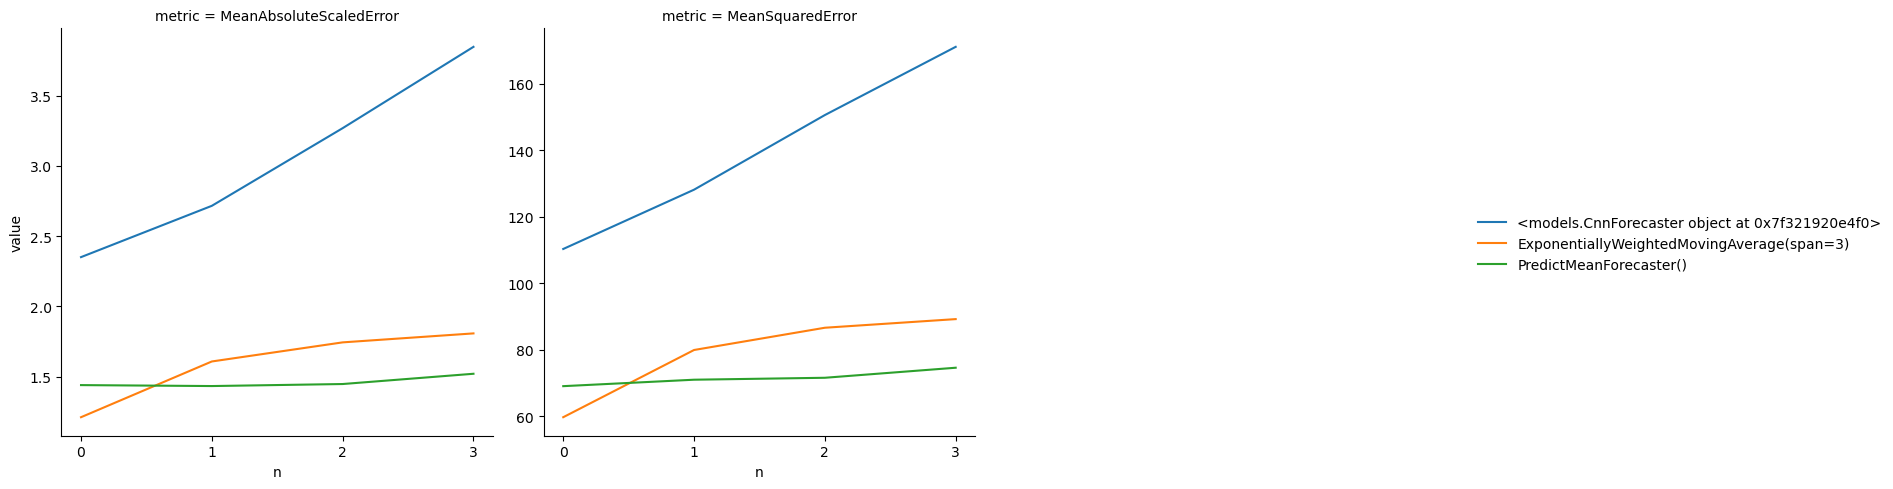

In [50]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<models.CnnForecaster object at 0x7f321920dee0>,2.692771,132.380248
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f321920dee0> 0                 2.522212   
                                                1                 2.354849   
                                                2                 2.553031   
                                                3                 3.340993   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f321920dee0> 0        119.249551  
                                                1        113.855722  
                                                2        122.735625  
                                                3        153.200160  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

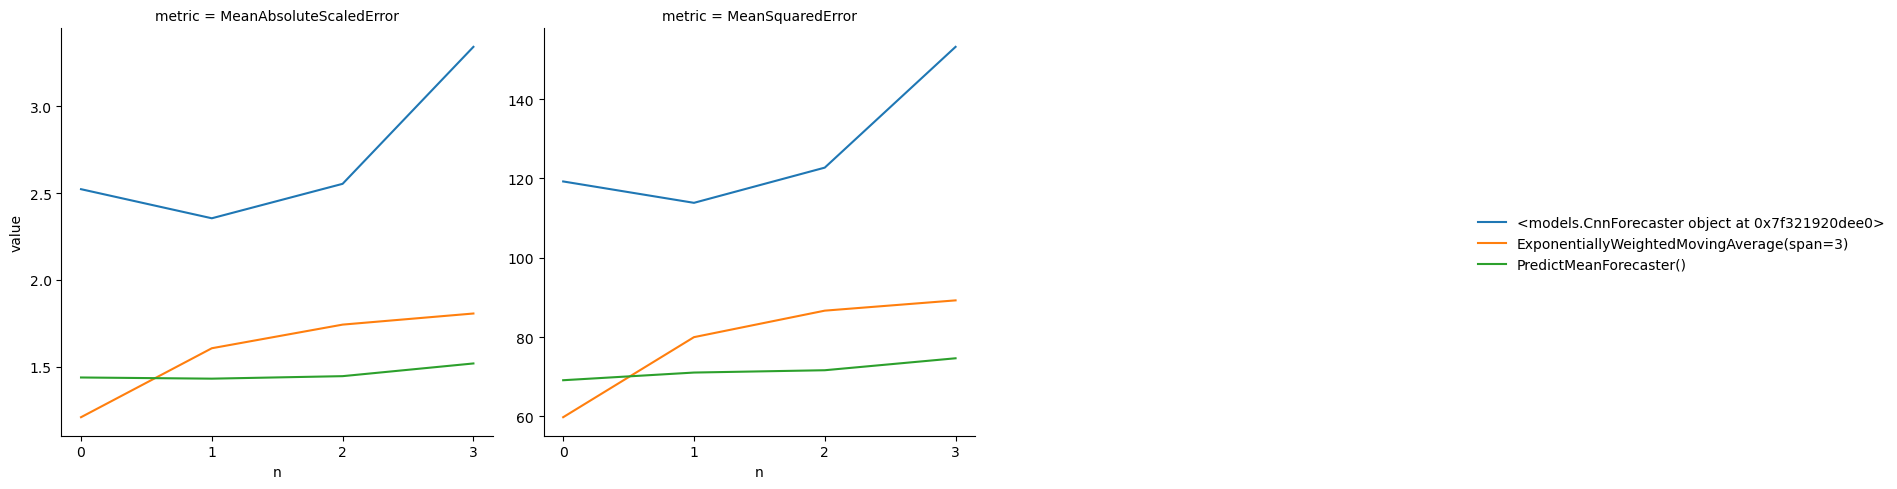

In [45]:
#epoch=40
#batch_size=20
#d_model=2048
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))